In [97]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567545 entries, 0 to 567544
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            567545 non-null  object 
 1   service_type        567545 non-null  object 
 2   driver_status       567545 non-null  object 
 3   date                567545 non-null  object 
 4   hour                567545 non-null  int64  
 5   seconds             567545 non-null  int64  
 6   latitude            567545 non-null  float64
 7   longitude           567545 non-null  float64
 8   altitude_in_meters  413142 non-null  float64
 9   accuracy_in_meters  567545 non-null  float64
 10  label               567545 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 47.6+ MB


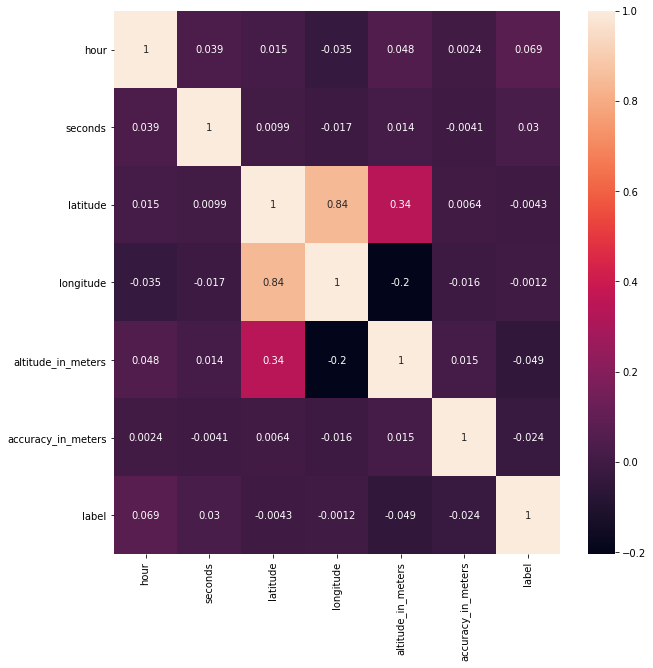

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

# Trying to fill the missing altitude with some algorithm

In [101]:
# not null altitude
df_train_nonull=df_train[~df_train['altitude_in_meters'].isna()]
df_train_nonull

order_id service_type driver_status        date  hour     seconds  \
1         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890680   
2         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890690   
3         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890700   
4         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890710   
5         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890720   
...         ...          ...           ...         ...   ...         ...   
567540    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803198   
567541    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803208   
567542    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803218   
567543    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803228   
567544    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803238   

        latitude   longitude  altitude_in_meters  accuracy_in_meters  label  
1      -6.923039  107.631250          712.000000               9.577      0  
2      -6.923039  107.631250          712.000000               9.577      0  
3      -6.923048  107.631230          713.000000               8.139      0  
4      -6.922968  107.631253          713.000000               7.029      0  
5      -6.922968  107.631253          713.000000               7.029      0  
...          ...         ...                 ...                 ...    ...  
567540 -6.889018  107.595516          798.799988              21.381      1  
567541 -6.889020  107.595516          798.799988              19.621      1  
567542 -6.889017  107.595526          798.799988              18.012      1  
567543 -6.889017  107.595526          798.799988              18.012      1  
567544 -6.889015  107.595528          798.799988              17.791      1  

[413142 rows x 11 columns]

In [102]:
fitur=df_train[~df_train['altitude_in_meters'].isna()][['latitude','longitude']]
hasil=df_train[~df_train['altitude_in_meters'].isna()]['altitude_in_meters']

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(fitur, hasil, test_size=0.3)

In [104]:
df_train[~(df_train['altitude_in_meters'].isna())]

order_id service_type driver_status        date  hour     seconds  \
1         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890680   
2         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890690   
3         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890700   
4         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890710   
5         RB193      GO_RIDE     AVAILABLE  2018-02-05     6  1548890720   
...         ...          ...           ...         ...   ...         ...   
567540    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803198   
567541    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803208   
567542    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803218   
567543    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803228   
567544    RB261      GO_RIDE   OTW_DROPOFF  2018-03-22    13  1552803238   

        latitude   longitude  altitude_in_meters  accuracy_in_meters  label  
1      -6.923039  107.631250          712.000000               9.577      0  
2      -6.923039  107.631250          712.000000               9.577      0  
3      -6.923048  107.631230          713.000000               8.139      0  
4      -6.922968  107.631253          713.000000               7.029      0  
5      -6.922968  107.631253          713.000000               7.029      0  
...          ...         ...                 ...                 ...    ...  
567540 -6.889018  107.595516          798.799988              21.381      1  
567541 -6.889020  107.595516          798.799988              19.621      1  
567542 -6.889017  107.595526          798.799988              18.012      1  
567543 -6.889017  107.595526          798.799988              18.012      1  
567544 -6.889015  107.595528          798.799988              17.791      1  

[413142 rows x 11 columns]

## Let's try Linear Regression (with PCA)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
scaled_boi=scaler.transform(x_train)

In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(scaled_boi)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [107]:
pca_train=pca.transform(scaled_boi)
pd.DataFrame(pca_train, columns=['train'])

train
0      -1.042486
1       0.245797
2       0.214330
3       2.306850
4      -1.300852
...          ...
289194  0.127148
289195  1.387102
289196 -1.711530
289197  1.152159
289198 -0.664513

[289199 rows x 1 columns]

In [108]:
from sklearn.linear_model import LinearRegression
linearkeun=LinearRegression()
linearkeun.fit(pca_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
pca_test=pca.transform(scaler.transform(x_test))
predict_linear=linearkeun.predict(pca_test)

In [110]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predict_linear))
print('MSE:', metrics.mean_squared_error(y_test, predict_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_linear)))

MAE: 38.880681567886135
MSE: 9569.88415654448
RMSE: 97.82578472235467


## Tryin' Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
hutan=DecisionTreeRegressor()
hutan.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [112]:
hutan_predict=hutan.predict(x_test)

In [113]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, hutan_predict))
print('MSE:', metrics.mean_squared_error(y_test, hutan_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, hutan_predict)))

MAE: 11.108742815679225
MSE: 2712.3754559050467
RMSE: 52.08047096470084


In [114]:
fill=DecisionTreeRegressor()
fill.fit(fitur, hasil)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [115]:
kosong=df_train[df_train['altitude_in_meters'].isna()].index
loading=1
for i in kosong:
    df_train.loc[i,'altitude_in_meters']=fill.predict(np.array(df_train.loc[i,['latitude','longitude']]).reshape(1,-1)).item()
    print('{}%'.format((loading/len(kosong))*100))
    loading+=1

0.0006476558097964418%
0.0012953116195928837%
0.0019429674293893254%
0.0025906232391857673%
0.0032382790489822086%
0.003885934858778651%
0.0045335906685750925%
0.005181246478371535%
0.005828902288167976%
0.006476558097964417%
0.0071242139077608594%
0.007771869717557302%
0.008419525527353743%
0.009067181337150185%
0.009714837146946627%
0.01036249295674307%
0.011010148766539512%
0.011657804576335952%
0.012305460386132394%
0.012953116195928835%
0.013600772005725278%
0.014248427815521719%
0.014896083625318163%
0.015543739435114603%
0.016191395244911044%
0.016839051054707486%
0.017486706864503928%
0.01813436267430037%
0.018782018484096812%
0.019429674293893254%
0.020077330103689693%
0.02072498591348614%
0.021372641723282577%
0.022020297533079023%
0.022667953342875462%
0.023315609152671904%
0.023963264962468346%
0.024610920772264788%
0.025258576582061227%
0.02590623239185767%
0.026553888201654115%
0.027201544011450557%
0.027849199821246996%
0.028496855631043438%
0.02914451144083988%
0.029792

0.26683419363613403%
0.26748184944593045%
0.26812950525572693%
0.2687771610655233%
0.2694248168753198%
0.27007247268511625%
0.27072012849491267%
0.2713677843047091%
0.2720154401145055%
0.272663095924302%
0.2733107517340984%
0.2739584075438949%
0.2746060633536913%
0.27525371916348773%
0.2759013749732842%
0.27654903078308063%
0.2771966865928771%
0.2778443424026735%
0.27849199821246995%
0.2791396540222664%
0.27978730983206285%
0.28043496564185927%
0.28108262145165575%
0.28173027726145217%
0.28237793307124864%
0.28302558888104506%
0.2836732446908415%
0.28432090050063796%
0.2849685563104344%
0.28561621212023086%
0.2862638679300272%
0.2869115237398237%
0.2875591795496201%
0.2882068353594166%
0.288854491169213%
0.28950214697900944%
0.2901498027888059%
0.29079745859860234%
0.2914451144083988%
0.29209277021819524%
0.29274042602799166%
0.29338808183778814%
0.29403573764758456%
0.29468339345738104%
0.29533104926717746%
0.2959787050769739%
0.29662636088677036%
0.2972740166965668%
0.297921672506363

0.5323730756526751%
0.5330207314624716%
0.5336683872722681%
0.5343160430820645%
0.5349636988918609%
0.5356113547016573%
0.5362590105114539%
0.5369066663212503%
0.5375543221310466%
0.5382019779408431%
0.5388496337506395%
0.5394972895604361%
0.5401449453702325%
0.5407926011800288%
0.5414402569898253%
0.5420879127996218%
0.5427355686094182%
0.5433832244192147%
0.544030880229011%
0.5446785360388076%
0.545326191848604%
0.5459738476584004%
0.5466215034681968%
0.5472691592779932%
0.5479168150877898%
0.5485644708975862%
0.5492121267073826%
0.549859782517179%
0.5505074383269755%
0.551155094136772%
0.5518027499465684%
0.5524504057563648%
0.5530980615661613%
0.5537457173759577%
0.5543933731857542%
0.5550410289955506%
0.555688684805347%
0.5563363406151435%
0.5569839964249399%
0.5576316522347363%
0.5582793080445329%
0.5589269638543293%
0.5595746196641257%
0.5602222754739221%
0.5608699312837185%
0.5615175870935151%
0.5621652429033115%
0.5628128987131079%
0.5634605545229043%
0.5641082103327008%
0.564

0.7998549250986056%
0.8005025809084021%
0.8011502367181985%
0.8017978925279948%
0.8024455483377914%
0.8030932041475878%
0.8037408599573843%
0.8043885157671806%
0.805036171576977%
0.8056838273867736%
0.80633148319657%
0.8069791390063665%
0.8076267948161628%
0.8082744506259593%
0.8089221064357558%
0.8095697622455522%
0.8102174180553487%
0.8108650738651451%
0.8115127296749415%
0.812160385484738%
0.8128080412945344%
0.813455697104331%
0.8141033529141273%
0.8147510087239237%
0.8153986645337202%
0.8160463203435167%
0.8166939761533132%
0.8173416319631095%
0.8179892877729059%
0.8186369435827024%
0.8192845993924989%
0.8199322552022954%
0.8205799110120917%
0.8212275668218881%
0.8218752226316847%
0.822522878441481%
0.8231705342512776%
0.8238181900610739%
0.8244658458708704%
0.8251135016806669%
0.8257611574904632%
0.8264088133002598%
0.8270564691100561%
0.8277041249198526%
0.8283517807296491%
0.8289994365394454%
0.8296470923492419%
0.8302947481590384%
0.8309424039688348%
0.8315900597786313%
0.8322

1.0815852023600576%
1.0822328581698542%
1.0828805139796507%
1.0835281697894472%
1.0841758255992435%
1.0848234814090398%
1.0854711372188364%
1.086118793028633%
1.0867664488384294%
1.0874141046482257%
1.088061760458022%
1.0887094162678186%
1.0893570720776151%
1.0900047278874114%
1.090652383697208%
1.0913000395070043%
1.0919476953168008%
1.0925953511265973%
1.0932430069363936%
1.0938906627461902%
1.0945383185559865%
1.095185974365783%
1.0958336301755796%
1.0964812859853759%
1.0971289417951724%
1.0977765976049687%
1.0984242534147652%
1.0990719092245618%
1.099719565034358%
1.1003672208441546%
1.101014876653951%
1.1016625324637475%
1.102310188273544%
1.1029578440833403%
1.1036054998931368%
1.1042531557029331%
1.1049008115127297%
1.1055484673225262%
1.1061961231323225%
1.106843778942119%
1.1074914347519154%
1.108139090561712%
1.1087867463715084%
1.1094344021813047%
1.1100820579911013%
1.1107297138008976%
1.111377369610694%
1.1120250254204906%
1.112672681230287%
1.1133203370400835%
1.113967992

1.3594295447627314%
1.3600772005725277%
1.3607248563823242%
1.3613725121921205%
1.362020168001917%
1.3626678238117136%
1.36331547962151%
1.3639631354313064%
1.3646107912411027%
1.3652584470508993%
1.3659061028606958%
1.3665537586704921%
1.3672014144802886%
1.367849070290085%
1.3684967260998815%
1.369144381909678%
1.3697920377194743%
1.3704396935292709%
1.3710873493390672%
1.3717350051488637%
1.3723826609586602%
1.3730303167684565%
1.373677972578253%
1.3743256283880494%
1.374973284197846%
1.3756209400076425%
1.3762685958174388%
1.3769162516272353%
1.3775639074370316%
1.3782115632468281%
1.3788592190566247%
1.379506874866421%
1.3801545306762175%
1.3808021864860138%
1.3814498422958104%
1.3820974981056067%
1.3827451539154032%
1.3833928097251997%
1.384040465534996%
1.3846881213447924%
1.3853357771545889%
1.3859834329643854%
1.386631088774182%
1.3872787445839783%
1.3879264003937746%
1.388574056203571%
1.3892217120133676%
1.3898693678231642%
1.3905170236329605%
1.3911646794427568%
1.391812335

1.6398645104045908%
1.640512166214387%
1.6411598220241834%
1.64180747783398%
1.6424551336437763%
1.6431027894535728%
1.6437504452633693%
1.6443981010731659%
1.645045756882962%
1.6456934126927587%
1.6463410685025552%
1.6469887243123513%
1.6476363801221479%
1.6482840359319444%
1.6489316917417407%
1.6495793475515372%
1.6502270033613338%
1.6508746591711299%
1.6515223149809264%
1.652169970790723%
1.6528176266005197%
1.6534652824103158%
1.6541129382201123%
1.6547605940299088%
1.6554082498397051%
1.6560559056495017%
1.6567035614592982%
1.6573512172690943%
1.6579988730788908%
1.6586465288886874%
1.6592941846984839%
1.6599418405082802%
1.6605894963180767%
1.6612371521278733%
1.6618848079376696%
1.662532463747466%
1.6631801195572626%
1.6638277753670587%
1.6644754311768553%
1.6651230869866518%
1.6657707427964483%
1.6664183986062446%
1.6670660544160412%
1.6677137102258377%
1.6683613660356338%
1.6690090218454305%
1.669656677655227%
1.6703043334650232%
1.6709519892748197%
1.6715996450846162%
1.67224

1.9202994760464498%
1.9209471318562463%
1.9215947876660429%
1.9222424434758392%
1.9228900992856357%
1.9235377550954322%
1.9241854109052283%
1.9248330667150249%
1.9254807225248214%
1.926128378334618%
1.9267760341444142%
1.9274236899542108%
1.9280713457640073%
1.9287190015738036%
1.9293666573836001%
1.9300143131933967%
1.9306619690031928%
1.9313096248129893%
1.9319572806227858%
1.9326049364325824%
1.9332525922423787%
1.9339002480521752%
1.9345479038619717%
1.9351955596717678%
1.9358432154815646%
1.936490871291361%
1.9371385271011572%
1.9377861829109537%
1.9384338387207503%
1.9390814945305468%
1.939729150340343%
1.9403768061501396%
1.9410244619599362%
1.9416721177697323%
1.9423197735795288%
1.9429674293893255%
1.9436150851991216%
1.9442627410089182%
1.9449103968187147%
1.945558052628511%
1.9462057084383075%
1.946853364248104%
1.9475010200579006%
1.9481486758676967%
1.9487963316774932%
1.9494439874872898%
1.950091643297086%
1.9507392991068826%
1.9513869549166791%
1.9520346107264754%
1.9526

2.204620376547088%
2.2052680323568845%
2.2059156881666806%
2.206563343976477%
2.2072109997862737%
2.20785865559607%
2.2085063114058663%
2.209153967215663%
2.2098016230254593%
2.210449278835256%
2.2110969346450524%
2.211744590454849%
2.212392246264645%
2.2130399020744416%
2.213687557884238%
2.2143352136940346%
2.2149828695038307%
2.2156305253136273%
2.216278181123424%
2.2169258369332203%
2.217573492743017%
2.2182211485528134%
2.2188688043626095%
2.219516460172406%
2.2201641159822025%
2.220811771791999%
2.221459427601795%
2.2221070834115917%
2.222754739221388%
2.2234023950311843%
2.2240500508409813%
2.224697706650778%
2.225345362460574%
2.2259930182703704%
2.226640674080167%
2.2272883298899635%
2.2279359856997596%
2.228583641509556%
2.2292312973193527%
2.2298789531291487%
2.2305266089389453%
2.2311742647487423%
2.2318219205585383%
2.232469576368335%
2.2331172321781314%
2.233764887987928%
2.234412543797724%
2.2350601996075206%
2.235707855417317%
2.236355511227113%
2.2370031670369097%
2.23

2.491531900286912%
2.492179556096708%
2.4928272119065045%
2.493474867716301%
2.494122523526097%
2.4947701793358936%
2.49541783514569%
2.4960654909554867%
2.4967131467652828%
2.4973608025750793%
2.4980084583848763%
2.4986561141946724%
2.499303770004469%
2.4999514258142654%
2.5005990816240615%
2.501246737433858%
2.5018943932436546%
2.502542049053451%
2.503189704863247%
2.5038373606730437%
2.5044850164828403%
2.505132672292637%
2.5057803281024333%
2.50642798391223%
2.507075639722026%
2.5077232955318225%
2.508370951341619%
2.5090186071514156%
2.5096662629612116%
2.510313918771008%
2.5109615745808047%
2.5116092303906012%
2.5122568862003978%
2.5129045420101943%
2.5135521978199904%
2.514199853629787%
2.5148475094395835%
2.51549516524938%
2.516142821059176%
2.5167904768689726%
2.517438132678769%
2.5180857884885657%
2.518733444298362%
2.5193811001081587%
2.520028755917955%
2.5206764117277514%
2.521324067537548%
2.5219717233473444%
2.5226193791571405%
2.523267034966937%
2.5239146907767336%
2.524

2.775852800787549%
2.7765004565973457%
2.777148112407142%
2.7777957682169387%
2.7784434240267353%
2.779091079836532%
2.7797387356463283%
2.7803863914561244%
2.781034047265921%
2.7816817030757175%
2.7823293588855136%
2.78297701469531%
2.7836246705051066%
2.784272326314903%
2.7849199821246997%
2.7855676379344962%
2.7862152937442928%
2.786862949554089%
2.7875106053638854%
2.788158261173682%
2.788805916983478%
2.7894535727932745%
2.790101228603071%
2.7907488844128676%
2.791396540222664%
2.7920441960324607%
2.792691851842257%
2.7933395076520533%
2.79398716346185%
2.7946348192716464%
2.7952824750814425%
2.795930130891239%
2.7965777867010355%
2.797225442510832%
2.7978730983206286%
2.798520754130425%
2.7991684099402216%
2.7998160657500177%
2.8004637215598143%
2.801111377369611%
2.801759033179407%
2.8024066889892034%
2.803054344799%
2.8037020006087965%
2.804349656418593%
2.8049973122283895%
2.805644968038186%
2.806292623847982%
2.8069402796577787%
2.8075879354675752%
2.8082355912773713%
2.80888

3.0621166687175765%
3.062764324527373%
3.0634119803371695%
3.064059636146966%
3.0647072919567626%
3.065354947766559%
3.0660026035763557%
3.0666502593861518%
3.0672979151959483%
3.067945571005745%
3.068593226815541%
3.0692408826253375%
3.069888538435134%
3.0705361942449305%
3.071183850054727%
3.0718315058645236%
3.07247916167432%
3.073126817484116%
3.0737744732939127%
3.0744221291037093%
3.0750697849135054%
3.075717440723302%
3.0763650965330984%
3.0770127523428945%
3.0776604081526915%
3.078308063962488%
3.0789557197722845%
3.0796033755820806%
3.080251031391877%
3.0808986872016737%
3.08154634301147%
3.0821939988212663%
3.082841654631063%
3.083489310440859%
3.0841369662506555%
3.0847846220604525%
3.085432277870249%
3.086079933680045%
3.0867275894898416%
3.087375245299638%
3.0880229011094342%
3.0886705569192308%
3.0893182127290273%
3.0899658685388234%
3.09061352434862%
3.0912611801584164%
3.0919088359682134%
3.0925564917780095%
3.093204147587806%
3.0938518033976026%
3.0944994592073987%
3.0

3.3477328808378073%
3.3483805366476043%
3.3490281924574004%
3.3496758482671964%
3.3503235040769934%
3.3509711598867895%
3.351618815696586%
3.352266471506383%
3.352914127316179%
3.353561783125975%
3.354209438935772%
3.3548570947455683%
3.3555047505553643%
3.3561524063651613%
3.3568000621749574%
3.3574477179847544%
3.3580953737945505%
3.358743029604347%
3.359390685414144%
3.36003834122394%
3.360685997033736%
3.361333652843533%
3.3619813086533292%
3.3626289644631253%
3.3632766202729223%
3.3639242760827184%
3.364571931892515%
3.3652195877023114%
3.365867243512108%
3.366514899321904%
3.367162555131701%
3.367810210941497%
3.368457866751293%
3.36910552256109%
3.3697531783708863%
3.3704008341806833%
3.3710484899904793%
3.371696145800276%
3.3723438016100724%
3.372991457419869%
3.373639113229665%
3.374286769039462%
3.374934424849258%
3.375582080659054%
3.376229736468851%
3.3768773922786472%
3.377525048088444%
3.3781727038982403%
3.378820359708037%
3.379468015517833%
3.38011567132763%
3.380763327

3.631406125528649%
3.6320537813384455%
3.632701437148242%
3.633349092958038%
3.633996748767835%
3.634644404577631%
3.6352920603874272%
3.6359397161972242%
3.6365873720070203%
3.6372350278168173%
3.6378826836266134%
3.63853033943641%
3.6391779952462064%
3.639825651056003%
3.640473306865799%
3.641120962675596%
3.641768618485392%
3.642416274295188%
3.643063930104985%
3.6437115859147813%
3.644359241724578%
3.6450068975343743%
3.645654553344171%
3.646302209153967%
3.646949864963764%
3.64759752077356%
3.648245176583356%
3.648892832393153%
3.649540488202949%
3.6501881440127457%
3.6508357998225422%
3.651483455632339%
3.6521311114421353%
3.652778767251932%
3.653426423061728%
3.654074078871525%
3.654721734681321%
3.655369390491117%
3.656017046300914%
3.65666470211071%
3.6573123579205067%
3.657960013730303%
3.6586076695400997%
3.659255325349896%
3.659902981159693%
3.660550636969489%
3.661198292779285%
3.661845948589082%
3.662493604398878%
3.6631412602086746%
3.663788916018471%
3.6644365718282677%

3.914431714409694%
3.91507937021949%
3.915727026029287%
3.916374681839083%
3.9170223376488797%
3.9176699934586763%
3.918317649268473%
3.9189653050782693%
3.919612960888066%
3.920260616697862%
3.920908272507659%
3.921555928317455%
3.922203584127251%
3.922851239937048%
3.923498895746844%
3.9241465515566407%
3.9247942073664372%
3.925441863176234%
3.92608951898603%
3.926737174795827%
3.927384830605623%
3.928032486415419%
3.928680142225216%
3.929327798035012%
3.9299754538448086%
3.930623109654605%
3.9312707654644017%
3.931918421274198%
3.9325660770839947%
3.933213732893791%
3.933861388703588%
3.934509044513384%
3.93515670032318%
3.935804356132977%
3.936452011942773%
3.9370996677525696%
3.937747323562366%
3.9383949793721627%
3.9390426351819587%
3.9396902909917557%
3.940337946801552%
3.940985602611348%
3.941633258421145%
3.942280914230941%
3.942928570040737%
3.943576225850534%
3.9442238816603306%
3.9448715374701266%
3.9455191932799236%
3.9461668490897197%
3.9468145048995167%
3.947462160709312

4.2026385497691106%
4.203286205578907%
4.203933861388704%
4.2045815171985%
4.205229173008297%
4.205876828818092%
4.20652448462789%
4.207172140437685%
4.207819796247482%
4.2084674520572785%
4.209115107867075%
4.2097627636768715%
4.210410419486668%
4.211058075296465%
4.21170573110626%
4.212353386916058%
4.213001042725853%
4.213648698535651%
4.214296354345446%
4.214944010155243%
4.215591665965039%
4.216239321774836%
4.2168869775846325%
4.217534633394429%
4.2181822892042256%
4.218829945014021%
4.219477600823819%
4.220125256633614%
4.220772912443411%
4.221420568253207%
4.222068224063004%
4.2227158798728%
4.223363535682597%
4.2240111914923935%
4.224658847302189%
4.2253065031119865%
4.225954158921782%
4.22660181473158%
4.227249470541375%
4.227897126351172%
4.228544782160968%
4.229192437970765%
4.229840093780561%
4.230487749590358%
4.231135405400154%
4.23178306120995%
4.2324307170197475%
4.233078372829543%
4.23372602863934%
4.234373684449136%
4.235021340258933%
4.235668996068729%
4.23631665187

4.495378975797102%
4.496026631606899%
4.496674287416695%
4.497321943226492%
4.4979695990362885%
4.498617254846084%
4.4992649106558815%
4.499912566465677%
4.500560222275474%
4.50120787808527%
4.501855533895067%
4.502503189704863%
4.50315084551466%
4.503798501324456%
4.504446157134252%
4.505093812944049%
4.505741468753845%
4.506389124563642%
4.507036780373438%
4.507684436183235%
4.508332091993031%
4.508979747802828%
4.509627403612624%
4.510275059422421%
4.510922715232217%
4.511570371042013%
4.51221802685181%
4.512865682661606%
4.513513338471403%
4.514160994281199%
4.514808650090996%
4.515456305900792%
4.516103961710589%
4.516751617520385%
4.517399273330181%
4.518046929139978%
4.518694584949774%
4.5193422407595705%
4.519989896569367%
4.5206375523791635%
4.52128520818896%
4.521932863998757%
4.522580519808553%
4.52322817561835%
4.523875831428146%
4.524523487237942%
4.525171143047739%
4.525818798857535%
4.526466454667331%
4.527114110477128%
4.5277617662869245%
4.528409422096721%
4.5290570779

4.787471746015298%
4.788119401825094%
4.788767057634891%
4.789414713444687%
4.790062369254484%
4.79071002506428%
4.791357680874076%
4.792005336683873%
4.792652992493669%
4.7933006483034655%
4.793948304113262%
4.7945959599230585%
4.795243615732855%
4.795891271542652%
4.796538927352448%
4.797186583162244%
4.797834238972041%
4.798481894781837%
4.799129550591633%
4.79977720640143%
4.800424862211226%
4.801072518021023%
4.8017201738308195%
4.802367829640616%
4.803015485450413%
4.803663141260209%
4.804310797070005%
4.804958452879802%
4.805606108689598%
4.806253764499394%
4.806901420309191%
4.807549076118987%
4.808196731928784%
4.8088443877385805%
4.809492043548377%
4.810139699358173%
4.81078735516797%
4.811435010977766%
4.812082666787562%
4.812730322597359%
4.813377978407155%
4.814025634216952%
4.814673290026748%
4.815320945836545%
4.815968601646341%
4.816616257456138%
4.817263913265934%
4.817911569075731%
4.818559224885527%
4.819206880695323%
4.81985453650512%
4.820502192314916%
4.8211498481

5.076973892994307%
5.077621548804104%
5.0782692046139%
5.078916860423696%
5.079564516233493%
5.080212172043289%
5.080859827853086%
5.081507483662882%
5.082155139472679%
5.082802795282475%
5.083450451092272%
5.084098106902068%
5.084745762711865%
5.085393418521661%
5.086041074331457%
5.086688730141254%
5.08733638595105%
5.087984041760847%
5.088631697570643%
5.08927935338044%
5.0899270091902356%
5.090574665000033%
5.091222320809829%
5.091869976619625%
5.092517632429422%
5.093165288239218%
5.093812944049015%
5.094460599858811%
5.095108255668608%
5.0957559114784035%
5.096403567288201%
5.0970512230979965%
5.097698878907794%
5.09834653471759%
5.098994190527386%
5.099641846337183%
5.100289502146979%
5.100937157956775%
5.101584813766572%
5.102232469576369%
5.102880125386164%
5.103527781195962%
5.1041754370057575%
5.104823092815554%
5.1054707486253506%
5.106118404435147%
5.106766060244943%
5.10741371605474%
5.108061371864537%
5.108709027674332%
5.10935668348413%
5.110004339293925%
5.110651995103

5.360647137685149%
5.361294793494945%
5.361942449304742%
5.3625901051145375%
5.363237760924335%
5.3638854167341306%
5.364533072543927%
5.365180728353724%
5.36582838416352%
5.366476039973317%
5.367123695783113%
5.367771351592909%
5.368419007402706%
5.369066663212503%
5.3697143190222985%
5.370361974832096%
5.3710096306418915%
5.371657286451688%
5.372304942261485%
5.372952598071281%
5.373600253881077%
5.374247909690874%
5.374895565500671%
5.375543221310466%
5.376190877120264%
5.376838532930059%
5.377486188739856%
5.3781338445496525%
5.378781500359449%
5.3794291561692456%
5.380076811979042%
5.380724467788838%
5.381372123598635%
5.382019779408431%
5.382667435218227%
5.383315091028025%
5.38396274683782%
5.384610402647617%
5.3852580584574135%
5.38590571426721%
5.386553370077006%
5.387201025886803%
5.387848681696599%
5.388496337506395%
5.389143993316193%
5.389791649125988%
5.390439304935785%
5.391086960745581%
5.391734616555378%
5.392382272365174%
5.393029928174971%
5.393677583984767%
5.394325

5.643025070756398%
5.6436727265661935%
5.64432038237599%
5.6449680381857865%
5.645615693995583%
5.646263349805379%
5.646911005615176%
5.647558661424972%
5.648206317234769%
5.648853973044565%
5.649501628854361%
5.650149284664159%
5.650796940473954%
5.651444596283751%
5.6520922520935475%
5.652739907903344%
5.65338756371314%
5.654035219522937%
5.654682875332733%
5.655330531142529%
5.655978186952327%
5.656625842762122%
5.657273498571919%
5.657921154381715%
5.658568810191512%
5.659216466001308%
5.659864121811105%
5.660511777620901%
5.661159433430698%
5.661807089240494%
5.66245474505029%
5.663102400860087%
5.663750056669883%
5.66439771247968%
5.665045368289476%
5.665693024099273%
5.6663406799090685%
5.666988335718866%
5.667635991528662%
5.668283647338458%
5.668931303148255%
5.669578958958051%
5.670226614767848%
5.670874270577644%
5.671521926387441%
5.672169582197236%
5.672817238007034%
5.6734648938168295%
5.674112549626627%
5.674760205436423%
5.675407861246219%
5.676055517056016%
5.676703172

5.925403003827646%
5.926050659637442%
5.926698315447239%
5.927345971257035%
5.927993627066832%
5.928641282876628%
5.929288938686424%
5.929936594496221%
5.930584250306017%
5.931231906115814%
5.93187956192561%
5.932527217735407%
5.933174873545203%
5.933822529355%
5.934470185164796%
5.935117840974592%
5.935765496784389%
5.936413152594185%
5.937060808403982%
5.937708464213778%
5.938356120023575%
5.9390037758333705%
5.939651431643168%
5.9402990874529635%
5.94094674326276%
5.941594399072557%
5.942242054882353%
5.94288971069215%
5.943537366501946%
5.944185022311743%
5.944832678121539%
5.945480333931336%
5.946127989741131%
5.946775645550929%
5.9474233013607245%
5.948070957170521%
5.948718612980318%
5.949366268790114%
5.950013924599911%
5.950661580409707%
5.951309236219504%
5.951956892029299%
5.952604547839097%
5.953252203648892%
5.953899859458689%
5.9545475152684855%
5.955195171078282%
5.9558428268880785%
5.956490482697875%
5.957138138507672%
5.957785794317468%
5.958433450127265%
5.95908110593

6.220734053094823%
6.2213817089046195%
6.222029364714416%
6.222677020524213%
6.223324676334009%
6.223972332143806%
6.224619987953602%
6.225267643763399%
6.225915299573194%
6.226562955382992%
6.227210611192787%
6.227858267002584%
6.2285059228123805%
6.229153578622177%
6.2298012344319735%
6.23044889024177%
6.231096546051567%
6.231744201861362%
6.23239185767116%
6.233039513480955%
6.233687169290752%
6.234334825100548%
6.234982480910345%
6.235630136720141%
6.236277792529938%
6.2369254483397345%
6.237573104149531%
6.238220759959328%
6.238868415769123%
6.239516071578921%
6.240163727388716%
6.240811383198513%
6.241459039008309%
6.242106694818106%
6.242754350627902%
6.243402006437699%
6.2440496622474955%
6.244697318057291%
6.2453449738670885%
6.245992629676884%
6.246640285486681%
6.247287941296477%
6.247935597106274%
6.24858325291607%
6.249230908725867%
6.249878564535663%
6.250526220345459%
6.2511738761552555%
6.251821531965053%
6.2524691877748495%
6.253116843584645%
6.253764499394442%
6.25441

6.512826823313018%
6.513474479122815%
6.514122134932611%
6.514769790742409%
6.515417446552204%
6.516065102362001%
6.516712758171797%
6.517360413981593%
6.51800806979139%
6.518655725601187%
6.5193033814109835%
6.519951037220779%
6.520598693030576%
6.521246348840372%
6.521894004650168%
6.522541660459965%
6.523189316269762%
6.523836972079558%
6.524484627889354%
6.5251322836991505%
6.525779939508948%
6.5264275953187445%
6.52707525112854%
6.527722906938337%
6.528370562748133%
6.529018218557929%
6.529665874367726%
6.530313530177523%
6.530961185987319%
6.531608841797115%
6.5322564976069115%
6.532904153416707%
6.5335518092265055%
6.534199465036301%
6.534847120846098%
6.535494776655894%
6.53614243246569%
6.536790088275486%
6.537437744085284%
6.53808539989508%
6.538733055704876%
6.5393807115146725%
6.540028367324469%
6.540676023134266%
6.541323678944062%
6.541971334753859%
6.542618990563655%
6.543266646373451%
6.543914302183247%
6.544561957993045%
6.545209613802841%
6.545857269612637%
6.54650492

6.802328970292028%
6.802976626101824%
6.80362428191162%
6.804271937721418%
6.804919593531214%
6.80556724934101%
6.8062149051508065%
6.806862560960603%
6.8075102167704005%
6.808157872580196%
6.808805528389993%
6.809453184199789%
6.810100840009585%
6.810748495819381%
6.811396151629179%
6.812043807438975%
6.812691463248771%
6.8133391190585675%
6.813986774868363%
6.81463443067816%
6.815282086487957%
6.815929742297754%
6.81657739810755%
6.817225053917346%
6.817872709727142%
6.81852036553694%
6.819168021346736%
6.819815677156532%
6.8204633329663285%
6.821110988776125%
6.821758644585921%
6.822406300395718%
6.823053956205515%
6.823701612015311%
6.824349267825107%
6.824996923634903%
6.825644579444699%
6.826292235254497%
6.826939891064293%
6.827587546874089%
6.828235202683885%
6.828882858493682%
6.829530514303478%
6.8301781701132755%
6.830825825923072%
6.831473481732868%
6.832121137542664%
6.83276879335246%
6.833416449162258%
6.834064104972054%
6.83471176078185%
6.835359416591647%
6.836007072401

7.085354559173072%
7.08600221498287%
7.086649870792666%
7.0872975266024625%
7.087945182412259%
7.088592838222055%
7.089240494031852%
7.089888149841649%
7.090535805651445%
7.091183461461241%
7.091831117271037%
7.092478773080833%
7.093126428890631%
7.093774084700427%
7.0944217405102235%
7.095069396320019%
7.095717052129816%
7.096364707939612%
7.09701236374941%
7.097660019559206%
7.098307675369002%
7.098955331178798%
7.099602986988594%
7.100250642798392%
7.100898298608188%
7.101545954417984%
7.102193610227781%
7.102841266037577%
7.103488921847373%
7.1041365776571705%
7.104784233466967%
7.105431889276763%
7.106079545086559%
7.106727200896355%
7.107374856706151%
7.108022512515949%
7.108670168325745%
7.109317824135541%
7.109965479945338%
7.110613135755134%
7.11126079156493%
7.111908447374728%
7.112556103184524%
7.11320375899432%
7.113851414804116%
7.114499070613912%
7.11514672642371%
7.115794382233506%
7.116442038043303%
7.1170896938530985%
7.117737349662895%
7.118385005472691%
7.11903266128

7.365789524814932%
7.366437180624728%
7.3670848364345245%
7.367732492244322%
7.3683801480541185%
7.369027803863915%
7.369675459673711%
7.370323115483507%
7.370970771293305%
7.371618427103101%
7.372266082912897%
7.372913738722693%
7.373561394532489%
7.3742090503422855%
7.374856706152083%
7.375504361961879%
7.376152017771675%
7.376799673581472%
7.377447329391268%
7.378094985201064%
7.378742641010862%
7.379390296820658%
7.380037952630454%
7.38068560844025%
7.381333264250046%
7.381980920059844%
7.38262857586964%
7.383276231679437%
7.383923887489233%
7.384571543299029%
7.385219199108825%
7.385866854918623%
7.386514510728419%
7.387162166538215%
7.387809822348011%
7.388457478157807%
7.389105133967604%
7.389752789777401%
7.390400445587197%
7.3910481013969935%
7.39169575720679%
7.392343413016586%
7.392991068826382%
7.39363872463618%
7.394286380445976%
7.394934036255772%
7.395581692065568%
7.396229347875365%
7.396877003685162%
7.397524659494959%
7.3981723153047545%
7.398819971114551%
7.399467626

7.650758081125367%
7.651405736935163%
7.652053392744959%
7.652701048554757%
7.653348704364553%
7.653996360174349%
7.654644015984145%
7.655291671793941%
7.655939327603738%
7.656586983413535%
7.657234639223331%
7.657882295033128%
7.658529950842924%
7.65917760665272%
7.659825262462516%
7.660472918272314%
7.66112057408211%
7.661768229891906%
7.662415885701702%
7.663063541511499%
7.663711197321296%
7.664358853131093%
7.6650065089408885%
7.665654164750685%
7.666301820560481%
7.666949476370277%
7.667597132180075%
7.668244787989871%
7.668892443799667%
7.669540099609463%
7.67018775541926%
7.6708354112290555%
7.671483067038853%
7.6721307228486495%
7.672778378658446%
7.673426034468242%
7.674073690278038%
7.674721346087835%
7.675369001897632%
7.676016657707428%
7.676664313517224%
7.677311969327021%
7.6779596251368165%
7.678607280946615%
7.6792549367564105%
7.679902592566207%
7.680550248376003%
7.681197904185799%
7.681845559995596%
7.682493215805393%
7.683140871615189%
7.683788527424985%
7.68443618

7.931193046767227%
7.931840702577023%
7.932488358386819%
7.933136014196615%
7.933783670006411%
7.934431325816209%
7.935078981626005%
7.935726637435801%
7.936374293245597%
7.937021949055394%
7.93766960486519%
7.938317260674987%
7.9389649164847835%
7.93961257229458%
7.940260228104376%
7.940907883914172%
7.941555539723969%
7.942203195533766%
7.942850851343562%
7.943498507153358%
7.944146162963155%
7.9447938187729505%
7.945441474582749%
7.9460891303925445%
7.946736786202341%
7.947384442012137%
7.948032097821933%
7.94867975363173%
7.949327409441527%
7.949975065251323%
7.950622721061119%
7.951270376870916%
7.9519180326807115%
7.952565688490508%
7.9532133443003055%
7.953861000110102%
7.954508655919898%
7.955156311729694%
7.955803967539491%
7.956451623349286%
7.957099279159084%
7.95774693496888%
7.958394590778677%
7.9590422465884725%
7.959689902398269%
7.960337558208066%
7.960985214017863%
7.961632869827659%
7.962280525637455%
7.962928181447252%
7.963575837257047%
7.964223493066845%
7.96487114

8.212275668218883%
8.21292332402868%
8.213570979838474%
8.21421863564827%
8.214866291458067%
8.215513947267864%
8.21616160307766%
8.216809258887457%
8.217456914697253%
8.21810457050705%
8.218752226316846%
8.219399882126641%
8.22004753793644%
8.220695193746236%
8.221342849556033%
8.221990505365827%
8.222638161175624%
8.22328581698542%
8.223933472795219%
8.224581128605015%
8.22522878441481%
8.225876440224607%
8.226524096034403%
8.227171751844201%
8.227819407653996%
8.228467063463793%
8.22911471927359%
8.229762375083386%
8.230410030893182%
8.231057686702979%
8.231705342512775%
8.232352998322572%
8.233000654132368%
8.233648309942163%
8.23429596575196%
8.234943621561758%
8.235591277371554%
8.236238933181351%
8.236886588991146%
8.237534244800942%
8.238181900610739%
8.238829556420537%
8.239477212230332%
8.240124868040128%
8.240772523849925%
8.241420179659722%
8.242067835469518%
8.242715491279315%
8.243363147089111%
8.244010802898908%
8.244658458708704%
8.245306114518499%
8.245953770328297%
8.

8.502425471007689%
8.503073126817483%
8.50372078262728%
8.504368438437076%
8.505016094246873%
8.505663750056671%
8.506311405866466%
8.506959061676262%
8.507606717486059%
8.508254373295856%
8.508902029105652%
8.509549684915449%
8.510197340725245%
8.510844996535042%
8.511492652344838%
8.512140308154633%
8.512787963964431%
8.513435619774228%
8.514083275584024%
8.514730931393819%
8.515378587203616%
8.516026243013412%
8.51667389882321%
8.517321554633007%
8.517969210442802%
8.518616866252598%
8.519264522062395%
8.519912177872193%
8.520559833681988%
8.521207489491784%
8.521855145301581%
8.522502801111377%
8.523150456921174%
8.52379811273097%
8.524445768540767%
8.525093424350564%
8.52574108016036%
8.526388735970155%
8.527036391779951%
8.52768404758975%
8.528331703399546%
8.528979359209341%
8.529627015019138%
8.530274670828934%
8.53092232663873%
8.531569982448527%
8.532217638258324%
8.53286529406812%
8.533512949877917%
8.534160605687713%
8.53480826149751%
8.535455917307306%
8.536103573117103%
8

9.069771960389371%
9.070419616199167%
9.071067272008964%
9.071714927818759%
9.072362583628557%
9.073010239438354%
9.07365789524815%
9.074305551057945%
9.074953206867741%
9.075600862677538%
9.076248518487336%
9.076896174297131%
9.077543830106928%
9.078191485916724%
9.07883914172652%
9.079486797536317%
9.080134453346114%
9.08078210915591%
9.081429764965707%
9.082077420775503%
9.0827250765853%
9.083372732395096%
9.084020388204893%
9.08466804401469%
9.085315699824486%
9.08596335563428%
9.086611011444077%
9.087258667253876%
9.087906323063672%
9.088553978873467%
9.089201634683263%
9.08984929049306%
9.090496946302856%
9.091144602112653%
9.09179225792245%
9.092439913732246%
9.093087569542043%
9.093735225351839%
9.094382881161636%
9.095030536971432%
9.095678192781229%
9.096325848591025%
9.096973504400822%
9.097621160210617%
9.098268816020415%
9.098916471830211%
9.099564127640008%
9.100211783449803%
9.1008594392596%
9.101507095069396%
9.102154750879194%
9.102802406688989%
9.103450062498785%
9.10

9.35927410736838%
9.359921763178177%
9.360569418987973%
9.36121707479777%
9.361864730607566%
9.362512386417363%
9.36316004222716%
9.363807698036956%
9.36445535384675%
9.365103009656549%
9.365750665466345%
9.366398321276142%
9.367045977085937%
9.367693632895733%
9.36834128870553%
9.368988944515328%
9.369636600325123%
9.37028425613492%
9.370931911944716%
9.371579567754512%
9.372227223564309%
9.372874879374105%
9.373522535183902%
9.374170190993699%
9.374817846803495%
9.375465502613292%
9.376113158423086%
9.376760814232885%
9.377408470042681%
9.378056125852478%
9.378703781662272%
9.379351437472069%
9.379999093281867%
9.380646749091664%
9.381294404901459%
9.381942060711255%
9.382589716521052%
9.383237372330848%
9.383885028140645%
9.384532683950441%
9.385180339760238%
9.385827995570034%
9.38647565137983%
9.387123307189626%
9.387770962999424%
9.38841861880922%
9.389066274619017%
9.389713930428814%
9.390361586238608%
9.391009242048407%
9.391656897858203%
9.392304553668%
9.392952209477794%
9.39

9.657843435684539%
9.658491091494337%
9.659138747304134%
9.659786403113928%
9.660434058923725%
9.661081714733522%
9.66172937054332%
9.662377026353115%
9.663024682162911%
9.663672337972708%
9.664319993782504%
9.6649676495923%
9.665615305402097%
9.666262961211894%
9.66691061702169%
9.667558272831487%
9.668205928641282%
9.668853584451078%
9.669501240260876%
9.670148896070673%
9.67079655188047%
9.671444207690264%
9.67209186350006%
9.672739519309859%
9.673387175119656%
9.67403483092945%
9.674682486739247%
9.675330142549043%
9.67597779835884%
9.676625454168637%
9.677273109978433%
9.67792076578823%
9.678568421598026%
9.679216077407823%
9.679863733217617%
9.680511389027416%
9.681159044837212%
9.681806700647009%
9.682454356456805%
9.6831020122666%
9.683749668076397%
9.684397323886195%
9.685044979695991%
9.685692635505786%
9.686340291315583%
9.68698794712538%
9.687635602935178%
9.688283258744972%
9.688930914554769%
9.689578570364565%
9.690226226174362%
9.690873881984158%
9.691521537793955%
9.692

9.949288550092938%
9.949936205902734%
9.95058386171253%
9.951231517522329%
9.951879173332125%
9.95252682914192%
9.953174484951717%
9.953822140761513%
9.954469796571312%
9.955117452381106%
9.955765108190903%
9.9564127640007%
9.957060419810496%
9.957708075620292%
9.958355731430089%
9.959003387239886%
9.959651043049682%
9.960298698859479%
9.960946354669273%
9.96159401047907%
9.962241666288868%
9.962889322098665%
9.963536977908461%
9.964184633718256%
9.964832289528053%
9.965479945337849%
9.966127601147647%
9.966775256957442%
9.967422912767239%
9.968070568577035%
9.968718224386832%
9.969365880196628%
9.970013536006425%
9.970661191816221%
9.971308847626018%
9.971956503435814%
9.97260415924561%
9.973251815055407%
9.973899470865204%
9.974547126675%
9.975194782484795%
9.975842438294592%
9.976490094104388%
9.977137749914187%
9.977785405723981%
9.978433061533778%
9.979080717343574%
9.979728373153371%
9.98037602896317%
9.981023684772964%
9.98167134058276%
9.982318996392557%
9.982966652202354%
9.98

10.22195164601724%
10.222599301827037%
10.223246957636833%
10.22389461344663%
10.224542269256427%
10.225189925066223%
10.22583758087602%
10.226485236685816%
10.227132892495613%
10.227780548305407%
10.228428204115204%
10.229075859925002%
10.229723515734799%
10.230371171544594%
10.23101882735439%
10.231666483164187%
10.232314138973983%
10.232961794783781%
10.233609450593576%
10.234257106403373%
10.23490476221317%
10.235552418022966%
10.236200073832762%
10.236847729642559%
10.237495385452355%
10.238143041262152%
10.238790697071948%
10.239438352881743%
10.240086008691542%
10.240733664501338%
10.241381320311135%
10.24202897612093%
10.242676631930726%
10.243324287740522%
10.24397194355032%
10.244619599360117%
10.245267255169912%
10.245914910979709%
10.246562566789505%
10.247210222599302%
10.247857878409098%
10.248505534218895%
10.249153190028691%
10.249800845838488%
10.250448501648284%
10.25109615745808%
10.251743813267877%
10.252391469077674%
10.25303912488747%
10.253686780697265%
10.254334

10.504977234898286%
10.505624890708082%
10.506272546517877%
10.506920202327676%
10.507567858137472%
10.508215513947269%
10.508863169757063%
10.50951082556686%
10.510158481376656%
10.510806137186455%
10.51145379299625%
10.512101448806046%
10.512749104615843%
10.513396760425639%
10.514044416235436%
10.514692072045232%
10.515339727855029%
10.515987383664825%
10.516635039474622%
10.517282695284418%
10.517930351094215%
10.518578006904011%
10.519225662713808%
10.519873318523604%
10.5205209743334%
10.521168630143196%
10.521816285952994%
10.52246394176279%
10.523111597572585%
10.523759253382382%
10.524406909192178%
10.525054565001975%
10.525702220811773%
10.526349876621568%
10.526997532431364%
10.527645188241161%
10.528292844050958%
10.528940499860754%
10.52958815567055%
10.530235811480347%
10.530883467290144%
10.53153112309994%
10.532178778909735%
10.532826434719533%
10.53347409052933%
10.534121746339126%
10.534769402148921%
10.535417057958718%
10.536064713768514%
10.536712369578312%
10.53736

11.05224639417628%
11.052894049986076%
11.053541705795872%
11.054189361605667%
11.054837017415464%
11.055484673225262%
11.056132329035059%
11.056779984844853%
11.05742764065465%
11.058075296464446%
11.058722952274243%
11.059370608084041%
11.060018263893836%
11.060665919703633%
11.061313575513429%
11.061961231323226%
11.062608887133022%
11.063256542942819%
11.063904198752615%
11.064551854562412%
11.065199510372208%
11.065847166182003%
11.066494821991801%
11.067142477801598%
11.067790133611394%
11.06843778942119%
11.069085445230986%
11.069733101040782%
11.07038075685058%
11.071028412660375%
11.071676068470172%
11.072323724279968%
11.072971380089765%
11.073619035899561%
11.074266691709358%
11.074914347519154%
11.075562003328951%
11.076209659138748%
11.076857314948544%
11.077504970758339%
11.078152626568137%
11.078800282377934%
11.07944793818773%
11.080095593997525%
11.080743249807322%
11.08139090561712%
11.082038561426916%
11.082686217236711%
11.083333873046508%
11.083981528856304%
11.084

11.329443080769156%
11.330090736578953%
11.33073839238875%
11.331386048198546%
11.332033704008342%
11.332681359818137%
11.333329015627935%
11.333976671437732%
11.334624327247528%
11.335271983057323%
11.33591963886712%
11.336567294676916%
11.337214950486715%
11.33786260629651%
11.338510262106306%
11.339157917916102%
11.339805573725899%
11.340453229535695%
11.341100885345492%
11.341748541155289%
11.342396196965085%
11.343043852774882%
11.343691508584678%
11.344339164394473%
11.344986820204271%
11.345634476014068%
11.346282131823864%
11.346929787633659%
11.347577443443456%
11.348225099253254%
11.34887275506305%
11.349520410872845%
11.350168066682642%
11.350815722492438%
11.351463378302235%
11.352111034112031%
11.352758689921828%
11.353406345731624%
11.35405400154142%
11.354701657351217%
11.355349313161014%
11.35599696897081%
11.356644624780607%
11.357292280590404%
11.3579399364002%
11.358587592209995%
11.359235248019791%
11.35988290382959%
11.360530559639386%
11.361178215449181%
11.361825

11.613116325459998%
11.613763981269793%
11.61441163707959%
11.615059292889388%
11.615706948699184%
11.61635460450898%
11.617002260318776%
11.617649916128572%
11.618297571938369%
11.618945227748165%
11.619592883557962%
11.620240539367758%
11.620888195177555%
11.621535850987351%
11.622183506797148%
11.622831162606944%
11.623478818416741%
11.624126474226538%
11.624774130036334%
11.625421785846129%
11.626069441655925%
11.626717097465724%
11.62736475327552%
11.628012409085315%
11.628660064895112%
11.629307720704908%
11.629955376514706%
11.630603032324501%
11.631250688134298%
11.631898343944094%
11.63254599975389%
11.633193655563687%
11.633841311373484%
11.63448896718328%
11.635136622993077%
11.635784278802873%
11.63643193461267%
11.637079590422465%
11.637727246232263%
11.63837490204206%
11.639022557851856%
11.63967021366165%
11.640317869471447%
11.640965525281244%
11.641613181091042%
11.642260836900837%
11.642908492710633%
11.64355614852043%
11.644203804330227%
11.644851460140023%
11.645499

11.894198946911654%
11.894846602721449%
11.895494258531246%
11.896141914341042%
11.89678957015084%
11.897437225960635%
11.898084881770432%
11.898732537580228%
11.899380193390025%
11.900027849199821%
11.900675505009618%
11.901323160819414%
11.90197081662921%
11.902618472439007%
11.903266128248804%
11.903913784058599%
11.904561439868397%
11.905209095678194%
11.90585675148799%
11.906504407297785%
11.907152063107581%
11.907799718917378%
11.908447374727176%
11.909095030536971%
11.909742686346767%
11.910390342156564%
11.91103799796636%
11.911685653776157%
11.912333309585954%
11.91298096539575%
11.913628621205547%
11.914276277015343%
11.91492393282514%
11.915571588634936%
11.916219244444733%
11.91686690025453%
11.917514556064326%
11.91816221187412%
11.918809867683917%
11.919457523493715%
11.920105179303512%
11.920752835113307%
11.921400490923103%
11.9220481467329%
11.922695802542698%
11.923343458352493%
11.92399111416229%
11.924638769972086%
11.925286425781882%
11.925934081591679%
11.92658173

12.432400924852496%
12.433048580662293%
12.43369623647209%
12.434343892281886%
12.434991548091682%
12.435639203901479%
12.436286859711275%
12.436934515521072%
12.437582171330867%
12.438229827140665%
12.438877482950462%
12.439525138760258%
12.440172794570053%
12.44082045037985%
12.441468106189646%
12.442115761999444%
12.442763417809239%
12.443411073619036%
12.444058729428832%
12.444706385238629%
12.445354041048425%
12.446001696858222%
12.446649352668018%
12.447297008477815%
12.447944664287611%
12.448592320097408%
12.449239975907204%
12.449887631717%
12.450535287526797%
12.451182943336594%
12.451830599146389%
12.452478254956185%
12.453125910765984%
12.45377356657578%
12.454421222385575%
12.455068878195371%
12.455716534005168%
12.456364189814964%
12.457011845624761%
12.457659501434557%
12.458307157244354%
12.45895481305415%
12.459602468863947%
12.460250124673744%
12.46089778048354%
12.461545436293337%
12.462193092103133%
12.462840747912928%
12.463488403722724%
12.464136059532523%
12.46478

12.702473397537611%
12.70312105334741%
12.703768709157206%
12.704416364967003%
12.705064020776799%
12.705711676586596%
12.706359332396392%
12.707006988206187%
12.707654644015983%
12.70830229982578%
12.708949955635577%
12.709597611445373%
12.710245267255168%
12.710892923064968%
12.711540578874764%
12.71218823468456%
12.712835890494356%
12.713483546304152%
12.714131202113949%
12.714778857923745%
12.71542651373354%
12.716074169543337%
12.716721825353133%
12.71736948116293%
12.718017136972728%
12.718664792782524%
12.719312448592321%
12.719960104402118%
12.720607760211914%
12.721255416021709%
12.721903071831505%
12.722550727641302%
12.723198383451098%
12.723846039260895%
12.72449369507069%
12.725141350880486%
12.725789006690286%
12.726436662500081%
12.727084318309878%
12.727731974119674%
12.72837962992947%
12.729027285739267%
12.729674941549064%
12.730322597358859%
12.730970253168655%
12.731617908978452%
12.732265564788248%
12.732913220598046%
12.733560876407843%
12.73420853221764%
12.73485

12.98161305155988%
12.982260707369676%
12.98290836317947%
12.983556018989267%
12.984203674799064%
12.984851330608862%
12.985498986418659%
12.986146642228455%
12.986794298038252%
12.987441953848048%
12.988089609657843%
12.98873726546764%
12.989384921277436%
12.990032577087232%
12.990680232897029%
12.991327888706824%
12.99197554451662%
12.99262320032642%
12.993270856136215%
12.993918511946012%
12.994566167755808%
12.995213823565605%
12.995861479375401%
12.996509135185196%
12.997156790994993%
12.997804446804789%
12.998452102614586%
12.999099758424382%
12.99974741423418%
13.000395070043977%
13.001042725853774%
13.00169038166357%
13.002338037473365%
13.002985693283161%
13.003633349092958%
13.004281004902754%
13.004928660712551%
13.005576316522346%
13.006223972332142%
13.006871628141939%
13.007519283951737%
13.008166939761534%
13.00881459557133%
13.009462251381127%
13.010109907190923%
13.01075756300072%
13.011405218810514%
13.012052874620311%
13.012700530430108%
13.013348186239904%
13.013995

13.250390212625401%
13.251037868435198%
13.251685524244996%
13.252333180054793%
13.252980835864589%
13.253628491674386%
13.254276147484182%
13.254923803293977%
13.255571459103773%
13.25621911491357%
13.256866770723366%
13.257514426533163%
13.258162082342958%
13.258809738152754%
13.259457393962554%
13.26010504977235%
13.260752705582146%
13.261400361391942%
13.262048017201739%
13.262695673011535%
13.263343328821332%
13.263990984631127%
13.264638640440923%
13.26528629625072%
13.265933952060516%
13.266581607870314%
13.267229263680111%
13.267876919489908%
13.268524575299704%
13.269172231109499%
13.269819886919295%
13.270467542729092%
13.271115198538888%
13.271762854348685%
13.27241051015848%
13.273058165968276%
13.273705821778073%
13.274353477587871%
13.275001133397668%
13.275648789207464%
13.27629644501726%
13.276944100827057%
13.277591756636852%
13.278239412446649%
13.278887068256445%
13.279534724066242%
13.280182379876038%
13.280830035685835%
13.281477691495633%
13.28212534730543%
13.282

13.52046268531052%
13.521110341120316%
13.521757996930111%
13.522405652739907%
13.523053308549704%
13.5237009643595%
13.524348620169297%
13.524996275979092%
13.525643931788888%
13.526291587598688%
13.526939243408483%
13.52758689921828%
13.528234555028076%
13.528882210837873%
13.52952986664767%
13.530177522457464%
13.53082517826726%
13.531472834077057%
13.532120489886854%
13.53276814569665%
13.533415801506449%
13.534063457316245%
13.534711113126042%
13.535358768935838%
13.536006424745633%
13.53665408055543%
13.537301736365226%
13.537949392175022%
13.538597047984819%
13.539244703794614%
13.53989235960441%
13.540540015414207%
13.541187671224005%
13.541835327033802%
13.542482982843598%
13.543130638653395%
13.543778294463191%
13.544425950272988%
13.545073606082783%
13.545721261892579%
13.546368917702376%
13.547016573512172%
13.547664229321969%
13.548311885131767%
13.548959540941564%
13.54960719675136%
13.550254852561155%
13.550902508370951%
13.551550164180748%
13.552197819990544%
13.5528454

13.792478125425022%
13.793125781234822%
13.793773437044617%
13.794421092854414%
13.79506874866421%
13.795716404474007%
13.796364060283803%
13.7970117160936%
13.797659371903395%
13.798307027713191%
13.798954683522988%
13.799602339332784%
13.800249995142583%
13.800897650952379%
13.801545306762176%
13.802192962571972%
13.802840618381767%
13.803488274191563%
13.80413593000136%
13.804783585811156%
13.805431241620953%
13.806078897430748%
13.806726553240544%
13.80737420905034%
13.80802186486014%
13.808669520669936%
13.809317176479732%
13.809964832289529%
13.810612488099325%
13.81126014390912%
13.811907799718917%
13.812555455528713%
13.81320311133851%
13.813850767148306%
13.814498422958103%
13.815146078767901%
13.815793734577698%
13.816441390387494%
13.817089046197289%
13.817736702007085%
13.818384357816882%
13.819032013626678%
13.819679669436475%
13.82032732524627%
13.820974981056066%
13.821622636865863%
13.82227029267566%
13.822917948485458%
13.823565604295254%
13.82421326010505%
13.82486091

14.076151370115866%
14.076799025925663%
14.07744668173546%
14.078094337545256%
14.07874199335505%
14.079389649164847%
14.080037304974644%
14.08068496078444%
14.081332616594237%
14.081980272404035%
14.082627928213832%
14.083275584023628%
14.083923239833423%
14.08457089564322%
14.085218551453016%
14.085866207262812%
14.086513863072609%
14.087161518882404%
14.0878091746922%
14.088456830501997%
14.089104486311793%
14.089752142121592%
14.090399797931388%
14.091047453741185%
14.091695109550981%
14.092342765360776%
14.092990421170573%
14.093638076980369%
14.094285732790166%
14.094933388599962%
14.095581044409759%
14.096228700219553%
14.096876356029354%
14.09752401183915%
14.098171667648945%
14.098819323458741%
14.099466979268538%
14.100114635078334%
14.100762290888131%
14.101409946697926%
14.102057602507722%
14.102705258317519%
14.103352914127315%
14.104000569937112%
14.10464822574691%
14.105295881556707%
14.105943537366503%
14.1065911931763%
14.107238848986094%
14.107886504795891%
14.1085341

14.357233991567522%
14.357881647377319%
14.358529303187115%
14.359176958996912%
14.359824614806707%
14.360472270616503%
14.3611199264263%
14.361767582236096%
14.362415238045893%
14.363062893855687%
14.363710549665488%
14.364358205475284%
14.365005861285079%
14.365653517094875%
14.366301172904672%
14.366948828714468%
14.367596484524265%
14.36824414033406%
14.368891796143856%
14.369539451953653%
14.37018710776345%
14.370834763573246%
14.371482419383044%
14.37213007519284%
14.372777731002637%
14.373425386812432%
14.374073042622229%
14.374720698432025%
14.375368354241822%
14.376016010051618%
14.376663665861415%
14.37731132167121%
14.377958977481006%
14.378606633290806%
14.3792542891006%
14.379901944910397%
14.380549600720194%
14.38119725652999%
14.381844912339787%
14.382492568149582%
14.383140223959378%
14.383787879769175%
14.384435535578971%
14.385083191388768%
14.385730847198563%
14.386378503008363%
14.38702615881816%
14.387673814627956%
14.38832147043775%
14.388969126247547%
14.38961678

14.62536349682325%
14.626011152633044%
14.62665880844284%
14.627306464252637%
14.627954120062434%
14.62860177587223%
14.629249431682027%
14.629897087491821%
14.630544743301622%
14.631192399111418%
14.631840054921213%
14.63248771073101%
14.633135366540806%
14.633783022350602%
14.634430678160399%
14.635078333970194%
14.63572598977999%
14.636373645589787%
14.637021301399583%
14.63766895720938%
14.638316613019178%
14.638964268828975%
14.639611924638771%
14.640259580448568%
14.640907236258363%
14.641554892068159%
14.642202547877956%
14.642850203687752%
14.643497859497549%
14.644145515307343%
14.64479317111714%
14.64544082692694%
14.646088482736735%
14.646736138546531%
14.647383794356328%
14.648031450166124%
14.648679105975921%
14.649326761785716%
14.649974417595512%
14.650622073405309%
14.651269729215105%
14.651917385024902%
14.652565040834698%
14.653212696644497%
14.653860352454293%
14.654508008264088%
14.655155664073884%
14.655803319883681%
14.656450975693478%
14.657098631503274%
14.65774

14.897378936937756%
14.898026592747552%
14.898674248557347%
14.899321904367143%
14.89996956017694%
14.900617215986736%
14.901264871796533%
14.901912527606328%
14.902560183416124%
14.90320783922592%
14.903855495035717%
14.904503150845514%
14.905150806655312%
14.905798462465109%
14.906446118274905%
14.9070937740847%
14.907741429894497%
14.908389085704293%
14.90903674151409%
14.909684397323886%
14.910332053133683%
14.910979708943477%
14.911627364753274%
14.912275020563074%
14.912922676372869%
14.913570332182665%
14.914217987992462%
14.914865643802258%
14.915513299612055%
14.91616095542185%
14.916808611231646%
14.917456267041443%
14.91810392285124%
14.918751578661036%
14.91939923447083%
14.92004689028063%
14.920694546090427%
14.921342201900224%
14.921989857710019%
14.922637513519815%
14.923285169329612%
14.923932825139408%
14.924580480949205%
14.925228136759%
14.925875792568796%
14.926523448378592%
14.92717110418839%
14.927818759998187%
14.928466415807984%
14.92911407161778%
14.92976172742

15.171337344481648%
15.171985000291446%
15.172632656101243%
15.17328031191104%
15.173927967720836%
15.17457562353063%
15.175223279340427%
15.175870935150224%
15.17651859096002%
15.177166246769817%
15.177813902579611%
15.178461558389408%
15.179109214199208%
15.179756870009003%
15.1804045258188%
15.181052181628596%
15.181699837438392%
15.182347493248189%
15.182995149057984%
15.18364280486778%
15.184290460677577%
15.184938116487373%
15.18558577229717%
15.186233428106966%
15.186881083916765%
15.187528739726561%
15.188176395536356%
15.188824051346153%
15.189471707155949%
15.190119362965746%
15.190767018775542%
15.191414674585339%
15.192062330395133%
15.19270998620493%
15.193357642014726%
15.194005297824525%
15.194652953634321%
15.195300609444118%
15.195948265253914%
15.196595921063711%
15.197243576873506%
15.197891232683302%
15.198538888493099%
15.199186544302895%
15.199834200112692%
15.200481855922487%
15.201129511732283%
15.201777167542083%
15.20242482335188%
15.203072479161674%
15.203720

15.45112465431371%
15.451772310123507%
15.452419965933304%
15.453067621743099%
15.453715277552899%
15.454362933362695%
15.455010589172492%
15.455658244982287%
15.456305900792083%
15.45695355660188%
15.457601212411676%
15.458248868221473%
15.458896524031267%
15.459544179841064%
15.46019183565086%
15.460839491460659%
15.461487147270455%
15.462134803080252%
15.462782458890048%
15.463430114699845%
15.46407777050964%
15.464725426319436%
15.465373082129233%
15.46602073793903%
15.466668393748826%
15.467316049558622%
15.467963705368417%
15.468611361178217%
15.469259016988012%
15.469906672797809%
15.470554328607605%
15.471201984417402%
15.471849640227198%
15.472497296036995%
15.47314495184679%
15.473792607656586%
15.474440263466382%
15.475087919276179%
15.475735575085977%
15.476383230895774%
15.47703088670557%
15.477678542515367%
15.478326198325162%
15.478973854134958%
15.479621509944755%
15.480269165754551%
15.480916821564348%
15.481564477374143%
15.482212133183939%
15.482859788993736%
15.4835

15.732854931575163%
15.73350258738496%
15.734150243194755%
15.734797899004551%
15.735445554814351%
15.736093210624148%
15.736740866433943%
15.737388522243739%
15.738036178053536%
15.738683833863332%
15.739331489673129%
15.739979145482923%
15.74062680129272%
15.741274457102516%
15.741922112912313%
15.742569768722111%
15.743217424531908%
15.743865080341704%
15.744512736151501%
15.745160391961296%
15.745808047771092%
15.746455703580889%
15.747103359390685%
15.747751015200482%
15.748398671010278%
15.749046326820073%
15.74969398262987%
15.750341638439668%
15.750989294249464%
15.751636950059261%
15.752284605869058%
15.752932261678854%
15.75357991748865%
15.754227573298445%
15.754875229108242%
15.755522884918038%
15.756170540727835%
15.756818196537631%
15.75746585234743%
15.758113508157226%
15.758761163967023%
15.759408819776818%
15.760056475586614%
15.76070413139641%
15.761351787206207%
15.761999443016004%
15.762647098825799%
15.763294754635595%
15.763942410445392%
15.764590066255188%
15.765

16.004222715879873%
16.00487037168967%
16.005518027499466%
16.006165683309263%
16.00681333911906%
16.007460994928856%
16.00810865073865%
16.008756306548445%
16.009403962358245%
16.010051618168042%
16.01069927397784%
16.011346929787635%
16.01199458559743%
16.012642241407228%
16.013289897217025%
16.013937553026818%
16.014585208836614%
16.01523286464641%
16.015880520456207%
16.016528176266004%
16.017175832075804%
16.0178234878856%
16.018471143695397%
16.01911879950519%
16.019766455314986%
16.020414111124783%
16.02106176693458%
16.021709422744376%
16.022357078554172%
16.02300473436397%
16.023652390173766%
16.024300045983566%
16.02494770179336%
16.025595357603155%
16.02624301341295%
16.026890669222748%
16.027538325032545%
16.02818598084234%
16.028833636652138%
16.029481292461934%
16.03012894827173%
16.030776604081527%
16.03142425989132%
16.03207191570112%
16.032719571510917%
16.033367227320714%
16.03401488313051%
16.034662538940307%
16.035310194750103%
16.0359578505599%
16.036605506369696%


16.27947643504336%
16.280124090853157%
16.280771746662953%
16.28141940247275%
16.282067058282546%
16.282714714092343%
16.28336236990214%
16.284010025711936%
16.284657681521733%
16.28530533733153%
16.285952993141326%
16.286600648951122%
16.28724830476092%
16.287895960570715%
16.28854361638051%
16.28919127219031%
16.2898389280001%
16.290486583809898%
16.291134239619698%
16.291781895429494%
16.29242955123929%
16.293077207049087%
16.293724862858884%
16.29437251866868%
16.295020174478474%
16.29566783028827%
16.296315486098067%
16.296963141907863%
16.29761079771766%
16.298258453527456%
16.298906109337256%
16.299553765147053%
16.300201420956846%
16.300849076766642%
16.30149673257644%
16.302144388386235%
16.302792044196032%
16.30343970000583%
16.304087355815625%
16.30473501162542%
16.305382667435218%
16.306030323245015%
16.30667797905481%
16.307325634864608%
16.307973290674404%
16.3086209464842%
16.309268602293997%
16.309916258103794%
16.31056391391359%
16.311211569723387%
16.311859225533183%


16.552787186777458%
16.553434842587254%
16.55408249839705%
16.554730154206847%
16.555377810016644%
16.55602546582644%
16.556673121636237%
16.557320777446034%
16.55796843325583%
16.558616089065627%
16.559263744875423%
16.55991140068522%
16.560559056495016%
16.561206712304813%
16.56185436811461%
16.562502023924406%
16.563149679734202%
16.563797335544%
16.564444991353795%
16.56509264716359%
16.56574030297339%
16.566387958783185%
16.56703561459298%
16.567683270402778%
16.568330926212575%
16.56897858202237%
16.569626237832168%
16.57027389364196%
16.570921549451757%
16.571569205261554%
16.57221686107135%
16.57286451688115%
16.573512172690947%
16.574159828500743%
16.57480748431054%
16.575455140120336%
16.57610279593013%
16.576750451739926%
16.577398107549723%
16.57804576335952%
16.578693419169316%
16.579341074979112%
16.57998873078891%
16.58063638659871%
16.5812840424085%
16.5819316982183%
16.582579354028095%
16.58322700983789%
16.583874665647688%
16.584522321457484%
16.58516997726728%
16.585

16.825450282701762%
16.82609793851156%
16.826745594321356%
16.827393250131152%
16.82804090594095%
16.82868856175074%
16.829336217560538%
16.829983873370335%
16.83063152918013%
16.831279184989928%
16.831926840799724%
16.832574496609524%
16.83322215241932%
16.833869808229114%
16.83451746403891%
16.835165119848707%
16.835812775658503%
16.8364604314683%
16.837108087278096%
16.837755743087893%
16.83840339889769%
16.839051054707486%
16.839698710517283%
16.84034636632708%
16.840994022136876%
16.841641677946672%
16.84228933375647%
16.842936989566265%
16.843584645376062%
16.84423230118586%
16.844879956995655%
16.84552761280545%
16.846175268615244%
16.84682292442504%
16.84747058023484%
16.848118236044638%
16.848765891854434%
16.84941354766423%
16.850061203474027%
16.850708859283824%
16.85135651509362%
16.852004170903413%
16.85265182671321%
16.853299482523006%
16.853947138332803%
16.854594794142603%
16.8552424499524%
16.855890105762196%
16.856537761571992%
16.857185417381785%
16.857833073191582%


17.097465722816267%
17.098113378626064%
17.098761034435856%
17.099408690245657%
17.100056346055453%
17.10070400186525%
17.101351657675046%
17.101999313484843%
17.10264696929464%
17.103294625104436%
17.103942280914232%
17.104589936724025%
17.105237592533822%
17.10588524834362%
17.10653290415342%
17.107180559963215%
17.10782821577301%
17.108475871582808%
17.109123527392605%
17.109771183202398%
17.110418839012194%
17.11106649482199%
17.111714150631787%
17.112361806441584%
17.11300946225138%
17.113657118061177%
17.114304773870977%
17.11495242968077%
17.115600085490566%
17.116247741300363%
17.11689539711016%
17.117543052919956%
17.118190708729752%
17.11883836453955%
17.119486020349346%
17.120133676159142%
17.12078133196894%
17.121428987778735%
17.12207664358853%
17.122724299398328%
17.123371955208125%
17.12401961101792%
17.124667266827718%
17.125314922637514%
17.12596257844731%
17.126610234257107%
17.1272578900669%
17.127905545876697%
17.128553201686493%
17.129200857496294%
17.1298485133060

17.378548344267923%
17.37919600007772%
17.379843655887512%
17.38049131169731%
17.38113896750711%
17.381786623316906%
17.382434279126702%
17.3830819349365%
17.383729590746295%
17.38437724655609%
17.385024902365885%
17.38567255817568%
17.386320213985478%
17.386967869795274%
17.38761552560507%
17.38826318141487%
17.388910837224667%
17.389558493034464%
17.39020614884426%
17.390853804654054%
17.39150146046385%
17.392149116273647%
17.392796772083443%
17.39344442789324%
17.394092083703036%
17.394739739512833%
17.39538739532263%
17.396035051132426%
17.396682706942222%
17.39733036275202%
17.397978018561815%
17.398625674371612%
17.39927333018141%
17.399920985991205%
17.400568641801%
17.401216297610798%
17.401863953420595%
17.40251160923039%
17.403159265040188%
17.403806920849984%
17.40445457665978%
17.405102232469577%
17.405749888279374%
17.40639754408917%
17.407045199898967%
17.407692855708763%
17.408340511518556%
17.408988167328353%
17.40963582313815%
17.410283478947946%
17.410931134757746%
17

17.66092627733917%
17.661573933148965%
17.66222158895876%
17.66286924476856%
17.663516900578358%
17.664164556388155%
17.66481221219795%
17.665459868007748%
17.666107523817544%
17.666755179627337%
17.667402835437134%
17.66805049124693%
17.668698147056727%
17.669345802866523%
17.669993458676323%
17.67064111448612%
17.671288770295916%
17.67193642610571%
17.672584081915506%
17.673231737725303%
17.6738793935351%
17.674527049344896%
17.675174705154692%
17.67582236096449%
17.676470016774285%
17.67711767258408%
17.67776532839388%
17.678412984203675%
17.67906064001347%
17.679708295823268%
17.680355951633064%
17.68100360744286%
17.681651263252657%
17.682298919062454%
17.68294657487225%
17.683594230682047%
17.68424188649184%
17.68488954230164%
17.685537198111437%
17.686184853921233%
17.68683250973103%
17.687480165540826%
17.688127821350623%
17.68877547716042%
17.689423132970212%
17.69007078878001%
17.690718444589805%
17.691366100399602%
17.6920137562094%
17.6926614120192%
17.693309067828995%
17.6

17.93812296393205%
17.938770619741845%
17.939418275551642%
17.94006593136144%
17.940713587171235%
17.94136124298103%
17.942008898790824%
17.94265655460062%
17.943304210410417%
17.943951866220214%
17.944599522030014%
17.94524717783981%
17.945894833649607%
17.946542489459404%
17.947190145269197%
17.947837801078993%
17.94848545688879%
17.949133112698586%
17.949780768508383%
17.95042842431818%
17.951076080127976%
17.951723735937776%
17.952371391747572%
17.953019047557365%
17.953666703367162%
17.95431435917696%
17.954962014986755%
17.95560967079655%
17.956257326606348%
17.956904982416145%
17.95755263822594%
17.958200294035738%
17.958847949845534%
17.95949560565533%
17.960143261465127%
17.960790917274924%
17.96143857308472%
17.962086228894517%
17.962733884704313%
17.96338154051411%
17.964029196323906%
17.964676852133703%
17.965324507943496%
17.965972163753293%
17.966619819563093%
17.96726747537289%
17.967915131182686%
17.968562786992482%
17.96921044280228%
17.969858098612075%
17.970505754421

18.21467199471513%
18.215319650524926%
18.215967306334722%
18.21661496214452%
18.217262617954315%
18.217910273764108%
18.218557929573908%
18.219205585383705%
18.2198532411935%
18.220500897003298%
18.221148552813094%
18.22179620862289%
18.222443864432687%
18.22309152024248%
18.223739176052277%
18.224386831862073%
18.22503448767187%
18.225682143481666%
18.226329799291467%
18.226977455101263%
18.22762511091106%
18.228272766720856%
18.22892042253065%
18.229568078340446%
18.230215734150242%
18.23086338996004%
18.231511045769835%
18.232158701579632%
18.23280635738943%
18.23345401319923%
18.23410166900902%
18.234749324818818%
18.235396980628614%
18.23604463643841%
18.236692292248208%
18.237339948058004%
18.2379876038678%
18.238635259677597%
18.239282915487394%
18.23993057129719%
18.240578227106987%
18.241225882916783%
18.24187353872658%
18.242521194536376%
18.243168850346173%
18.24381650615597%
18.244464161965766%
18.245111817775562%
18.24575947358536%
18.246407129395152%
18.24705478520495%
1

18.49122102549821%
18.491868681308006%
18.492516337117802%
18.4931639929276%
18.493811648737395%
18.494459304547192%
18.49510696035699%
18.495754616166785%
18.49640227197658%
18.497049927786378%
18.497697583596175%
18.49834523940597%
18.498992895215764%
18.49964055102556%
18.50028820683536%
18.500935862645157%
18.501583518454954%
18.50223117426475%
18.502878830074547%
18.503526485884343%
18.504174141694136%
18.504821797503933%
18.50546945331373%
18.506117109123526%
18.506764764933322%
18.50741242074312%
18.50806007655292%
18.508707732362716%
18.50935538817251%
18.510003043982305%
18.5106506997921%
18.511298355601898%
18.511946011411695%
18.51259366722149%
18.513241323031288%
18.513888978841084%
18.51453663465088%
18.515184290460677%
18.515831946270474%
18.51647960208027%
18.517127257890067%
18.517774913699864%
18.51842256950966%
18.519070225319457%
18.519717881129253%
18.52036553693905%
18.521013192748846%
18.52166084855864%
18.522308504368436%
18.522956160178236%
18.523603815988032%
1

18.770360679520476%
18.771008335330272%
18.77165599114007%
18.772303646949865%
18.77295130275966%
18.77359895856946%
18.77424661437925%
18.77489427018905%
18.775541925998848%
18.776189581808644%
18.77683723761844%
18.777484893428237%
18.778132549238034%
18.77878020504783%
18.779427860857627%
18.78007551666742%
18.780723172477217%
18.781370828287013%
18.782018484096813%
18.78266613990661%
18.783313795716406%
18.783961451526203%
18.784609107336%
18.785256763145792%
18.78590441895559%
18.786552074765385%
18.787199730575182%
18.78784738638498%
18.788495042194775%
18.78914269800457%
18.78979035381437%
18.790438009624168%
18.79108566543396%
18.791733321243758%
18.792380977053554%
18.79302863286335%
18.793676288673147%
18.794323944482944%
18.79497160029274%
18.795619256102537%
18.796266911912333%
18.79691456772213%
18.797562223531926%
18.798209879341723%
18.79885753515152%
18.799505190961316%
18.800152846771113%
18.80080050258091%
18.801448158390706%
18.802095814200502%
18.8027434700103%
18.8

19.04820502192315%
19.048852677732945%
19.049500333542742%
19.05014798935254%
19.050795645162335%
19.05144330097213%
19.052090956781928%
19.052738612591725%
19.05338626840152%
19.054033924211318%
19.054681580021114%
19.05532923583091%
19.055976891640704%
19.056624547450504%
19.0572722032603%
19.057919859070097%
19.058567514879893%
19.05921517068969%
19.059862826499486%
19.060510482309283%
19.061158138119076%
19.061805793928873%
19.06245344973867%
19.063101105548466%
19.063748761358266%
19.064396417168062%
19.06504407297786%
19.065691728787655%
19.06633938459745%
19.066987040407245%
19.06763469621704%
19.068282352026838%
19.068930007836634%
19.06957766364643%
19.070225319456227%
19.070872975266024%
19.07152063107582%
19.072168286885617%
19.072815942695414%
19.07346359850521%
19.074111254315007%
19.074758910124803%
19.0754065659346%
19.076054221744396%
19.076701877554193%
19.07734953336399%
19.077997189173786%
19.078644844983582%
19.07929250079338%
19.079940156603175%
19.080587812412972%

19.596121837010937%
19.596769492820734%
19.59741714863053%
19.59806480444033%
19.598712460250127%
19.599360116059923%
19.600007771869716%
19.600655427679513%
19.60130308348931%
19.601950739299106%
19.602598395108902%
19.6032460509187%
19.603893706728496%
19.604541362538292%
19.605189018348092%
19.605836674157885%
19.60648432996768%
19.607131985777478%
19.607779641587275%
19.60842729739707%
19.609074953206868%
19.609722609016664%
19.61037026482646%
19.611017920636257%
19.611665576446054%
19.61231323225585%
19.612960888065647%
19.613608543875444%
19.61425619968524%
19.614903855495037%
19.615551511304833%
19.61619916711463%
19.616846822924426%
19.617494478734223%
19.618142134544016%
19.618789790353812%
19.61943744616361%
19.62008510197341%
19.620732757783205%
19.621380413593002%
19.6220280694028%
19.622675725212595%
19.623323381022388%
19.623971036832184%
19.62461869264198%
19.625266348451778%
19.625914004261574%
19.62656166007137%
19.62720931588117%
19.627856971690967%
19.62850462750076%

19.87461383522341%
19.875261491033207%
19.875909146843%
19.876556802652797%
19.877204458462593%
19.87785211427239%
19.878499770082186%
19.879147425891983%
19.879795081701783%
19.88044273751158%
19.881090393321372%
19.88173804913117%
19.882385704940965%
19.883033360750762%
19.88368101656056%
19.884328672370355%
19.88497632818015%
19.885623983989948%
19.886271639799745%
19.88691929560954%
19.887566951419338%
19.888214607229134%
19.88886226303893%
19.889509918848727%
19.890157574658524%
19.89080523046832%
19.891452886278117%
19.892100542087913%
19.89274819789771%
19.893395853707503%
19.894043509517303%
19.8946911653271%
19.895338821136896%
19.895986476946693%
19.89663413275649%
19.897281788566286%
19.897929444376082%
19.898577100185875%
19.89922475599567%
19.899872411805468%
19.900520067615265%
19.90116772342506%
19.90181537923486%
19.902463035044658%
19.903110690854454%
19.90375834666425%
19.904406002474044%
19.90505365828384%
19.905701314093637%
19.906348969903433%
19.90699662571323%
19

20.15504880086527%
20.155696456675066%
20.156344112484863%
20.156991768294656%
20.157639424104453%
20.15828707991425%
20.158934735724046%
20.159582391533842%
20.16023004734364%
20.16087770315344%
20.161525358963235%
20.16217301477303%
20.162820670582825%
20.16346832639262%
20.164115982202418%
20.164763638012214%
20.16541129382201%
20.166058949631807%
20.166706605441604%
20.1673542612514%
20.168001917061197%
20.168649572870994%
20.16929722868079%
20.169944884490587%
20.170592540300383%
20.17124019611018%
20.171887851919976%
20.172535507729773%
20.17318316353957%
20.173830819349366%
20.17447847515916%
20.175126130968955%
20.175773786778755%
20.176421442588552%
20.17706909839835%
20.177716754208145%
20.17836441001794%
20.179012065827738%
20.179659721637535%
20.180307377447328%
20.180955033257124%
20.18160268906692%
20.182250344876717%
20.182898000686514%
20.183545656496314%
20.18419331230611%
20.184840968115907%
20.1854886239257%
20.186136279735496%
20.186783935545293%
20.18743159135509%


20.426416585169978%
20.42706424097977%
20.427711896789567%
20.428359552599368%
20.429007208409164%
20.42965486421896%
20.430302520028757%
20.430950175838554%
20.43159783164835%
20.432245487458147%
20.43289314326794%
20.433540799077736%
20.434188454887533%
20.43483611069733%
20.43548376650713%
20.436131422316926%
20.436779078126722%
20.43742673393652%
20.438074389746312%
20.43872204555611%
20.439369701365905%
20.4400173571757%
20.440665012985498%
20.441312668795295%
20.44196032460509%
20.44260798041489%
20.443255636224684%
20.44390329203448%
20.444550947844277%
20.445198603654074%
20.44584625946387%
20.446493915273667%
20.447141571083463%
20.44778922689326%
20.448436882703056%
20.449084538512853%
20.44973219432265%
20.450379850132446%
20.451027505942243%
20.45167516175204%
20.452322817561836%
20.452970473371632%
20.45361812918143%
20.454265784991225%
20.454913440801022%
20.455561096610815%
20.45620875242061%
20.456856408230408%
20.457504064040208%
20.458151719850004%
20.4587993756598%
2

20.708146862431427%
20.708794518241223%
20.70944217405102%
20.71008982986082%
20.710737485670617%
20.711385141480413%
20.71203279729021%
20.712680453100006%
20.7133281089098%
20.713975764719596%
20.714623420529392%
20.71527107633919%
20.715918732148985%
20.716566387958782%
20.717214043768582%
20.71786169957838%
20.718509355388175%
20.719157011197968%
20.719804667007764%
20.72045232281756%
20.721099978627358%
20.721747634437154%
20.72239529024695%
20.723042946056747%
20.723690601866544%
20.72433825767634%
20.724985913486137%
20.725633569295933%
20.72628122510573%
20.726928880915526%
20.727576536725323%
20.72822419253512%
20.728871848344916%
20.729519504154712%
20.73016715996451%
20.730814815774306%
20.7314624715841%
20.7321101273939%
20.732757783203695%
20.73340543901349%
20.734053094823288%
20.734700750633085%
20.73534840644288%
20.735996062252678%
20.73664371806247%
20.737291373872267%
20.737939029682064%
20.73858668549186%
20.73923434130166%
20.739881997111457%
20.740529652921254%
20

20.99246776293207%
20.993115418741866%
20.993763074551662%
20.99441073036146%
20.99505838617125%
20.995706041981048%
20.996353697790845%
20.99700135360064%
20.997649009410438%
20.998296665220234%
20.998944321030034%
20.99959197683983%
21.000239632649624%
21.00088728845942%
21.001534944269217%
21.002182600079013%
21.00283025588881%
21.003477911698607%
21.004125567508403%
21.0047732233182%
21.005420879127996%
21.006068534937793%
21.00671619074759%
21.007363846557386%
21.008011502367182%
21.00865915817698%
21.009306813986775%
21.009954469796572%
21.01060212560637%
21.011249781416165%
21.01189743722596%
21.012545093035754%
21.01319274884555%
21.01384040465535%
21.014488060465148%
21.015135716274944%
21.01578337208474%
21.016431027894537%
21.017078683704334%
21.017726339514127%
21.018373995323923%
21.01902165113372%
21.019669306943516%
21.020316962753313%
21.020964618563113%
21.02161227437291%
21.022259930182706%
21.0229075859925%
21.023555241802296%
21.024202897612092%
21.02485055342189%
2

21.273550384383725%
21.27419804019352%
21.274845696003318%
21.27549335181311%
21.276141007622908%
21.276788663432704%
21.2774363192425%
21.278083975052297%
21.278731630862094%
21.27937928667189%
21.280026942481687%
21.280674598291487%
21.28132225410128%
21.281969909911076%
21.282617565720873%
21.28326522153067%
21.283912877340466%
21.284560533150263%
21.28520818896006%
21.285855844769856%
21.286503500579652%
21.28715115638945%
21.287798812199245%
21.28844646800904%
21.28909412381884%
21.289741779628635%
21.29038943543843%
21.291037091248228%
21.291684747058024%
21.29233240286782%
21.292980058677617%
21.29362771448741%
21.294275370297207%
21.294923026107003%
21.295570681916804%
21.2962183377266%
21.296865993536397%
21.297513649346193%
21.29816130515599%
21.298808960965783%
21.29945661677558%
21.300104272585376%
21.300751928395172%
21.30139958420497%
21.302047240014765%
21.302694895824565%
21.303342551634362%
21.30399020744416%
21.30463786325395%
21.305285519063748%
21.305933174873545%
2

21.548804103547212%
21.54945175935701%
21.550099415166805%
21.550747070976602%
21.551394726786395%
21.55204238259619%
21.552690038405988%
21.553337694215784%
21.55398535002558%
21.55463300583538%
21.555280661645178%
21.555928317454974%
21.55657597326477%
21.557223629074564%
21.55787128488436%
21.558518940694157%
21.559166596503953%
21.55981425231375%
21.560461908123546%
21.561109563933343%
21.56175721974314%
21.562404875552936%
21.563052531362732%
21.56370018717253%
21.564347842982325%
21.564995498792122%
21.56564315460192%
21.566290810411715%
21.56693846622151%
21.567586122031308%
21.568233777841105%
21.5688814336509%
21.569529089460698%
21.570176745270494%
21.57082440108029%
21.571472056890087%
21.572119712699884%
21.57276736850968%
21.573415024319477%
21.574062680129273%
21.574710335939066%
21.575357991748863%
21.57600564755866%
21.576653303368456%
21.577300959178256%
21.577948614988053%
21.57859627079785%
21.579243926607646%
21.57989158241744%
21.580539238227235%
21.58118689403703%

21.833772659857644%
21.83442031566744%
21.835067971477237%
21.835715627287033%
21.836363283096833%
21.83701093890663%
21.837658594716423%
21.83830625052622%
21.838953906336016%
21.839601562145813%
21.84024921795561%
21.840896873765406%
21.841544529575202%
21.842192185385%
21.842839841194795%
21.843487497004592%
21.84413515281439%
21.844782808624185%
21.84543046443398%
21.846078120243778%
21.846725776053574%
21.84737343186337%
21.848021087673168%
21.848668743482964%
21.84931639929276%
21.849964055102554%
21.85061171091235%
21.85125936672215%
21.851907022531947%
21.852554678341743%
21.85320233415154%
21.853849989961336%
21.854497645771133%
21.85514530158093%
21.855792957390722%
21.85644061320052%
21.857088269010315%
21.857735924820112%
21.85838358062991%
21.85903123643971%
21.859678892249505%
21.8603265480593%
21.860974203869095%
21.86162185967889%
21.862269515488688%
21.862917171298484%
21.86356482710828%
21.864212482918077%
21.864860138727874%
21.86550779453767%
21.86615545034747%
21.8

22.116150592928893%
22.11679824873869%
22.117445904548486%
22.118093560358286%
22.118741216168083%
22.119388871977876%
22.120036527787672%
22.12068418359747%
22.121331839407265%
22.12197949521706%
22.122627151026858%
22.123274806836655%
22.12392246264645%
22.124570118456248%
22.125217774266044%
22.12586543007584%
22.126513085885637%
22.127160741695434%
22.12780839750523%
22.128456053315027%
22.129103709124823%
22.12975136493462%
22.130399020744417%
22.131046676554213%
22.131694332364006%
22.132341988173803%
22.132989643983603%
22.1336372997934%
22.134284955603196%
22.134932611412992%
22.13558026722279%
22.136227923032585%
22.13687557884238%
22.137523234652175%
22.13817089046197%
22.138818546271768%
22.139466202081564%
22.14011385789136%
22.14076151370116%
22.141409169510958%
22.14205682532075%
22.142704481130547%
22.143352136940344%
22.14399979275014%
22.144647448559937%
22.145295104369733%
22.14594276017953%
22.146590415989326%
22.147238071799123%
22.14788572760892%
22.148533383418716

22.393347279521773%
22.39399493533157%
22.394642591141363%
22.39529024695116%
22.395937902760956%
22.396585558570752%
22.39723321438055%
22.397880870190345%
22.398528526000142%
22.39917618180994%
22.399823837619735%
22.40047149342953%
22.401119149239328%
22.401766805049125%
22.40241446085892%
22.403062116668718%
22.403709772478514%
22.40435742828831%
22.405005084098107%
22.405652739907904%
22.4063003957177%
22.406948051527493%
22.407595707337293%
22.40824336314709%
22.408891018956886%
22.409538674766683%
22.41018633057648%
22.410833986386276%
22.411481642196073%
22.412129298005866%
22.412776953815662%
22.41342460962546%
22.414072265435255%
22.414719921245055%
22.41536757705485%
22.41601523286465%
22.416662888674445%
22.41731054448424%
22.417958200294034%
22.41860585610383%
22.419253511913627%
22.419901167723424%
22.42054882353322%
22.421196479343017%
22.421844135152813%
22.422491790962614%
22.423139446772407%
22.423787102582203%
22.424434758392%
22.425082414201796%
22.425730070011593%


22.673134589353833%
22.67378224516363%
22.67442990097343%
22.675077556783226%
22.67572521259302%
22.676372868402815%
22.67702052421261%
22.67766818002241%
22.678315835832205%
22.678963491642%
22.679611147451798%
22.680258803261594%
22.68090645907139%
22.681554114881187%
22.682201770690984%
22.68284942650078%
22.683497082310577%
22.684144738120374%
22.68479239393017%
22.685440049739967%
22.686087705549763%
22.68673536135956%
22.687383017169356%
22.68803067297915%
22.688678328788946%
22.689325984598746%
22.689973640408542%
22.69062129621834%
22.691268952028135%
22.691916607837932%
22.69256426364773%
22.693211919457525%
22.693859575267318%
22.694507231077115%
22.69515488688691%
22.695802542696708%
22.696450198506508%
22.697097854316304%
22.6977455101261%
22.698393165935897%
22.69904082174569%
22.699688477555487%
22.700336133365283%
22.70098378917508%
22.701631444984876%
22.702279100794673%
22.70292675660447%
22.703574412414266%
22.704222068224063%
22.70486972403386%
22.705517379843656%
22

22.95939845728386%
22.960046113093657%
22.960693768903454%
22.96134142471325%
22.961989080523047%
22.962636736332843%
22.96328439214264%
22.963932047952436%
22.964579703762233%
22.96522735957203%
22.965875015381826%
22.966522671191623%
22.96717032700142%
22.967817982811216%
22.968465638621012%
22.969113294430805%
22.9697609502406%
22.9704086060504%
22.9710562618602%
22.971703917669995%
22.97235157347979%
22.972999229289588%
22.973646885099384%
22.974294540909177%
22.974942196718974%
22.97558985252877%
22.976237508338567%
22.976885164148364%
22.97753281995816%
22.97818047576796%
22.978828131577757%
22.979475787387553%
22.980123443197346%
22.980771099007143%
22.98141875481694%
22.982066410626736%
22.982714066436532%
22.98336172224633%
22.984009378056125%
22.984657033865922%
22.98530468967572%
22.985952345485515%
22.98660000129531%
22.987247657105108%
22.987895312914905%
22.9885429687247%
22.989190624534498%
22.989838280344294%
22.99048593615409%
22.991133591963887%
22.991781247773684%
22

23.243071701974703%
23.2437193577845%
23.244367013594296%
23.245014669404092%
23.24566232521389%
23.246309981023686%
23.246957636833482%
23.24760529264328%
23.248252948453075%
23.24890060426287%
23.249548260072668%
23.25019591588246%
23.250843571692258%
23.251491227502054%
23.25213888331185%
23.25278653912165%
23.253434194931447%
23.254081850741244%
23.25472950655104%
23.255377162360837%
23.25602481817063%
23.256672473980426%
23.257320129790223%
23.25796778560002%
23.258615441409816%
23.259263097219613%
23.259910753029413%
23.26055840883921%
23.261206064649002%
23.2618537204588%
23.262501376268595%
23.263149032078392%
23.26379668788819%
23.264444343697985%
23.26509199950778%
23.265739655317578%
23.266387311127374%
23.26703496693717%
23.267682622746968%
23.268330278556764%
23.26897793436656%
23.269625590176357%
23.270273245986154%
23.27092090179595%
23.271568557605747%
23.272216213415543%
23.27286386922534%
23.273511525035133%
23.27415918084493%
23.27480683665473%
23.275454492464526%
23

23.52221135599697%
23.522859011806766%
23.523506667616562%
23.52415432342636%
23.524801979236155%
23.525449635045952%
23.526097290855745%
23.526744946665545%
23.52739260247534%
23.528040258285138%
23.528687914094935%
23.52933556990473%
23.529983225714528%
23.530630881524324%
23.531278537334117%
23.531926193143914%
23.53257384895371%
23.533221504763507%
23.533869160573303%
23.534516816383103%
23.5351644721929%
23.535812128002696%
23.53645978381249%
23.537107439622286%
23.537755095432082%
23.53840275124188%
23.539050407051676%
23.539698062861472%
23.54034571867127%
23.540993374481065%
23.541641030290865%
23.542288686100658%
23.542936341910455%
23.54358399772025%
23.544231653530048%
23.544879309339844%
23.54552696514964%
23.546174620959437%
23.546822276769234%
23.54746993257903%
23.548117588388827%
23.54876524419862%
23.54941290000842%
23.550060555818217%
23.550708211628013%
23.55135586743781%
23.552003523247606%
23.552651179057403%
23.5532988348672%
23.553946490676996%
23.55459414648679%

23.796169763540863%
23.79681741935066%
23.797465075160456%
23.798112730970253%
23.79876038678005%
23.799408042589846%
23.800055698399643%
23.80070335420944%
23.801351010019236%
23.801998665829032%
23.80264632163883%
23.803293977448625%
23.80394163325842%
23.80458928906822%
23.805236944878015%
23.80588460068781%
23.806532256497608%
23.8071799123074%
23.807827568117197%
23.808475223926997%
23.809122879736794%
23.80977053554659%
23.810418191356387%
23.811065847166184%
23.81171350297598%
23.812361158785773%
23.81300881459557%
23.813656470405366%
23.814304126215163%
23.81495178202496%
23.815599437834756%
23.816247093644556%
23.816894749454352%
23.81754240526415%
23.818190061073942%
23.81883771688374%
23.819485372693535%
23.82013302850333%
23.820780684313128%
23.821428340122925%
23.82207599593272%
23.822723651742518%
23.823371307552314%
23.82401896336211%
23.824666619171907%
23.825314274981704%
23.8259619307915%
23.826609586601297%
23.827257242411093%
23.82790489822089%
23.828552554030686%
2

24.074661761753333%
24.075309417563133%
24.075957073372926%
24.076604729182723%
24.07725238499252%
24.077900040802316%
24.078547696612112%
24.07919535242191%
24.079843008231705%
24.080490664041502%
24.0811383198513%
24.081785975661095%
24.08243363147089%
24.083081287280688%
24.083728943090485%
24.08437659890028%
24.085024254710078%
24.085671910519874%
24.08631956632967%
24.086967222139467%
24.087614877949264%
24.088262533759057%
24.088910189568853%
24.08955784537865%
24.09020550118845%
24.090853156998246%
24.091500812808043%
24.09214846861784%
24.092796124427636%
24.09344378023743%
24.094091436047226%
24.094739091857022%
24.09538674766682%
24.096034403476615%
24.09668205928641%
24.09732971509621%
24.09797737090601%
24.0986250267158%
24.099272682525598%
24.099920338335394%
24.10056799414519%
24.101215649954987%
24.101863305764784%
24.10251096157458%
24.103158617384377%
24.103806273194174%
24.10445392900397%
24.105101584813767%
24.105749240623563%
24.10639689643336%
24.107044552243156%
2

24.35768735063438%
24.358335006444175%
24.358982662253972%
24.35963031806377%
24.360277973873565%
24.36092562968336%
24.361573285493158%
24.362220941302954%
24.36286859711275%
24.363516252922544%
24.36416390873234%
24.36481156454214%
24.365459220351937%
24.366106876161734%
24.36675453197153%
24.367402187781327%
24.368049843591123%
24.36869749940092%
24.369345155210713%
24.36999281102051%
24.370640466830306%
24.371288122640102%
24.371935778449902%
24.3725834342597%
24.373231090069496%
24.373878745879292%
24.374526401689085%
24.37517405749888%
24.375821713308678%
24.376469369118475%
24.37711702492827%
24.377764680738068%
24.378412336547864%
24.37905999235766%
24.37970764816746%
24.380355303977254%
24.38100295978705%
24.381650615596847%
24.382298271406643%
24.38294592721644%
24.383593583026236%
24.384241238836033%
24.38488889464583%
24.385536550455626%
24.386184206265423%
24.38683186207522%
24.387479517885016%
24.388127173694812%
24.38877482950461%
24.389422485314405%
24.390070141124202%


24.630998102368476%
24.631645758178276%
24.632293413988073%
24.632941069797866%
24.633588725607662%
24.63423638141746%
24.634884037227256%
24.635531693037052%
24.63617934884685%
24.636827004656645%
24.63747466046644%
24.638122316276238%
24.638769972086035%
24.63941762789583%
24.640065283705628%
24.640712939515424%
24.64136059532522%
24.642008251135017%
24.642655906944814%
24.64330356275461%
24.643951218564407%
24.644598874374203%
24.645246530183996%
24.645894185993793%
24.646541841803593%
24.64718949761339%
24.647837153423186%
24.648484809232983%
24.64913246504278%
24.649780120852576%
24.65042777666237%
24.651075432472165%
24.651723088281962%
24.65237074409176%
24.653018399901555%
24.653666055711355%
24.65431371152115%
24.654961367330948%
24.65560902314074%
24.656256678950538%
24.656904334760334%
24.65755199057013%
24.658199646379927%
24.658847302189724%
24.65949495799952%
24.660142613809317%
24.660790269619113%
24.66143792542891%
24.662085581238706%
24.662733237048503%
24.663380892858

24.902365886673188%
24.90301354248298%
24.903661198292777%
24.904308854102574%
24.90495650991237%
24.90560416572217%
24.906251821531967%
24.906899477341764%
24.90754713315156%
24.908194788961353%
24.90884244477115%
24.909490100580946%
24.910137756390743%
24.91078541220054%
24.911433068010336%
24.912080723820132%
24.91272837962993%
24.913376035439725%
24.914023691249522%
24.91467134705932%
24.915319002869115%
24.91596665867891%
24.916614314488708%
24.917261970298505%
24.9179096261083%
24.918557281918098%
24.919204937727894%
24.91985259353769%
24.920500249347487%
24.921147905157284%
24.92179556096708%
24.922443216776877%
24.923090872586673%
24.92373852839647%
24.924386184206266%
24.925033840016063%
24.925681495825856%
24.926329151635652%
24.92697680744545%
24.927624463255246%
24.928272119065046%
24.928919774874842%
24.92956743068464%
24.930215086494435%
24.93086274230423%
24.931510398114025%
24.93215805392382%
24.932805709733618%
24.933453365543414%
24.93410102135321%
24.934748677163007%

25.186686787173823%
25.187334442983623%
25.187982098793416%
25.188629754603216%
25.18927741041301%
25.189925066222806%
25.1905727220326%
25.1912203778424%
25.1918680336522%
25.19251568946199%
25.193163345271792%
25.193811001081585%
25.194458656891385%
25.195106312701178%
25.195753968510974%
25.196401624320767%
25.197049280130567%
25.19769693594036%
25.19834459175016%
25.19899224755996%
25.199639903369754%
25.20028755917955%
25.200935214989347%
25.201582870799143%
25.202230526608936%
25.202878182418736%
25.20352583822853%
25.20417349403833%
25.204821149848122%
25.205468805657922%
25.20611646146772%
25.206764117277515%
25.207411773087312%
25.208059428897105%
25.208707084706905%
25.209354740516698%
25.210002396326498%
25.21065005213629%
25.21129770794609%
25.211945363755884%
25.21259301956568%
25.21324067537548%
25.213888331185274%
25.214535986995074%
25.215183642804867%
25.215831298614667%
25.21647895442446%
25.21712661023426%
25.217774266044053%
25.21842192185385%
25.219069577663646%
25

25.46194050633731%
25.46258816214711%
25.463235817956903%
25.463883473766703%
25.464531129576496%
25.465178785386293%
25.465826441196093%
25.466474097005886%
25.467121752815686%
25.46776940862548%
25.46841706443528%
25.469064720245072%
25.469712376054872%
25.470360031864665%
25.47100768767446%
25.471655343484258%
25.472302999294055%
25.472950655103855%
25.473598310913648%
25.474245966723448%
25.47489362253324%
25.475541278343037%
25.476188934152834%
25.47683658996263%
25.477484245772423%
25.478131901582223%
25.478779557392016%
25.479427213201816%
25.480074869011617%
25.48072252482141%
25.481370180631206%
25.482017836441003%
25.4826654922508%
25.483313148060592%
25.483960803870392%
25.484608459680185%
25.485256115489985%
25.48590377129978%
25.48655142710958%
25.48719908291937%
25.487846738729168%
25.488494394538968%
25.48914205034876%
25.48978970615856%
25.490437361968354%
25.491085017778154%
25.491732673587947%
25.492380329397747%
25.49302798520754%
25.493675641017337%
25.4943232968271

25.735898913881204%
25.736546569691004%
25.737194225500797%
25.737841881310597%
25.73848953712039%
25.73913719293019%
25.739784848739987%
25.74043250454978%
25.74108016035958%
25.741727816169373%
25.742375471979173%
25.743023127788966%
25.743670783598766%
25.74431843940856%
25.74496609521836%
25.745613751028152%
25.74626140683795%
25.74690906264775%
25.747556718457542%
25.748204374267342%
25.748852030077135%
25.749499685886935%
25.750147341696728%
25.750794997506528%
25.75144265331632%
25.752090309126118%
25.75273796493591%
25.75338562074571%
25.754033276555504%
25.754680932365304%
25.755328588175104%
25.755976243984897%
25.756623899794697%
25.75727155560449%
25.757919211414286%
25.75856686722408%
25.75921452303388%
25.759862178843672%
25.760509834653472%
25.761157490463265%
25.761805146273066%
25.762452802082862%
25.76310045789266%
25.763748113702455%
25.764395769512248%
25.765043425322048%
25.76569108113184%
25.76633873694164%
25.766986392751434%
25.767634048561234%
25.76828170437102

26.007914353995716%
26.00856200980551%
26.00920966561531%
26.009857321425102%
26.0105049772349%
26.01115263304469%
26.01180028885449%
26.012447944664284%
26.013095600474085%
26.013743256283878%
26.014390912093678%
26.015038567903474%
26.01568622371327%
26.016333879523067%
26.01698153533286%
26.01762919114266%
26.018276846952453%
26.018924502762253%
26.019572158572046%
26.020219814381846%
26.02086747019164%
26.02151512600144%
26.022162781811236%
26.02281043762103%
26.02345809343083%
26.024105749240622%
26.024753405050422%
26.025401060860215%
26.026048716670015%
26.026696372479808%
26.027344028289605%
26.0279916840994%
26.028639339909198%
26.029286995718998%
26.02993465152879%
26.03058230733859%
26.031229963148384%
26.031877618958184%
26.032525274767977%
26.033172930577773%
26.03382058638757%
26.034468242197367%
26.03511589800716%
26.03576355381696%
26.03641120962676%
26.037058865436553%
26.03770652124635%
26.038354177056146%
26.039001832865942%
26.039649488675735%
26.040297144485535%
26

26.29417822192574%
26.294825877735533%
26.295473533545334%
26.29612118935513%
26.296768845164927%
26.297416500974723%
26.298064156784516%
26.298711812594316%
26.29935946840411%
26.30000712421391%
26.300654780023702%
26.301302435833502%
26.301950091643295%
26.302597747453092%
26.303245403262892%
26.303893059072685%
26.304540714882485%
26.305188370692278%
26.305836026502078%
26.30648368231187%
26.30713133812167%
26.307778993931464%
26.30842664974126%
26.309074305551057%
26.309721961360854%
26.310369617170654%
26.311017272980447%
26.311664928790247%
26.31231258460004%
26.31296024040984%
26.313607896219633%
26.31425555202943%
26.314903207839222%
26.315550863649023%
26.316198519458815%
26.316846175268616%
26.31749383107841%
26.31814148688821%
26.31878914269801%
26.3194367985078%
26.3200844543176%
26.32073211012739%
26.32137976593719%
26.322027421746984%
26.322675077556784%
26.323322733366577%
26.323970389176377%
26.32461804498617%
26.32526570079597%
26.325913356605767%
26.32656101241556%
26

26.57655615499699%
26.577203810806783%
26.577851466616583%
26.57849912242638%
26.579146778236172%
26.579794434045972%
26.580442089855765%
26.581089745665565%
26.58173740147536%
26.58238505728516%
26.58303271309495%
26.58368036890475%
26.584328024714544%
26.58497568052434%
26.58562333633414%
26.586270992143934%
26.586918647953734%
26.587566303763527%
26.588213959573327%
26.58886161538312%
26.589509271192917%
26.590156927002713%
26.59080458281251%
26.591452238622303%
26.592099894432103%
26.592747550241903%
26.593395206051696%
26.594042861861496%
26.59469051767129%
26.595338173481085%
26.595985829290882%
26.59663348510068%
26.59728114091047%
26.59792879672027%
26.598576452530065%
26.599224108339865%
26.59987176414966%
26.600519419959458%
26.601167075769254%
26.601814731579047%
26.602462387388847%
26.60311004319864%
26.60375769900844%
26.604405354818233%
26.605053010628033%
26.605700666437826%
26.606348322247626%
26.606995978057423%
26.607643633867216%
26.608291289677016%
26.60893894548681

26.857638776448646%
26.85828643225844%
26.85893408806824%
26.859581743878035%
26.860229399687828%
26.860877055497628%
26.86152471130742%
26.86217236711722%
26.862820022927014%
26.863467678736814%
26.864115334546607%
26.864762990356404%
26.8654106461662%
26.866058301975997%
26.866705957785797%
26.86735361359559%
26.86800126940539%
26.868648925215183%
26.869296581024983%
26.869944236834776%
26.870591892644573%
26.87123954845437%
26.871887204264166%
26.87253486007396%
26.87318251588376%
26.87383017169356%
26.874477827503352%
26.875125483313152%
26.875773139122945%
26.87642079493274%
26.877068450742534%
26.877716106552334%
26.878363762362127%
26.879011418171928%
26.87965907398172%
26.88030672979152%
26.880954385601314%
26.881602041411114%
26.88224969722091%
26.882897353030703%
26.883545008840503%
26.884192664650296%
26.884840320460096%
26.88548797626989%
26.88613563207969%
26.886783287889482%
26.887430943699282%
26.888078599509075%
26.888726255318872%
26.889373911128672%
26.890021566938465

27.134187807231726%
27.134835463041522%
27.135483118851315%
27.136130774661115%
27.13677843047091%
27.13742608628071%
27.1380737420905%
27.1387213979003%
27.139369053710094%
27.140016709519895%
27.14066436532969%
27.141312021139484%
27.141959676949284%
27.142607332759077%
27.143254988568877%
27.14390264437867%
27.14455030018847%
27.145197955998263%
27.145845611808063%
27.146493267617856%
27.147140923427653%
27.147788579237446%
27.148436235047246%
27.149083890857046%
27.14973154666684%
27.15037920247664%
27.151026858286432%
27.15167451409623%
27.152322169906025%
27.15296982571582%
27.153617481525615%
27.154265137335415%
27.154912793145208%
27.155560448955008%
27.156208104764808%
27.1568557605746%
27.157503416384397%
27.158151072194194%
27.15879872800399%
27.159446383813783%
27.160094039623583%
27.160741695433376%
27.161389351243177%
27.16203700705297%
27.16268466286277%
27.163332318672566%
27.16397997448236%
27.16462763029216%
27.165275286101952%
27.165922941911752%
27.166570597721545%


27.41397511706379%
27.41462277287358%
27.41527042868338%
27.41591808449318%
27.41656574030297%
27.41721339611277%
27.417861051922564%
27.418508707732364%
27.419156363542157%
27.419804019351957%
27.42045167516175%
27.42109933097155%
27.421746986781343%
27.42239464259114%
27.42304229840094%
27.423689954210733%
27.424337610020533%
27.424985265830326%
27.425632921640126%
27.42628057744992%
27.426928233259716%
27.427575889069512%
27.42822354487931%
27.428871200689102%
27.429518856498902%
27.430166512308702%
27.430814168118495%
27.431461823928295%
27.432109479738088%
27.432757135547885%
27.43340479135768%
27.434052447167478%
27.43470010297727%
27.43534775878707%
27.435995414596864%
27.436643070406664%
27.437290726216464%
27.437938382026257%
27.438586037836053%
27.439233693645846%
27.439881349455646%
27.44052900526544%
27.44117666107524%
27.441824316885032%
27.442471972694833%
27.443119628504625%
27.443767284314426%
27.44441494012422%
27.445062595934015%
27.445710251743815%
27.446357907553608

27.698296017564427%
27.69894367337422%
27.69959132918402%
27.700238984993813%
27.700886640803613%
27.701534296613406%
27.702181952423206%
27.702829608233%
27.703477264042796%
27.704124919852596%
27.70477257566239%
27.70542023147219%
27.706067887281982%
27.706715543091782%
27.707363198901575%
27.708010854711375%
27.70865851052117%
27.709306166330965%
27.709953822140758%
27.710601477950558%
27.71124913376035%
27.71189678957015%
27.71254444537995%
27.713192101189744%
27.71383975699954%
27.714487412809337%
27.715135068619134%
27.715782724428927%
27.716430380238727%
27.71707803604852%
27.71772569185832%
27.718373347668113%
27.719021003477913%
27.71966865928771%
27.720316315097506%
27.720963970907302%
27.721611626717095%
27.722259282526895%
27.72290693833669%
27.72355459414649%
27.72420224995628%
27.72484990576608%
27.725497561575875%
27.72614521738567%
27.72679287319547%
27.727440529005264%
27.728088184815064%
27.728735840624857%
27.729383496434657%
27.73003115224445%
27.73067880805425%
27.

27.9761403599671%
27.976788015776894%
27.977435671586694%
27.978083327396487%
27.978730983206283%
27.979378639016083%
27.980026294825876%
27.980673950635676%
27.98132160644547%
27.98196926225527%
27.982616918065062%
27.983264573874862%
27.983912229684655%
27.984559885494452%
27.98520754130425%
27.985855197114045%
27.986502852923845%
27.987150508733638%
27.987798164543438%
27.98844582035323%
27.989093476163028%
27.989741131972824%
27.99038878778262%
27.991036443592414%
27.991684099402214%
27.992331755212007%
27.992979411021807%
27.993627066831607%
27.9942747226414%
27.994922378451196%
27.995570034260993%
27.99621769007079%
27.996865345880583%
27.997513001690383%
27.998160657500176%
27.998808313309976%
27.99945596911977%
28.00010362492957%
28.000751280739365%
28.00139893654916%
28.00204659235896%
28.00269424816875%
28.00334190397855%
28.003989559788344%
28.004637215598144%
28.005284871407937%
28.005932527217738%
28.00658018302753%
28.007227838837327%
28.007875494647124%
28.00852315045692

28.25463235817957%
28.255280013989363%
28.255927669799163%
28.256575325608956%
28.257222981418757%
28.25787063722855%
28.25851829303835%
28.259165948848143%
28.25981360465794%
28.26046126046774%
28.261108916277532%
28.261756572087332%
28.262404227897125%
28.263051883706925%
28.26369953951672%
28.26434719532652%
28.26499485113631%
28.265642506946108%
28.2662901627559%
28.2669378185657%
28.2675854743755%
28.268233130185294%
28.268880785995094%
28.269528441804887%
28.270176097614687%
28.27082375342448%
28.271471409234277%
28.27211906504407%
28.27276672085387%
28.273414376663663%
28.274062032473463%
28.274709688283256%
28.275357344093056%
28.276004999902852%
28.27665265571265%
28.277300311522445%
28.27794796733224%
28.27859562314204%
28.27924327895183%
28.27989093476163%
28.280538590571425%
28.281186246381225%
28.281833902191018%
28.282481558000818%
28.283129213810614%
28.283776869620407%
28.284424525430207%
28.28507218124%
28.2857198370498%
28.286367492859593%
28.287015148669393%
28.28766

28.532476700582244%
28.533124356392037%
28.533772012201837%
28.534419668011633%
28.53506732382143%
28.535714979631226%
28.53636263544102%
28.53701029125082%
28.537657947060612%
28.538305602870413%
28.538953258680205%
28.539600914490006%
28.5402485702998%
28.540896226109595%
28.54154388191939%
28.542191537729188%
28.54283919353899%
28.54348684934878%
28.54413450515858%
28.544782160968374%
28.545429816778174%
28.546077472587967%
28.546725128397764%
28.54737278420756%
28.548020440017357%
28.54866809582715%
28.54931575163695%
28.54996340744675%
28.550611063256543%
28.55125871906634%
28.551906374876136%
28.552554030685933%
28.553201686495726%
28.553849342305526%
28.55449699811532%
28.55514465392512%
28.555792309734912%
28.556439965544712%
28.55708762135451%
28.557735277164305%
28.5583829329741%
28.559030588783894%
28.559678244593695%
28.560325900403488%
28.560973556213288%
28.56162121202308%
28.56226886783288%
28.562916523642674%
28.56356417945247%
28.56421183526227%
28.564859491072063%
28.

28.810321042984917%
28.810968698794714%
28.811616354604507%
28.812264010414307%
28.8129116662241%
28.8135593220339%
28.814206977843693%
28.814854633653493%
28.815502289463286%
28.816149945273082%
28.816797601082882%
28.817445256892675%
28.818092912702475%
28.81874056851227%
28.81938822432207%
28.82003588013186%
28.82068353594166%
28.821331191751455%
28.82197884756125%
28.822626503371048%
28.823274159180844%
28.823921814990644%
28.824569470800437%
28.825217126610237%
28.82586478242003%
28.82651243822983%
28.827160094039623%
28.82780774984942%
28.828455405659213%
28.829103061469013%
28.829750717278806%
28.830398373088606%
28.831046028898406%
28.8316936847082%
28.832341340518%
28.832988996327792%
28.83363665213759%
28.83428430794738%
28.83493196375718%
28.835579619566975%
28.836227275376775%
28.836874931186568%
28.837522586996368%
28.83817024280616%
28.83881789861596%
28.839465554425757%
28.84011321023555%
28.84076086604535%
28.841408521855143%
28.842056177664944%
28.842703833474737%
28.8

29.081688827289625%
29.082336483099418%
29.082984138909218%
29.083631794719018%
29.08427945052881%
29.08492710633861%
29.085574762148404%
29.0862224179582%
29.086870073767994%
29.087517729577794%
29.088165385387587%
29.088813041197387%
29.08946069700718%
29.09010835281698%
29.090756008626776%
29.091403664436573%
29.09205132024637%
29.092698976056163%
29.093346631865963%
29.093994287675756%
29.094641943485556%
29.09528959929535%
29.09593725510515%
29.09658491091494%
29.097232566724742%
29.09788022253454%
29.09852787834433%
29.09917553415413%
29.099823189963924%
29.100470845773724%
29.101118501583517%
29.101766157393318%
29.10241381320311%
29.103061469012907%
29.103709124822704%
29.1043567806325%
29.105004436442293%
29.105652092252093%
29.106299748061893%
29.106947403871686%
29.107595059681486%
29.10824271549128%
29.108890371301076%
29.109538027110872%
29.11018568292067%
29.110833338730462%
29.111480994540262%
29.112128650350055%
29.112776306159855%
29.11342396196965%
29.114071617779448%

29.357590202262912%
29.358237858072705%
29.358885513882505%
29.3595331696923%
29.3601808255021%
29.36082848131189%
29.361476137121688%
29.362123792931484%
29.36277144874128%
29.363419104551074%
29.364066760360874%
29.364714416170674%
29.365362071980467%
29.366009727790264%
29.36665738360006%
29.367305039409857%
29.36795269521965%
29.36860035102945%
29.369248006839243%
29.369895662649043%
29.370543318458836%
29.371190974268636%
29.37183863007843%
29.37248628588823%
29.373133941698025%
29.37378159750782%
29.37442925331762%
29.37507690912741%
29.37572456493721%
29.376372220747005%
29.377019876556805%
29.377667532366598%
29.378315188176394%
29.37896284398619%
29.379610499795987%
29.380258155605787%
29.38090581141558%
29.38155346722538%
29.382201123035173%
29.382848778844973%
29.383496434654766%
29.384144090464563%
29.38479174627436%
29.385439402084156%
29.38608705789395%
29.38673471370375%
29.38738236951355%
29.388030025323342%
29.388677681133142%
29.389325336942935%
29.389972992752732%
29

29.64450172600273%
29.64514938181253%
29.645797037622323%
29.646444693432123%
29.647092349241923%
29.647740005051716%
29.648387660861513%
29.649035316671306%
29.649682972481106%
29.6503306282909%
29.6509782841007%
29.651625939910492%
29.652273595720292%
29.652921251530085%
29.653568907339885%
29.65421656314968%
29.654864218959474%
29.655511874769275%
29.656159530579068%
29.656807186388868%
29.65745484219866%
29.65810249800846%
29.658750153818254%
29.659397809628054%
29.660045465437847%
29.660693121247643%
29.661340777057443%
29.661988432867236%
29.662636088677036%
29.66328374448683%
29.66393140029663%
29.664579056106422%
29.66522671191622%
29.665874367726015%
29.666522023535812%
29.667169679345605%
29.667817335155405%
29.668464990965198%
29.669112646774998%
29.6697603025848%
29.67040795839459%
29.671055614204388%
29.671703270014184%
29.67235092582398%
29.672998581633774%
29.673646237443574%
29.674293893253367%
29.674941549063167%
29.67558920487296%
29.67623686068276%
29.676884516492557

29.91586951030744%
29.91651716611724%
29.917164821927035%
29.91781247773683%
29.918460133546628%
29.919107789356424%
29.919755445166217%
29.920403100976017%
29.921050756785817%
29.92169841259561%
29.92234606840541%
29.922993724215203%
29.923641380025%
29.924289035834796%
29.924936691644593%
29.925584347454386%
29.926232003264186%
29.92687965907398%
29.92752731488378%
29.928174970693576%
29.928822626503372%
29.92947028231317%
29.93011793812296%
29.93076559393276%
29.931413249742555%
29.932060905552355%
29.932708561362148%
29.933356217171948%
29.93400387298174%
29.93465152879154%
29.935299184601334%
29.93594684041113%
29.93659449622093%
29.937242152030723%
29.937889807840524%
29.938537463650317%
29.939185119460117%
29.93983277526991%
29.940480431079706%
29.941128086889503%
29.9417757426993%
29.942423398509092%
29.943071054318892%
29.943718710128692%
29.944366365938485%
29.945014021748285%
29.94566167755808%
29.946309333367875%
29.94695698917767%
29.947604644987468%
29.94825230079726%
29.

30.187237294612153%
30.18788495042195%
30.188532606231743%
30.189180262041543%
30.189827917851336%
30.190475573661136%
30.19112322947093%
30.19177088528073%
30.19241854109052%
30.19306619690032%
30.193713852710115%
30.19436150851991%
30.19500916432971%
30.195656820139504%
30.196304475949304%
30.196952131759097%
30.197599787568898%
30.19824744337869%
30.198895099188487%
30.199542754998284%
30.20019041080808%
30.200838066617873%
30.201485722427673%
30.202133378237466%
30.202781034047266%
30.203428689857066%
30.20407634566686%
30.204724001476656%
30.20537165728645%
30.20601931309625%
30.206666968906042%
30.207314624715842%
30.207962280525635%
30.208609936335435%
30.209257592145228%
30.209905247955028%
30.210552903764825%
30.211200559574618%
30.211848215384418%
30.21249587119421%
30.21314352700401%
30.213791182813804%
30.214438838623604%
30.215086494433397%
30.215734150243197%
30.21638180605299%
30.217029461862786%
30.217677117672586%
30.21832477348238%
30.21897242929218%
30.21962008510197

30.459900390536454%
30.460548046346247%
30.461195702156047%
30.46184335796584%
30.46249101377564%
30.463138669585437%
30.46378632539523%
30.46443398120503%
30.465081637014823%
30.465729292824623%
30.466376948634416%
30.467024604444216%
30.46767226025401%
30.46831991606381%
30.468967571873602%
30.4696152276834%
30.4702628834932%
30.47091053930299%
30.47155819511279%
30.472205850922585%
30.472853506732385%
30.473501162542178%
30.474148818351978%
30.47479647416177%
30.475444129971567%
30.47609178578136%
30.47673944159116%
30.47738709740096%
30.478034753210753%
30.478682409020553%
30.479330064830346%
30.479977720640143%
30.48062537644994%
30.481273032259736%
30.48192068806953%
30.48256834387933%
30.483215999689122%
30.483863655498922%
30.484511311308722%
30.485158967118515%
30.485806622928312%
30.48645427873811%
30.487101934547905%
30.487749590357698%
30.488397246167498%
30.48904490197729%
30.48969255778709%
30.490340213596884%
30.490987869406684%
30.49163552521648%
30.492283181026274%
30.

30.744221291037093%
30.744868946846886%
30.745516602656686%
30.74616425846648%
30.74681191427628%
30.747459570086072%
30.748107225895872%
30.748754881705665%
30.749402537515465%
30.750050193325258%
30.750697849135054%
30.751345504944855%
30.751993160754648%
30.752640816564448%
30.75328847237424%
30.75393612818404%
30.754583783993834%
30.75523143980363%
30.755879095613427%
30.756526751423223%
30.757174407233016%
30.757822063042816%
30.758469718852616%
30.75911737466241%
30.75976503047221%
30.760412686282002%
30.7610603420918%
30.761707997901595%
30.762355653711392%
30.763003309521185%
30.763650965330985%
30.764298621140778%
30.764946276950578%
30.76559393276037%
30.76624158857017%
30.766889244379968%
30.76753690018976%
30.76818455599956%
30.768832211809354%
30.769479867619154%
30.770127523428947%
30.770775179238747%
30.77142283504854%
30.77207049085834%
30.772718146668133%
30.77336580247793%
30.77401345828773%
30.774661114097523%
30.775308769907323%
30.775956425717116%
30.77660408152691

31.024656256678952%
31.02530391248875%
31.02595156829854%
31.02659922410834%
31.027246879918135%
31.027894535727935%
31.028542191537728%
31.029189847347528%
31.02983750315732%
31.03048515896712%
31.031132814776914%
31.03178047058671%
31.032428126396503%
31.033075782206303%
31.033723438016104%
31.034371093825897%
31.035018749635697%
31.03566640544549%
31.03631406125529%
31.036961717065083%
31.03760937287488%
31.038257028684672%
31.038904684494472%
31.039552340304265%
31.040199996114065%
31.040847651923865%
31.04149530773366%
31.042142963543455%
31.04279061935325%
31.043438275163048%
31.04408593097284%
31.04473358678264%
31.045381242592434%
31.046028898402234%
31.046676554212027%
31.047324210021827%
31.047971865831624%
31.04861952164142%
31.049267177451217%
31.04991483326101%
31.05056248907081%
31.051210144880603%
31.051857800690403%
31.052505456500196%
31.053153112309996%
31.05380076811979%
31.054448423929585%
31.055096079739386%
31.05574373554918%
31.05639139135898%
31.05703904716877%


31.303148254891422%
31.303795910701215%
31.304443566511015%
31.305091222320808%
31.305738878130608%
31.3063865339404%
31.307034189750198%
31.307681845559998%
31.30832950136979%
31.30897715717959%
31.309624812989384%
31.310272468799184%
31.310920124608977%
31.311567780418777%
31.31221543622857%
31.312863092038366%
31.313510747848163%
31.31415840365796%
31.31480605946776%
31.315453715277553%
31.316101371087353%
31.316749026897146%
31.317396682706942%
31.31804433851674%
31.318691994326535%
31.319339650136328%
31.31998730594613%
31.32063496175592%
31.32128261756572%
31.32193027337552%
31.322577929185314%
31.32322558499511%
31.323873240804907%
31.324520896614704%
31.325168552424497%
31.325816208234297%
31.32646386404409%
31.32711151985389%
31.327759175663683%
31.328406831473483%
31.329054487283276%
31.329702143093073%
31.330349798902873%
31.330997454712666%
31.331645110522466%
31.33229276633226%
31.33294042214206%
31.333588077951852%
31.334235733761652%
31.334883389571445%
31.33553104538124

31.583583220533278%
31.584230876343078%
31.58487853215287%
31.58552618796267%
31.586173843772464%
31.586821499582264%
31.587469155392057%
31.588116811201854%
31.588764467011654%
31.589412122821447%
31.590059778631247%
31.59070743444104%
31.59135509025084%
31.592002746060633%
31.592650401870433%
31.593298057680226%
31.593945713490022%
31.594593369299815%
31.595241025109615%
31.59588868091941%
31.59653633672921%
31.59718399253901%
31.5978316483488%
31.5984793041586%
31.599126959968395%
31.59977461577819%
31.600422271587984%
31.601069927397784%
31.601717583207577%
31.602365239017377%
31.60301289482717%
31.60366055063697%
31.604308206446767%
31.604955862256563%
31.60560351806636%
31.606251173876153%
31.606898829685953%
31.607546485495746%
31.608194141305546%
31.60884179711534%
31.60948945292514%
31.610137108734932%
31.610784764544732%
31.61143242035453%
31.61208007616432%
31.612727731974122%
31.613375387783915%
31.614023043593715%
31.614670699403508%
31.615318355213308%
31.6159660110231%
3

31.858836939696765%
31.859484595506565%
31.860132251316358%
31.860779907126158%
31.86142756293595%
31.86207521874575%
31.862722874555544%
31.863370530365344%
31.86401818617514%
31.864665841984934%
31.865313497794734%
31.865961153604527%
31.866608809414327%
31.86725646522412%
31.86790412103392%
31.868551776843713%
31.86919943265351%
31.869847088463306%
31.870494744273103%
31.871142400082903%
31.871790055892696%
31.872437711702496%
31.87308536751229%
31.87373302332209%
31.874380679131882%
31.87502833494168%
31.875675990751475%
31.87632364656127%
31.876971302371064%
31.877618958180864%
31.878266613990665%
31.878914269800458%
31.879561925610254%
31.88020958142005%
31.880857237229847%
31.88150489303964%
31.88215254884944%
31.882800204659233%
31.883447860469033%
31.884095516278826%
31.884743172088626%
31.885390827898423%
31.88603848370822%
31.886686139518016%
31.88733379532781%
31.88798145113761%
31.888629106947402%
31.889276762757202%
31.889924418566995%
31.890572074376795%
31.8912197301865

32.143157840197404%
32.1438054960072%
32.144453151817%
32.1451008076268%
32.14574846343659%
32.14639611924639%
32.14704377505618%
32.14769143086598%
32.148339086675776%
32.148986742485576%
32.14963439829537%
32.15028205410517%
32.15092970991496%
32.15157736572476%
32.152225021534555%
32.152872677344355%
32.15352033315415%
32.15416798896394%
32.15481564477374%
32.155463300583534%
32.156110956393334%
32.15675861220313%
32.15740626801293%
32.15805392382272%
32.15870157963252%
32.15934923544231%
32.15999689125211%
32.160644547061914%
32.16129220287171%
32.16193985868151%
32.1625875144913%
32.1632351703011%
32.16388282611089%
32.164530481920686%
32.165178137730486%
32.16582579354028%
32.16647344935007%
32.16712110515987%
32.16776876096967%
32.168416416779465%
32.169064072589265%
32.16971172839906%
32.17035938420886%
32.17100704001865%
32.17165469582845%
32.172302351638244%
32.172950007448044%
32.17359766325784%
32.17424531906764%
32.17489297487744%
32.17554063068723%
32.17618828649702%
32.1

32.43006936393723%
32.43071701974702%
32.43136467555682%
32.432012331366614%
32.432659987176415%
32.43330764298621%
32.43395529879601%
32.43460295460581%
32.4352506104156%
32.4358982662254%
32.436545922035194%
32.437193577844994%
32.43784123365479%
32.43848888946459%
32.43913654527438%
32.43978420108418%
32.44043185689397%
32.441079512703766%
32.441727168513566%
32.44237482432336%
32.44302248013316%
32.44367013594295%
32.44431779175275%
32.444965447562545%
32.445613103372345%
32.44626075918214%
32.44690841499194%
32.44755607080173%
32.44820372661153%
32.44885138242133%
32.449499038231124%
32.450146694040924%
32.45079434985072%
32.45144200566051%
32.45208966147031%
32.4527373172801%
32.4533849730899%
32.4540326288997%
32.45468028470949%
32.45532794051929%
32.45597559632908%
32.45662325213888%
32.45727090794868%
32.457918563758476%
32.458566219568276%
32.45921387537807%
32.45986153118787%
32.46050918699766%
32.46115684280746%
32.461804498617255%
32.462452154427055%
32.46309981023685%
32.

32.71244729700848%
32.713094952818274%
32.713742608628074%
32.71439026443787%
32.71503792024767%
32.71568557605746%
32.71633323186725%
32.71698088767705%
32.717628543486846%
32.718276199296646%
32.71892385510644%
32.71957151091624%
32.72021916672603%
32.72086682253583%
32.721514478345625%
32.722162134155425%
32.72280978996522%
32.72345744577502%
32.72410510158482%
32.72475275739461%
32.72540041320441%
32.726048069014205%
32.726695724824%
32.7273433806338%
32.72799103644359%
32.728638692253384%
32.729286348063184%
32.72993400387298%
32.73058165968278%
32.73122931549258%
32.73187697130237%
32.73252462711217%
32.73317228292196%
32.73381993873176%
32.734467594541556%
32.735115250351356%
32.73576290616115%
32.73641056197095%
32.73705821778074%
32.73770587359054%
32.738353529400335%
32.73900118521013%
32.73964884101993%
32.74029649682972%
32.74094415263952%
32.741591808449314%
32.742239464259114%
32.74288712006891%
32.74353477587871%
32.7441824316885%
32.7448300874983%
32.7454777433081%
32.7

33.001949443987485%
33.002597099797285%
33.00324475560708%
33.00389241141687%
33.00454006722667%
33.00518772303647%
33.005835378846264%
33.006483034656064%
33.00713069046586%
33.00777834627566%
33.00842600208545%
33.00907365789525%
33.00972131370504%
33.01036896951484%
33.011016625324636%
33.011664281134436%
33.012311936944236%
33.01295959275403%
33.01360724856382%
33.014254904373615%
33.014902560183415%
33.01555021599321%
33.01619787180301%
33.0168455276128%
33.0174931834226%
33.018140839232395%
33.018788495042195%
33.01943615085199%
33.02008380666179%
33.02073146247159%
33.02137911828138%
33.02202677409118%
33.022674429900974%
33.023322085710774%
33.02396974152057%
33.02461739733037%
33.02526505314016%
33.02591270894995%
33.026560364759746%
33.027208020569546%
33.027855676379346%
33.02850333218914%
33.02915098799894%
33.02979864380873%
33.03044629961853%
33.031093955428325%
33.031741611238125%
33.03238926704792%
33.03303692285772%
33.03368457866751%
33.03433223447731%
33.034979890287

33.283032065439144%
33.28367972124894%
33.28432737705874%
33.28497503286853%
33.28562268867833%
33.28627034448812%
33.28691800029792%
33.287565656107724%
33.28821331191752%
33.28886096772731%
33.28950862353711%
33.2901562793469%
33.290803935156696%
33.291451590966496%
33.29209924677629%
33.29274690258609%
33.29339455839588%
33.29404221420568%
33.29468987001548%
33.295337525825275%
33.295985181635075%
33.29663283744487%
33.29728049325467%
33.29792814906446%
33.29857580487426%
33.299223460684054%
33.299871116493854%
33.30051877230365%
33.30116642811344%
33.30181408392324%
33.30246173973303%
33.30310939554283%
33.303757051352626%
33.304404707162426%
33.30505236297222%
33.30570001878202%
33.30634767459181%
33.30699533040161%
33.307642986211405%
33.308290642021205%
33.308938297831006%
33.3095859536408%
33.3102336094506%
33.31088126526039%
33.31152892107019%
33.312176576879985%
33.31282423268978%
33.31347188849957%
33.31411954430937%
33.314767200119164%
33.315414855928964%
33.316062511738764

33.56281937527121%
33.563467031081004%
33.564114686890804%
33.5647623427006%
33.56540999851039%
33.56605765432018%
33.56670531012998%
33.567352965939776%
33.568000621749576%
33.568648277559376%
33.56929593336917%
33.56994358917897%
33.57059124498876%
33.57123890079856%
33.571886556608355%
33.572534212418155%
33.57318186822795%
33.57382952403775%
33.57447717984754%
33.57512483565734%
33.575772491467134%
33.576420147276934%
33.57706780308673%
33.57771545889652%
33.57836311470632%
33.57901077051611%
33.57965842632591%
33.580306082135706%
33.58095373794551%
33.5816013937553%
33.5822490495651%
33.58289670537489%
33.58354436118469%
33.58419201699449%
33.584839672804286%
33.585487328614086%
33.58613498442388%
33.58678264023368%
33.58743029604347%
33.588077951853265%
33.588725607663065%
33.58937326347286%
33.59002091928265%
33.59066857509245%
33.59131623090225%
33.591963886712044%
33.592611542521844%
33.59325919833164%
33.59390685414144%
33.59455450995123%
33.59520216576103%
33.59584982157082%

33.85037855482083%
33.85102621063062%
33.85167386644042%
33.852321522250215%
33.85296917806001%
33.85361683386981%
33.8542644896796%
33.8549121454894%
33.855559801299194%
33.856207457108994%
33.85685511291879%
33.85750276872859%
33.85815042453839%
33.85879808034818%
33.85944573615798%
33.86009339196777%
33.86074104777757%
33.861388703587366%
33.862036359397166%
33.86268401520696%
33.86333167101675%
33.86397932682655%
33.864626982636345%
33.865274638446145%
33.86592229425594%
33.86656995006574%
33.86721760587553%
33.86786526168533%
33.868512917495124%
33.869160573304924%
33.86980822911472%
33.87045588492452%
33.87110354073431%
33.87175119654411%
33.87239885235391%
33.8730465081637%
33.8736941639735%
33.8743418197833%
33.87498947559309%
33.87563713140288%
33.87628478721268%
33.876932443022476%
33.877580098832276%
33.87822775464207%
33.87887541045187%
33.87952306626167%
33.88017072207146%
33.88081837788126%
33.881466033691055%
33.882113689500855%
33.88276134531065%
33.88340900112045%
33.8

34.13923304599004%
34.13988070179983%
34.14052835760963%
34.141176013419425%
34.141823669229225%
34.14247132503902%
34.14311898084882%
34.14376663665861%
34.14441429246841%
34.145061948278205%
34.145709604088005%
34.146357259897805%
34.1470049157076%
34.1476525715174%
34.14830022732719%
34.14894788313699%
34.149595538946784%
34.15024319475658%
34.15089085056637%
34.15153850637617%
34.15218616218596%
34.15283381799576%
34.153481473805556%
34.154129129615356%
34.154776785425156%
34.15542444123495%
34.15607209704475%
34.15671975285454%
34.15736740866434%
34.158015064474135%
34.158662720283935%
34.15931037609373%
34.15995803190353%
34.16060568771332%
34.16125334352312%
34.161900999332914%
34.16254865514271%
34.16319631095251%
34.1638439667623%
34.1644916225721%
34.16513927838189%
34.16578693419169%
34.16643459000149%
34.16708224581129%
34.16772990162108%
34.16837755743088%
34.16902521324068%
34.16967286905047%
34.17032052486027%
34.170968180670066%
34.171615836479866%
34.17226349228966%
34

34.42808753715925%
34.42873519296905%
34.42938284877884%
34.43003050458864%
34.430678160398436%
34.431325816208236%
34.43197347201803%
34.43262112782783%
34.43326878363762%
34.43391643944742%
34.434564095257215%
34.435211751067015%
34.435859406876816%
34.43650706268661%
34.4371547184964%
34.437802374306195%
34.438450030115995%
34.43909768592579%
34.43974534173559%
34.44039299754538%
34.44104065335518%
34.441688309164974%
34.442335964974774%
34.442983620784574%
34.44363127659437%
34.44427893240417%
34.44492658821396%
34.44557424402376%
34.44622189983355%
34.44686955564335%
34.447517211453146%
34.448164867262946%
34.44881252307274%
34.44946017888253%
34.450107834692325%
34.450755490502125%
34.451403146311925%
34.45205080212172%
34.45269845793152%
34.45334611374131%
34.45399376955111%
34.454641425360904%
34.455289081170704%
34.4559367369805%
34.4565843927903%
34.45723204860009%
34.45787970440989%
34.45852736021969%
34.459175016029484%
34.45982267183928%
34.46047032764908%
34.4611179834588

34.71370374927948%
34.714351405089275%
34.714999060899075%
34.71564671670887%
34.71629437251867%
34.71694202832846%
34.71758968413826%
34.71823733994806%
34.718884995757854%
34.719532651567654%
34.72018030737745%
34.72082796318725%
34.72147561899704%
34.72212327480684%
34.72277093061663%
34.72341858642643%
34.724066242236226%
34.72471389804602%
34.72536155385582%
34.72600920966561%
34.72665686547541%
34.727304521285205%
34.727952177095005%
34.7285998329048%
34.7292474887146%
34.72989514452439%
34.73054280033419%
34.731190456143985%
34.731838111953785%
34.732485767763585%
34.73313342357338%
34.73378107938318%
34.73442873519297%
34.735076391002764%
34.735724046812564%
34.73637170262236%
34.73701935843215%
34.73766701424195%
34.73831467005174%
34.73896232586154%
34.73960998167134%
34.740257637481136%
34.740905293290936%
34.74155294910073%
34.74220060491053%
34.74284826072032%
34.74349591653012%
34.744143572339915%
34.744791228149715%
34.74543888395951%
34.74608653976931%
34.7467341955791%

34.995434026540934%
34.996081682350734%
34.99672933816053%
34.99737699397033%
34.99802464978012%
34.99867230558992%
34.99931996139971%
34.999967617209506%
35.00061527301931%
35.0012629288291%
35.0019105846389%
35.00255824044869%
35.00320589625849%
35.003853552068286%
35.004501207878086%
35.00514886368788%
35.00579651949768%
35.00644417530748%
35.00709183111727%
35.00773948692707%
35.008387142736865%
35.009034798546665%
35.00968245435646%
35.01033011016625%
35.01097776597605%
35.011625421785844%
35.01227307759564%
35.01292073340544%
35.01356838921523%
35.01421604502503%
35.01486370083483%
35.01551135664462%
35.01615901245442%
35.016806668264216%
35.017454324074016%
35.01810197988381%
35.01874963569361%
35.0193972915034%
35.0200449473132%
35.020692603122995%
35.021340258932796%
35.02198791474259%
35.02263557055238%
35.02328322636218%
35.023930882171975%
35.024578537981775%
35.02522619379157%
35.02587384960137%
35.02652150541116%
35.02716916122096%
35.027816817030754%
35.028464472840554%


35.28428851771015%
35.284936173519945%
35.285583829329745%
35.28623148513954%
35.28687914094933%
35.287526796759124%
35.288174452568924%
35.288822108378724%
35.28946976418852%
35.29011741999832%
35.29076507580811%
35.29141273161791%
35.2920603874277%
35.2927080432375%
35.2933556990473%
35.2940033548571%
35.29465101066689%
35.29529866647669%
35.29594632228649%
35.29659397809628%
35.297241633906076%
35.297889289715876%
35.29853694552567%
35.29918460133546%
35.29983225714526%
35.300479912955055%
35.301127568764855%
35.30177522457465%
35.30242288038445%
35.30307053619425%
35.30371819200404%
35.30436584781384%
35.305013503623634%
35.305661159433434%
35.30630881524323%
35.30695647105303%
35.30760412686282%
35.30825178267262%
35.30889943848241%
35.309547094292206%
35.310194750102006%
35.3108424059118%
35.3114900617216%
35.31213771753139%
35.31278537334119%
35.313433029150985%
35.314080684960786%
35.31472834077058%
35.31537599658038%
35.31602365239017%
35.31667130819997%
35.317318964009765%
35

35.569904729830384%
35.57055238564018%
35.57120004144998%
35.57184769725977%
35.57249535306957%
35.57314300887936%
35.573790664689156%
35.57443832049895%
35.57508597630875%
35.57573363211854%
35.57638128792834%
35.577028943738135%
35.577676599547935%
35.578324255357735%
35.57897191116753%
35.57961956697733%
35.58026722278712%
35.58091487859692%
35.581562534406714%
35.582210190216514%
35.58285784602631%
35.58350550183611%
35.5841531576459%
35.5848008134557%
35.58544846926549%
35.58609612507529%
35.58674378088509%
35.58739143669488%
35.58803909250468%
35.58868674831447%
35.58933440412427%
35.589982059934066%
35.590629715743866%
35.59127737155366%
35.59192502736346%
35.59257268317326%
35.59322033898305%
35.59386799479285%
35.594515650602645%
35.595163306412445%
35.59581096222224%
35.59645861803203%
35.59710627384183%
35.597753929651624%
35.59840158546142%
35.59904924127122%
35.59969689708102%
35.60034455289081%
35.60099220870061%
35.6016398645104%
35.6022875203202%
35.602935176129996%
35.

35.858759220999595%
35.85940687680939%
35.86005453261919%
35.86070218842898%
35.861349844238774%
35.861997500048574%
35.86264515585837%
35.86329281166817%
35.86394046747796%
35.86458812328776%
35.86523577909755%
35.86588343490735%
35.86653109071715%
35.867178746526946%
35.867826402336746%
35.86847405814654%
35.86912171395634%
35.86976936976613%
35.87041702557593%
35.871064681385725%
35.87171233719552%
35.87235999300532%
35.87300764881511%
35.873655304624904%
35.874302960434704%
35.874950616244504%
35.8755982720543%
35.8762459278641%
35.87689358367389%
35.87754123948369%
35.87818889529348%
35.878836551103284%
35.87948420691308%
35.88013186272288%
35.88077951853267%
35.88142717434247%
35.88207483015226%
35.88272248596206%
35.883370141771856%
35.88401779758165%
35.88466545339145%
35.88531310920124%
35.88596076501104%
35.886608420820835%
35.887256076630635%
35.88790373244043%
35.88855138825023%
35.88919904406003%
35.88984669986982%
35.89049435567962%
35.891142011489414%
35.891789667299214%

36.14631840054921%
36.146966056359005%
36.147613712168805%
36.1482613679786%
36.1489090237884%
36.14955667959819%
36.15020433540799%
36.150851991217785%
36.151499647027585%
36.15214730283738%
36.15279495864718%
36.15344261445697%
36.15409027026677%
36.154737926076564%
36.155385581886364%
36.156033237696164%
36.15668089350596%
36.15732854931576%
36.15797620512555%
36.15862386093534%
36.159271516745136%
36.159919172554936%
36.16056682836473%
36.16121448417453%
36.16186213998432%
36.16250979579412%
36.16315745160392%
36.163805107413715%
36.164452763223515%
36.16510041903331%
36.16574807484311%
36.1663957306529%
36.1670433864627%
36.167691042272494%
36.168338698082295%
36.16898635389209%
36.16963400970189%
36.17028166551168%
36.17092932132147%
36.171576977131274%
36.17222463294107%
36.17287228875087%
36.17351994456066%
36.17416760037046%
36.17481525618025%
36.17546291199005%
36.176110567799846%
36.176758223609646%
36.17740587941944%
36.17805353522924%
36.17870119103904%
36.17934884684883%


36.43387758009883%
36.43452523590863%
36.43517289171842%
36.435820547528216%
36.436468203338016%
36.437115859147816%
36.43776351495761%
36.43841117076741%
36.4390588265772%
36.439706482387%
36.440354138196795%
36.441001794006596%
36.44164944981639%
36.44229710562619%
36.44294476143598%
36.44359241724578%
36.444240073055575%
36.444887728865375%
36.44553538467517%
36.44618304048496%
36.44683069629476%
36.447478352104554%
36.448126007914354%
36.44877366372415%
36.44942131953395%
36.45006897534374%
36.45071663115354%
36.45136428696333%
36.45201194277313%
36.45265959858293%
36.453307254392726%
36.453954910202526%
36.45460256601232%
36.45525022182212%
36.45589787763191%
36.45654553344171%
36.457193189251505%
36.4578408450613%
36.45848850087109%
36.45913615668089%
36.45978381249069%
36.460431468300484%
36.461079124110285%
36.46172677992008%
36.46237443572988%
36.46302209153967%
36.46366974734947%
36.464317403159264%
36.464965058969064%
36.46561271477886%
36.46626037058866%
36.46690802639846%


36.71042661088191%
36.7110742666917%
36.7117219225015%
36.7123695783113%
36.7130172341211%
36.7136648899309%
36.71431254574069%
36.71496020155049%
36.71560785736028%
36.71625551317008%
36.716903168979876%
36.717550824789676%
36.71819848059947%
36.71884613640927%
36.71949379221907%
36.72014144802886%
36.720789103838655%
36.721436759648455%
36.72208441545825%
36.72273207126804%
36.72337972707784%
36.724027382887634%
36.724675038697434%
36.72532269450723%
36.72597035031703%
36.72661800612683%
36.72726566193662%
36.72791331774642%
36.72856097355621%
36.72920862936601%
36.729856285175806%
36.73050394098561%
36.7311515967954%
36.7317992526052%
36.73244690841499%
36.733094564224785%
36.733742220034586%
36.73438987584438%
36.73503753165418%
36.73568518746397%
36.73633284327377%
36.736980499083565%
36.737628154893365%
36.73827581070316%
36.73892346651296%
36.73957112232275%
36.74021877813255%
36.740866433942344%
36.741514089752144%
36.742161745561944%
36.74280940137174%
36.74345705718153%
36.74

36.997338134621735%
36.99798579043153%
36.99863344624133%
36.99928110205112%
36.99992875786092%
37.00057641367072%
37.001224069480514%
37.001871725290314%
37.00251938110011%
37.00316703690991%
37.0038146927197%
37.0044623485295%
37.00511000433929%
37.005757660149094%
37.00640531595889%
37.00705297176869%
37.00770062757848%
37.00834828338827%
37.00899593919807%
37.009643595007866%
37.010291250817666%
37.01093890662746%
37.01158656243726%
37.01223421824705%
37.01288187405685%
37.013529529866645%
37.014177185676445%
37.01482484148624%
37.01547249729604%
37.01612015310584%
37.01676780891563%
37.01741546472543%
37.018063120535224%
37.01871077634502%
37.01935843215482%
37.02000608796461%
37.0206537437744%
37.0213013995842%
37.021949055393996%
37.022596711203796%
37.023244367013596%
37.02389202282339%
37.02453967863319%
37.02518733444298%
37.02583499025278%
37.026482646062576%
37.027130301872376%
37.02777795768217%
37.02842561349197%
37.02907326930176%
37.02972092511156%
37.030368580921355%
3

37.28360200255176%
37.28424965836156%
37.28489731417135%
37.28554496998115%
37.286192625790946%
37.286840281600746%
37.28748793741054%
37.28813559322034%
37.28878324903013%
37.28943090483993%
37.29007856064973%
37.290726216459525%
37.291373872269325%
37.29202152807912%
37.29266918388892%
37.29331683969871%
37.29396449550851%
37.294612151318304%
37.2952598071281%
37.29590746293789%
37.29655511874769%
37.29720277455749%
37.29785043036728%
37.298498086177084%
37.29914574198688%
37.29979339779668%
37.30044105360647%
37.30108870941627%
37.30173636522606%
37.30238402103586%
37.303031676845656%
37.303679332655456%
37.30432698846525%
37.30497464427505%
37.30562230008484%
37.30626995589464%
37.306917611704435%
37.30756526751423%
37.30821292332403%
37.30886057913382%
37.30950823494362%
37.310155890753414%
37.310803546563214%
37.31145120237301%
37.31209885818281%
37.31274651399261%
37.3133941698024%
37.3140418256122%
37.31468948142199%
37.31533713723179%
37.315984793041586%
37.31663244885139%
37.

37.567922903052406%
37.5685705588622%
37.569218214672%
37.56986587048179%
37.570513526291585%
37.571161182101385%
37.57180883791118%
37.57245649372098%
37.57310414953077%
37.57375180534057%
37.574399461150364%
37.575047116960164%
37.57569477276996%
37.57634242857976%
37.57699008438955%
37.57763774019935%
37.57828539600914%
37.57893305181894%
37.57958070762874%
37.580228363438536%
37.580876019248336%
37.58152367505813%
37.58217133086792%
37.582818986677715%
37.583466642487515%
37.58411429829731%
37.58476195410711%
37.5854096099169%
37.5860572657267%
37.5867049215365%
37.587352577346294%
37.588000233156095%
37.58864788896589%
37.58929554477569%
37.58994320058548%
37.59059085639528%
37.591238512205074%
37.591886168014874%
37.59253382382467%
37.59318147963447%
37.59382913544426%
37.59447679125405%
37.59512444706385%
37.595772102873646%
37.596419758683446%
37.59706741449324%
37.59771507030304%
37.59836272611283%
37.59901038192263%
37.599658037732425%
37.600305693542225%
37.60095334935202%
3

37.85418677098243%
37.85483442679223%
37.85548208260202%
37.85612973841182%
37.856777394221616%
37.85742505003141%
37.85807270584121%
37.858720361651%
37.859368017460795%
37.860015673270595%
37.860663329080396%
37.86131098489019%
37.86195864069999%
37.86260629650978%
37.86325395231958%
37.863901608129375%
37.864549263939175%
37.86519691974897%
37.86584457555877%
37.86649223136856%
37.86713988717836%
37.867787542988154%
37.868435198797954%
37.86908285460775%
37.86973051041754%
37.87037816622734%
37.87102582203713%
37.87167347784693%
37.872321133656726%
37.872968789466526%
37.87361644527632%
37.87426410108612%
37.87491175689591%
37.87555941270571%
37.87620706851551%
37.876854724325305%
37.877502380135105%
37.8781500359449%
37.8787976917547%
37.87944534756449%
37.880093003374284%
37.880740659184085%
37.88138831499388%
37.88203597080367%
37.88268362661347%
37.88333128242327%
37.883978938233064%
37.884626594042864%
37.88527424985266%
37.88592190566246%
37.88656956147225%
37.88721721728205%


38.137212359863476%
38.13786001567327%
38.13850767148307%
38.13915532729286%
38.13980298310266%
38.140450638912455%
38.141098294722255%
38.14174595053205%
38.14239360634185%
38.14304126215164%
38.14368891796144%
38.144336573771234%
38.14498422958103%
38.14563188539083%
38.14627954120062%
38.14692719701042%
38.14757485282021%
38.14822250863001%
38.148870164439806%
38.149517820249606%
38.150165476059406%
38.1508131318692%
38.151460787679%
38.15210844348879%
38.15275609929859%
38.153403755108386%
38.154051410918186%
38.15469906672798%
38.15534672253777%
38.15599437834757%
38.156642034157365%
38.157289689967165%
38.15793734577696%
38.15858500158676%
38.15923265739655%
38.15988031320635%
38.160527969016144%
38.161175624825944%
38.16182328063574%
38.16247093644554%
38.16311859225533%
38.16376624806513%
38.16441390387492%
38.16506155968472%
38.16570921549452%
38.166356871304316%
38.16700452711411%
38.1676521829239%
38.1682998387337%
38.168947494543495%
38.169595150353295%
38.17024280616309%
3

38.417647325505335%
38.418294981315135%
38.41894263712493%
38.41959029293472%
38.420237948744514%
38.420885604554314%
38.42153326036411%
38.42218091617391%
38.4228285719837%
38.4234762277935%
38.4241238836033%
38.42477153941309%
38.425419195222894%
38.42606685103269%
38.42671450684249%
38.42736216265228%
38.42800981846208%
38.42865747427187%
38.42930513008167%
38.429952785891466%
38.430600441701266%
38.43124809751106%
38.43189575332085%
38.43254340913065%
38.433191064940445%
38.433838720750245%
38.43448637656004%
38.43513403236984%
38.43578168817963%
38.43642934398943%
38.437076999799224%
38.437724655609024%
38.43837231141882%
38.43901996722862%
38.43966762303842%
38.44031527884821%
38.44096293465801%
38.4416105904678%
38.442258246277596%
38.442905902087396%
38.44355355789719%
38.44420121370698%
38.44484886951678%
38.445496525326575%
38.446144181136376%
38.446791836946176%
38.44743949275597%
38.44808714856577%
38.44873480437556%
38.44938246018536%
38.450030115995155%
38.450677771804955

38.696786979527594%
38.697434635337395%
38.69808229114719%
38.69872994695699%
38.69937760276679%
38.70002525857658%
38.70067291438638%
38.701320570196174%
38.701968226005974%
38.70261588181577%
38.70326353762557%
38.70391119343536%
38.70455884924516%
38.70520650505495%
38.70585416086475%
38.706501816674546%
38.70714947248434%
38.70779712829414%
38.70844478410393%
38.70909243991373%
38.709740095723525%
38.710387751533325%
38.71103540734312%
38.71168306315292%
38.71233071896271%
38.71297837477251%
38.71362603058231%
38.714273686392104%
38.714921342201905%
38.7155689980117%
38.7162166538215%
38.71686430963129%
38.71751196544109%
38.718159621250884%
38.71880727706068%
38.71945493287047%
38.72010258868027%
38.72075024449007%
38.72139790029986%
38.72204555610966%
38.722693211919456%
38.723340867729256%
38.72398852353905%
38.72463617934885%
38.72528383515864%
38.72593149096844%
38.726579146778235%
38.727226802588035%
38.727874458397835%
38.72852211420763%
38.72916977001742%
38.72981742582722%

38.987584438126206%
38.988232093936%
38.9888797497458%
38.98952740555559%
38.99017506136539%
38.990822717175185%
38.991470372984985%
38.99211802879478%
38.99276568460458%
38.99341334041437%
38.994060996224164%
38.994708652033964%
38.99535630784376%
38.99600396365356%
38.99665161946335%
38.99729927527315%
38.99794693108294%
38.99859458689274%
38.999242242702536%
38.999889898512336%
39.00053755432213%
39.00118521013193%
39.00183286594172%
39.00248052175152%
39.00312817756132%
39.003775833371115%
39.00442348918091%
39.00507114499071%
39.0057188008005%
39.006366456610294%
39.007014112420094%
39.00766176822989%
39.00830942403969%
39.00895707984948%
39.00960473565928%
39.01025239146908%
39.010900047278874%
39.011547703088674%
39.01219535889847%
39.01284301470827%
39.01349067051806%
39.01413832632786%
39.01478598213765%
39.01543363794745%
39.016081293757246%
39.01672894956704%
39.01737660537684%
39.01802426118663%
39.01867191699643%
39.019319572806225%
39.019967228616025%
39.02061488442582%
3

39.275791273485616%
39.276438929295416%
39.277086585105216%
39.27773424091501%
39.27838189672481%
39.2790295525346%
39.279677208344395%
39.280324864154196%
39.28097251996399%
39.28162017577378%
39.28226783158358%
39.282915487393375%
39.283563143203175%
39.284210799012975%
39.28485845482277%
39.28550611063257%
39.28615376644236%
39.28680142225216%
39.287449078061954%
39.288096733871754%
39.28874438968155%
39.28939204549135%
39.29003970130114%
39.29068735711094%
39.29133501292073%
39.291982668730526%
39.292630324540326%
39.29327798035012%
39.29392563615992%
39.29457329196971%
39.29522094777951%
39.295868603589305%
39.296516259399105%
39.2971639152089%
39.2978115710187%
39.29845922682849%
39.29910688263829%
39.29975453844809%
39.300402194257885%
39.301049850067685%
39.30169750587748%
39.30234516168728%
39.30299281749707%
39.303640473306864%
39.30428812911666%
39.30493578492646%
39.30558344073625%
39.30623109654605%
39.30687875235585%
39.30752640816564%
39.30817406397544%
39.30882171978523

39.56270279722544%
39.56335045303524%
39.563998108845034%
39.564645764654834%
39.56529342046463%
39.56594107627443%
39.56658873208422%
39.56723638789402%
39.56788404370381%
39.568531699513606%
39.569179355323406%
39.5698270111332%
39.570474666943%
39.57112232275279%
39.57176997856259%
39.572417634372385%
39.573065290182186%
39.573712945991986%
39.57436060180178%
39.57500825761158%
39.57565591342137%
39.57630356923117%
39.576951225040965%
39.577598880850765%
39.57824653666056%
39.57889419247035%
39.57954184828015%
39.580189504089944%
39.580837159899744%
39.58148481570954%
39.58213247151934%
39.58278012732913%
39.58342778313893%
39.58407543894872%
39.58472309475852%
39.585370750568316%
39.586018406378116%
39.58666606218791%
39.58731371799771%
39.58796137380751%
39.5886090296173%
39.5892566854271%
39.589904341236895%
39.59055199704669%
39.59119965285648%
39.59184730866628%
39.592494964476074%
39.593142620285875%
39.59379027609567%
39.59443793190547%
39.59508558771526%
39.59573324352506%
3

39.84443307448689%
39.84508073029669%
39.84572838610649%
39.84637604191628%
39.84702369772608%
39.84767135353588%
39.84831900934567%
39.84896666515547%
39.849614320965266%
39.850261976775066%
39.85090963258486%
39.85155728839466%
39.85220494420445%
39.85285260001425%
39.853500255824045%
39.854147911633845%
39.85479556744364%
39.85544322325343%
39.85609087906323%
39.856738534873024%
39.857386190682824%
39.85803384649262%
39.85868150230242%
39.85932915811221%
39.85997681392201%
39.8606244697318%
39.8612721255416%
39.861919781351396%
39.862567437161196%
39.863215092971%
39.86386274878079%
39.86451040459059%
39.86515806040038%
39.865805716210176%
39.866453372019976%
39.86710102782977%
39.86774868363956%
39.86839633944936%
39.869043995259155%
39.869691651068955%
39.870339306878755%
39.87098696268855%
39.87163461849835%
39.87228227430814%
39.87292993011794%
39.873577585927734%
39.874225241737534%
39.87487289754733%
39.87552055335713%
39.87616820916692%
39.87681586497672%
39.87746352078651%
3

40.133287565656104%
40.133935221465904%
40.1345828772757%
40.1352305330855%
40.13587818889529%
40.13652584470509%
40.13717350051489%
40.137821156324684%
40.138468812134484%
40.13911646794428%
40.13976412375408%
40.14041177956387%
40.14105943537366%
40.14170709118346%
40.142354746993256%
40.14300240280305%
40.14365005861285%
40.14429771442265%
40.14494537023244%
40.14559302604224%
40.146240681852035%
40.146888337661835%
40.14753599347163%
40.14818364928143%
40.14883130509122%
40.14947896090102%
40.150126616710814%
40.150774272520614%
40.15142192833041%
40.15206958414021%
40.15271723995%
40.15336489575979%
40.15401255156959%
40.154660207379386%
40.155307863189186%
40.15595551899898%
40.15660317480878%
40.15725083061857%
40.15789848642837%
40.158546142238166%
40.159193798047966%
40.159841453857766%
40.16048910966756%
40.16113676547736%
40.16178442128715%
40.16243207709695%
40.163079732906745%
40.16372738871654%
40.16437504452634%
40.16502270033613%
40.165670356145924%
40.166318011955724%


40.41566549872736%
40.41631315453715%
40.41696081034695%
40.41760846615674%
40.41825612196654%
40.418903777776336%
40.419551433586136%
40.42019908939593%
40.42084674520573%
40.42149440101552%
40.42214205682532%
40.422789712635115%
40.423437368444915%
40.42408502425471%
40.42473268006451%
40.4253803358743%
40.4260279916841%
40.4266756474939%
40.427323303303695%
40.42797095911349%
40.42861861492328%
40.42926627073308%
40.42991392654287%
40.430561582352674%
40.43120923816247%
40.43185689397227%
40.43250454978206%
40.43315220559186%
40.43379986140166%
40.43444751721145%
40.43509517302125%
40.435742828831046%
40.436390484640846%
40.43703814045064%
40.43768579626044%
40.43833345207023%
40.43898110788003%
40.439628763689825%
40.44027641949962%
40.44092407530942%
40.44157173111921%
40.44221938692901%
40.442867042738804%
40.443514698548604%
40.4441623543584%
40.4448100101682%
40.44545766597799%
40.44610532178779%
40.44675297759758%
40.44740063340738%
40.44804828921718%
40.44869594502698%
40.449

40.699986399227996%
40.700634055037796%
40.70128171084759%
40.70192936665739%
40.70257702246718%
40.703224678276975%
40.703872334086775%
40.70451998989657%
40.70516764570636%
40.70581530151616%
40.706462957325954%
40.707110613135754%
40.707758268945554%
40.70840592475535%
40.70905358056515%
40.70970123637494%
40.71034889218474%
40.71099654799453%
40.71164420380433%
40.712291859614126%
40.712939515423926%
40.71358717123372%
40.71423482704352%
40.71488248285331%
40.715530138663105%
40.716177794472905%
40.7168254502827%
40.7174731060925%
40.71812076190229%
40.71876841771209%
40.719416073521884%
40.720063729331684%
40.72071138514148%
40.72135904095128%
40.72200669676107%
40.72265435257087%
40.72330200838067%
40.723949664190464%
40.724597320000264%
40.72524497581006%
40.72589263161986%
40.72654028742965%
40.72718794323944%
40.727835599049236%
40.728483254859036%
40.72913091066883%
40.72977856647863%
40.73042622228843%
40.73107387809822%
40.73172153390802%
40.732369189717815%
40.733016845527

40.98819323458741%
40.988840890397206%
40.989488546207006%
40.9901362020168%
40.9907838578266%
40.99143151363639%
40.992079169446185%
40.992726825255986%
40.99337448106578%
40.99402213687558%
40.99466979268537%
40.99531744849517%
40.995965104304965%
40.996612760114765%
40.997260415924565%
40.99790807173436%
40.99855572754416%
40.99920338335395%
40.99985103916375%
41.000498694973544%
41.001146350783344%
41.00179400659314%
41.00244166240293%
41.00308931821273%
41.00373697402252%
41.00438462983232%
41.005032285642116%
41.005679941451916%
41.00632759726171%
41.00697525307151%
41.0076229088813%
41.0082705646911%
41.008918220500895%
41.009565876310695%
41.01021353212049%
41.01086118793029%
41.01150884374009%
41.01215649954988%
41.012804155359674%
41.013451811169475%
41.01409946697927%
41.01474712278906%
41.01539477859886%
41.016042434408654%
41.016690090218454%
41.01733774602825%
41.01798540183805%
41.01863305764785%
41.01928071345764%
41.01992836926744%
41.02057602507723%
41.02122368088703%

41.553596756539704%
41.5542444123495%
41.5548920681593%
41.55553972396909%
41.55618737977889%
41.55683503558868%
41.557482691398484%
41.55813034720828%
41.55877800301808%
41.55942565882787%
41.56007331463767%
41.56072097044747%
41.56136862625726%
41.56201628206706%
41.562663937876856%
41.563311593686656%
41.56395924949645%
41.56460690530624%
41.565254561116035%
41.565902216925835%
41.56654987273563%
41.56719752854543%
41.56784518435523%
41.56849284016502%
41.56914049597482%
41.569788151784614%
41.570435807594414%
41.57108346340421%
41.57173111921401%
41.5723787750238%
41.5730264308336%
41.57367408664339%
41.57432174245319%
41.574969398262986%
41.57561705407279%
41.57626470988258%
41.57691236569237%
41.57756002150217%
41.578207677311966%
41.578855333121766%
41.57950298893156%
41.58015064474136%
41.58079830055115%
41.58144595636095%
41.58209361217075%
41.582741267980545%
41.583388923790345%
41.58403657960014%
41.58468423540994%
41.58533189121973%
41.58597954702953%
41.586627202839324%
41

41.83856531285014%
41.839212968659936%
41.83986062446973%
41.84050828027953%
41.84115593608932%
41.84180359189912%
41.842451247708915%
41.843098903518715%
41.84374655932851%
41.84439421513831%
41.8450418709481%
41.8456895267579%
41.846337182567694%
41.846984838377494%
41.84763249418729%
41.84828014999709%
41.84892780580689%
41.84957546161668%
41.85022311742648%
41.850870773236274%
41.85151842904607%
41.85216608485586%
41.85281374066566%
41.85346139647545%
41.85410905228525%
41.854756708095046%
41.855404363904846%
41.85605201971464%
41.85669967552444%
41.85734733133424%
41.85799498714403%
41.85864264295383%
41.859290298763625%
41.859937954573425%
41.86058561038322%
41.86123326619302%
41.86188092200281%
41.86252857781261%
41.863176233622404%
41.8638238894322%
41.864471545242%
41.86511920105179%
41.86576685686159%
41.86641451267138%
41.86706216848118%
41.867709824290976%
41.86835748010078%
41.86900513591057%
41.86965279172037%
41.87030044753016%
41.87094810333996%
41.87159575914976%
41.87

42.11640965525281%
42.11705731106261%
42.1177049668724%
42.1183526226822%
42.119000278491995%
42.119647934301796%
42.12029559011159%
42.12094324592139%
42.12159090173118%
42.12223855754098%
42.122886213350775%
42.123533869160575%
42.124181524970375%
42.12482918078017%
42.12547683658997%
42.12612449239976%
42.126772148209554%
42.127419804019354%
42.12806745982915%
42.12871511563894%
42.12936277144874%
42.13001042725853%
42.13065808306833%
42.13130573887813%
42.131953394687926%
42.132601050497726%
42.13324870630752%
42.13389636211732%
42.13454401792711%
42.13519167373691%
42.135839329546705%
42.136486985356505%
42.1371346411663%
42.1377822969761%
42.13842995278589%
42.139077608595684%
42.139725264405484%
42.14037292021528%
42.14102057602508%
42.14166823183487%
42.14231588764467%
42.142963543454464%
42.143611199264264%
42.14425885507406%
42.14490651088386%
42.14555416669366%
42.14620182250345%
42.14684947831325%
42.14749713412304%
42.14814478993284%
42.148792445742636%
42.14944010155243%


42.40267352318284%
42.403321178992634%
42.40396883480243%
42.40461649061223%
42.40526414642203%
42.40591180223182%
42.40655945804162%
42.40720711385141%
42.40785476966121%
42.408502425471006%
42.409150081280806%
42.4097977370906%
42.4104453929004%
42.41109304871019%
42.41174070451999%
42.412388360329786%
42.413036016139586%
42.41368367194938%
42.41433132775917%
42.41497898356897%
42.415626639378765%
42.416274295188565%
42.41692195099836%
42.41756960680816%
42.41821726261795%
42.41886491842775%
42.419512574237544%
42.420160230047344%
42.420807885857144%
42.42145554166694%
42.42210319747674%
42.42275085328653%
42.42339850909633%
42.42404616490612%
42.424693820715916%
42.425341476525716%
42.42598913233551%
42.4266367881453%
42.4272844439551%
42.4279320997649%
42.428579755574695%
42.429227411384495%
42.42987506719429%
42.43052272300409%
42.43117037881388%
42.43181803462368%
42.432465690433474%
42.433113346243275%
42.43376100205307%
42.43440865786287%
42.43505631367267%
42.43570396948246%
4

42.6831084888247%
42.68375614463449%
42.684403800444294%
42.68505145625409%
42.68569911206389%
42.68634676787368%
42.68699442368348%
42.68764207949328%
42.68828973530307%
42.688937391112866%
42.68958504692266%
42.69023270273246%
42.69088035854225%
42.69152801435205%
42.692175670161845%
42.692823325971645%
42.69347098178144%
42.69411863759124%
42.69476629340104%
42.69541394921083%
42.69606160502063%
42.696709260830424%
42.697356916640224%
42.69800457245002%
42.69865222825982%
42.69929988406961%
42.69994753987941%
42.7005951956892%
42.701242851498996%
42.701890507308796%
42.70253816311859%
42.70318581892839%
42.70383347473818%
42.70448113054798%
42.705128786357776%
42.705776442167576%
42.70642409797737%
42.70707175378717%
42.70771940959696%
42.70836706540676%
42.70901472121656%
42.709662377026355%
42.710310032836155%
42.71095768864595%
42.71160534445574%
42.71225300026554%
42.712900656075334%
42.71354831188513%
42.71419596769493%
42.71484362350472%
42.71549127931452%
42.71613893512431%
4

42.960305175417574%
42.960952831227374%
42.961600487037174%
42.96224814284697%
42.96289579865677%
42.96354345446656%
42.96419111027635%
42.96483876608615%
42.965486421895946%
42.96613407770574%
42.96678173351554%
42.96742938932533%
42.96807704513513%
42.96872470094493%
42.969372356754725%
42.970020012564525%
42.97066766837432%
42.97131532418412%
42.97196297999391%
42.97261063580371%
42.973258291613504%
42.973905947423304%
42.9745536032331%
42.9752012590429%
42.97584891485269%
42.97649657066248%
42.977144226472284%
42.97779188228208%
42.97843953809188%
42.97908719390167%
42.97973484971147%
42.98038250552126%
42.98103016133106%
42.981677817140856%
42.982325472950656%
42.98297312876045%
42.98362078457025%
42.98426844038005%
42.98491609618984%
42.98556375199964%
42.986211407809435%
42.986859063619235%
42.98750671942903%
42.98815437523882%
42.988802031048614%
42.989449686858414%
42.99009734266821%
42.99074499847801%
42.99139265428781%
42.9920403100976%
42.9926879659074%
42.99333562171719%
4

43.23944482943985%
43.24009248524964%
43.24074014105943%
43.241387796869226%
43.242035452679026%
43.242683108488826%
43.24333076429862%
43.24397842010842%
43.24462607591821%
43.24527373172801%
43.245921387537805%
43.246569043347606%
43.2472166991574%
43.2478643549672%
43.24851201077699%
43.24915966658679%
43.249807322396585%
43.250454978206385%
43.25110263401618%
43.25175028982598%
43.25239794563577%
43.253045601445564%
43.253693257255364%
43.25434091306516%
43.25498856887496%
43.25563622468475%
43.25628388049455%
43.25693153630434%
43.25757919211414%
43.25822684792394%
43.258874503733736%
43.259522159543536%
43.26016981535333%
43.26081747116313%
43.26146512697292%
43.26211278278272%
43.262760438592515%
43.26340809440231%
43.26405575021211%
43.2647034060219%
43.2653510618317%
43.265998717641494%
43.266646373451294%
43.26729402926109%
43.26794168507089%
43.26858934088068%
43.26923699669048%
43.269884652500274%
43.270532308310074%
43.27117996411987%
43.27182761992967%
43.27247527573947%


43.530242288038444%
43.53088994384824%
43.53153759965804%
43.53218525546784%
43.53283291127763%
43.53348056708743%
43.53412822289722%
43.53477587870702%
43.535423534516816%
43.536071190326616%
43.53671884613641%
43.53736650194621%
43.538014157756%
43.538661813565795%
43.539309469375596%
43.53995712518539%
43.54060478099519%
43.54125243680498%
43.54190009261478%
43.542547748424575%
43.543195404234375%
43.54384306004417%
43.54449071585397%
43.54513837166376%
43.54578602747356%
43.546433683283354%
43.547081339093154%
43.547728994902954%
43.54837665071275%
43.54902430652254%
43.54967196233234%
43.55031961814213%
43.550967273951926%
43.551614929761726%
43.55226258557152%
43.55291024138132%
43.55355789719111%
43.55420555300091%
43.55485320881071%
43.555500864620505%
43.556148520430305%
43.5567961762401%
43.5574438320499%
43.55809148785969%
43.55873914366949%
43.559386799479284%
43.560034455289085%
43.56068211109888%
43.56132976690867%
43.56197742271847%
43.562625078528264%
43.563272734338064

43.80873428625092%
43.80938194206071%
43.81002959787051%
43.8106772536803%
43.811324909490104%
43.8119725652999%
43.8126202211097%
43.81326787691949%
43.81391553272928%
43.81456318853908%
43.815210844348876%
43.815858500158676%
43.81650615596847%
43.81715381177827%
43.81780146758806%
43.81844912339786%
43.819096779207655%
43.819744435017455%
43.82039209082725%
43.82103974663705%
43.82168740244685%
43.82233505825664%
43.82298271406644%
43.823630369876234%
43.824278025686034%
43.82492568149583%
43.82557333730562%
43.82622099311541%
43.82686864892521%
43.827516304735006%
43.828163960544806%
43.828811616354606%
43.8294592721644%
43.8301069279742%
43.83075458378399%
43.83140223959379%
43.832049895403586%
43.832697551213386%
43.83334520702318%
43.83399286283298%
43.83464051864277%
43.83528817445257%
43.835935830262365%
43.836583486072165%
43.83723114188196%
43.83787879769175%
43.83852645350155%
43.839174109311344%
43.839821765121144%
43.84046942093094%
43.84111707674074%
43.84176473255053%
4

44.08852159608298%
44.08916925189278%
44.08981690770257%
44.09046456351236%
44.09111221932216%
44.091759875131956%
44.092407530941756%
44.09305518675155%
44.09370284256135%
44.09435049837114%
44.09499815418094%
44.09564580999074%
44.096293465800535%
44.096941121610335%
44.09758877742013%
44.09823643322993%
44.09888408903972%
44.09953174484952%
44.100179400659314%
44.10082705646911%
44.10147471227891%
44.1021223680887%
44.1027700238985%
44.10341767970829%
44.104065335518094%
44.10471299132789%
44.10536064713769%
44.10600830294748%
44.10665595875728%
44.10730361456707%
44.10795127037687%
44.108598926186666%
44.109246581996466%
44.10989423780626%
44.11054189361606%
44.11118954942586%
44.11183720523565%
44.112484861045445%
44.11313251685524%
44.11378017266504%
44.11442782847483%
44.11507548428463%
44.115723140094424%
44.116370795904224%
44.11701845171402%
44.11766610752382%
44.11831376333362%
44.11896141914341%
44.11960907495321%
44.120256730763%
44.1209043865728%
44.121552042382596%
44.12

44.64744855993731%
44.6480962157471%
44.6487438715569%
44.649391527366696%
44.650039183176496%
44.65068683898629%
44.65133449479609%
44.65198215060588%
44.652629806415675%
44.653277462225475%
44.65392511803527%
44.65457277384507%
44.65522042965486%
44.65586808546466%
44.656515741274454%
44.657163397084254%
44.65781105289405%
44.65845870870385%
44.65910636451365%
44.65975402032344%
44.66040167613324%
44.66104933194303%
44.66169698775283%
44.662344643562626%
44.66299229937242%
44.66363995518222%
44.66428761099201%
44.664935266801805%
44.665582922611605%
44.666230578421406%
44.6668782342312%
44.667525890041%
44.66817354585079%
44.66882120166059%
44.669468857470385%
44.670116513280185%
44.67076416908998%
44.67141182489978%
44.67205948070957%
44.67270713651937%
44.673354792329164%
44.674002448138964%
44.67465010394876%
44.67529775975855%
44.67594541556835%
44.67659307137814%
44.67724072718794%
44.677888382997736%
44.678536038807536%
44.67918369461733%
44.67983135042713%
44.68047900623692%
4

44.926588213959576%
44.92723586976937%
44.92788352557916%
44.92853118138896%
44.929178837198755%
44.929826493008555%
44.93047414881835%
44.93112180462815%
44.93176946043794%
44.93241711624774%
44.93306477205754%
44.933712427867334%
44.934360083677134%
44.93500773948693%
44.93565539529673%
44.93630305110652%
44.93695070691632%
44.93759836272611%
44.93824601853591%
44.93889367434571%
44.9395413301555%
44.94018898596529%
44.94083664177509%
44.94148429758489%
44.942131953394686%
44.942779609204486%
44.94342726501428%
44.94407492082408%
44.94472257663387%
44.94537023244367%
44.946017888253465%
44.946665544063265%
44.94731319987306%
44.94796085568286%
44.94860851149266%
44.94925616730245%
44.949903823112244%
44.95055147892204%
44.95119913473184%
44.95184679054163%
44.95249444635143%
44.95314210216122%
44.95378975797102%
44.954437413780816%
44.955085069590616%
44.955732725400416%
44.95638038121021%
44.95702803702001%
44.9576756928298%
44.9583233486396%
44.958971004449396%
44.959618660259196%


45.20831849122103%
45.20896614703082%
45.20961380284062%
45.210261458650415%
45.210909114460215%
45.21155677027001%
45.21220442607981%
45.2128520818896%
45.2134997376994%
45.214147393509194%
45.21479504931899%
45.21544270512879%
45.21609036093858%
45.21673801674838%
45.21738567255817%
45.21803332836797%
45.218680984177766%
45.219328639987566%
45.21997629579736%
45.22062395160716%
45.22127160741695%
45.22191926322675%
45.22256691903655%
45.223214574846345%
45.223862230656145%
45.22450988646594%
45.22515754227573%
45.22580519808553%
45.226452853895324%
45.22710050970512%
45.22774816551492%
45.22839582132471%
45.22904347713451%
45.22969113294431%
45.2303387887541%
45.230986444563904%
45.2316341003737%
45.2322817561835%
45.23292941199329%
45.23357706780309%
45.23422472361288%
45.23487237942268%
45.235520035232476%
45.236167691042276%
45.23681534685207%
45.23746300266186%
45.23811065847166%
45.238758314281455%
45.239405970091255%
45.24005362590105%
45.24070128171085%
45.24134893752064%
45.2

45.48486752200411%
45.4855151778139%
45.4861628336237%
45.486810489433495%
45.487458145243295%
45.48810580105309%
45.48875345686289%
45.48940111267268%
45.490048768482474%
45.490696424292274%
45.49134408010207%
45.49199173591187%
45.49263939172166%
45.49328704753146%
45.49393470334125%
45.49458235915105%
45.495230014960846%
45.495877670770646%
45.496525326580446%
45.49717298239024%
45.49782063820004%
45.49846829400983%
45.49911594981963%
45.499763605629425%
45.500411261439226%
45.50105891724902%
45.50170657305881%
45.502354228868604%
45.503001884678405%
45.5036495404882%
45.504297196298%
45.5049448521078%
45.50559250791759%
45.50624016372739%
45.506887819537184%
45.507535475346984%
45.50818313115678%
45.50883078696658%
45.50947844277637%
45.51012609858617%
45.51077375439596%
45.51142141020576%
45.512069066015556%
45.512716721825356%
45.51336437763515%
45.51401203344494%
45.51465968925474%
45.515307345064535%
45.515955000874335%
45.51660265668413%
45.51725031249393%
45.51789796830372%
4

45.77372201317332%
45.77436966898312%
45.77501732479291%
45.77566498060271%
45.776312636412506%
45.7769602922223%
45.7776079480321%
45.77825560384189%
45.77890325965169%
45.779550915461485%
45.780198571271285%
45.78084622708108%
45.78149388289088%
45.78214153870067%
45.78278919451047%
45.783436850320264%
45.784084506130064%
45.78473216193986%
45.78537981774966%
45.78602747355946%
45.78667512936925%
45.78732278517904%
45.78797044098884%
45.788618096798636%
45.78926575260843%
45.78991340841823%
45.79056106422802%
45.79120872003782%
45.791856375847615%
45.792504031657415%
45.793151687467216%
45.79379934327701%
45.79444699908681%
45.7950946548966%
45.7957423107064%
45.796389966516195%
45.797037622325995%
45.79768527813579%
45.79833293394559%
45.79898058975538%
45.799628245565174%
45.800275901374974%
45.80092355718477%
45.80157121299457%
45.80221886880436%
45.80286652461416%
45.80351418042395%
45.80416183623375%
45.804809492043546%
45.805457147853346%
45.80610480366314%
45.80675245947294%
4

46.0509186997662%
46.05156635557599%
46.052214011385786%
46.052861667195586%
46.05350932300538%
46.05415697881518%
46.05480463462497%
46.05545229043477%
46.056099946244565%
46.056747602054365%
46.05739525786416%
46.05804291367396%
46.05869056948375%
46.05933822529355%
46.05998588110335%
46.060633536913144%
46.061281192722944%
46.06192884853274%
46.06257650434253%
46.06322416015233%
46.06387181596212%
46.064519471771916%
46.06516712758172%
46.06581478339151%
46.06646243920131%
46.0671100950111%
46.0677577508209%
46.0684054066307%
46.069053062440496%
46.069700718250296%
46.07034837406009%
46.07099602986989%
46.07164368567968%
46.07229134148948%
46.072938997299275%
46.073586653109075%
46.07423430891887%
46.07488196472866%
46.07552962053846%
46.076177276348254%
46.076824932158054%
46.07747258796785%
46.07812024377765%
46.07876789958744%
46.07941555539724%
46.08006321120703%
46.08071086701683%
46.081358522826626%
46.082006178636426%
46.082653834446226%
46.08330149025602%
46.08394914606582%


46.329410697978666%
46.33005835378846%
46.33070600959826%
46.33135366540805%
46.33200132121785%
46.332648977027645%
46.333296632837445%
46.33394428864724%
46.33459194445704%
46.33523960026684%
46.33588725607663%
46.33653491188643%
46.337182567696225%
46.337830223506025%
46.33847787931582%
46.33912553512561%
46.339773190935404%
46.340420846745204%
46.341068502555%
46.3417161583648%
46.3423638141746%
46.34301146998439%
46.34365912579419%
46.34430678160398%
46.34495443741378%
46.345602093223576%
46.346249749033376%
46.34689740484317%
46.34754506065297%
46.34819271646276%
46.34884037227256%
46.349488028082355%
46.350135683892155%
46.35078333970195%
46.35143099551174%
46.35207865132154%
46.352726307131334%
46.353373962941134%
46.35402161875093%
46.35466927456073%
46.35531693037052%
46.35596458618032%
46.35661224199012%
46.35725989779991%
46.357907553609714%
46.35855520941951%
46.35920286522931%
46.3598505210391%
46.3604981768489%
46.36114583265869%
46.361793488468486%
46.362441144278286%
46

46.61632222171849%
46.616969877528284%
46.617617533338084%
46.61826518914788%
46.61891284495768%
46.61956050076747%
46.62020815657727%
46.62085581238706%
46.62150346819686%
46.622151124006656%
46.622798779816456%
46.623446435626256%
46.62409409143605%
46.62474174724585%
46.62538940305564%
46.626037058865435%
46.62668471467523%
46.62733237048503%
46.62798002629482%
46.62862768210462%
46.629275337914414%
46.629922993724215%
46.63057064953401%
46.63121830534381%
46.63186596115361%
46.6325136169634%
46.6331612727732%
46.633808928582994%
46.634456584392794%
46.63510424020259%
46.63575189601239%
46.63639955182218%
46.63704720763198%
46.63769486344177%
46.638342519251566%
46.638990175061366%
46.63963783087116%
46.64028548668096%
46.64093314249075%
46.64158079830055%
46.642228454110345%
46.642876109920145%
46.64352376572994%
46.64417142153974%
46.64481907734953%
46.64546673315933%
46.64611438896913%
46.646762044778924%
46.647409700588724%
46.64805735639852%
46.64870501220831%
46.64935266801811

46.906472024507295%
46.907119680317095%
46.90776733612689%
46.90841499193669%
46.90906264774648%
46.90971030355628%
46.910357959366074%
46.911005615175874%
46.91165327098567%
46.91230092679547%
46.91294858260526%
46.91359623841505%
46.91424389422485%
46.914891550034646%
46.915539205844446%
46.91618686165424%
46.91683451746404%
46.91748217327383%
46.91812982908363%
46.918777484893425%
46.919425140703225%
46.920072796513026%
46.92072045232282%
46.92136810813262%
46.92201576394241%
46.92266341975221%
46.923311075562005%
46.9239587313718%
46.9246063871816%
46.92525404299139%
46.925901698801184%
46.926549354610984%
46.927197010420784%
46.92784466623058%
46.92849232204038%
46.92913997785017%
46.92978763365997%
46.93043528946976%
46.93108294527956%
46.931730601089356%
46.932378256899156%
46.93302591270895%
46.93367356851875%
46.93432122432854%
46.93496888013834%
46.935616535948135%
46.93626419175793%
46.93691184756773%
46.93755950337752%
46.93820715918732%
46.938854814997114%
46.9395024708069

47.18496402271977%
47.18561167852956%
47.18625933433936%
47.186906990149154%
47.187554645958954%
47.18820230176875%
47.18884995757854%
47.18949761338834%
47.19014526919813%
47.19079292500793%
47.191440580817726%
47.19208823662753%
47.19273589243732%
47.19338354824712%
47.19403120405692%
47.19467885986671%
47.19532651567651%
47.195974171486306%
47.196621827296106%
47.1972694831059%
47.1979171389157%
47.19856479472549%
47.199212450535285%
47.199860106345085%
47.20050776215488%
47.20115541796467%
47.20180307377447%
47.20245072958427%
47.203098385394064%
47.203746041203864%
47.20439369701366%
47.20504135282346%
47.20568900863325%
47.20633666444305%
47.20698432025284%
47.20763197606264%
47.208279631872436%
47.208927287682236%
47.209574943492036%
47.21022259930183%
47.21087025511162%
47.211517910921415%
47.212165566731215%
47.21281322254101%
47.21346087835081%
47.2141085341606%
47.2147561899704%
47.215403845780195%
47.216051501589995%
47.216699157399795%
47.21734681320959%
47.21799446901939%

47.467341955791014%
47.46798961160081%
47.46863726741061%
47.46928492322041%
47.4699325790302%
47.47058023484%
47.47122789064979%
47.47187554645959%
47.472523202269386%
47.473170858079186%
47.47381851388898%
47.47446616969878%
47.47511382550857%
47.475761481318365%
47.476409137128165%
47.47705679293796%
47.47770444874776%
47.47835210455755%
47.47899976036735%
47.479647416177144%
47.480295071986944%
47.48094272779674%
47.48159038360654%
47.48223803941633%
47.48288569522613%
47.48353335103593%
47.48418100684572%
47.484828662655524%
47.48547631846532%
47.48612397427511%
47.48677163008491%
47.4874192858947%
47.488066941704496%
47.488714597514296%
47.48936225332409%
47.49000990913389%
47.49065756494369%
47.49130522075348%
47.49195287656328%
47.492600532373075%
47.493248188182875%
47.49389584399267%
47.49454349980247%
47.49519115561226%
47.49583881142206%
47.496486467231854%
47.497134123041654%
47.49778177885145%
47.49842943466124%
47.49907709047104%
47.49972474628083%
47.50037240209063%
47.

47.75101520048185%
47.75166285629165%
47.752310512101445%
47.752958167911245%
47.75360582372104%
47.75425347953084%
47.75490113534063%
47.75554879115043%
47.756196446960224%
47.756844102770025%
47.757491758579825%
47.75813941438962%
47.75878707019942%
47.75943472600921%
47.76008238181901%
47.760730037628804%
47.761377693438604%
47.7620253492484%
47.76267300505819%
47.76332066086798%
47.76396831667778%
47.764615972487576%
47.765263628297376%
47.765911284107176%
47.76655893991697%
47.76720659572677%
47.76785425153656%
47.76850190734636%
47.769149563156155%
47.769797218965955%
47.77044487477575%
47.77109253058555%
47.77174018639534%
47.77238784220514%
47.773035498014934%
47.773683153824734%
47.77433080963453%
47.77497846544432%
47.77562612125412%
47.77627377706391%
47.77692143287371%
47.77756908868351%
47.77821674449331%
47.7788644003031%
47.7795120561129%
47.7801597119227%
47.78080736773249%
47.78145502354229%
47.782102679352086%
47.782750335161886%
47.78339799097168%
47.78404564678148%


48.03080251031392%
48.03145016612371%
48.03209782193351%
48.03274547774331%
48.033393133553105%
48.034040789362905%
48.0346884451727%
48.0353361009825%
48.03598375679229%
48.03663141260209%
48.037279068411884%
48.03792672422168%
48.03857438003148%
48.03922203584127%
48.03986969165107%
48.04051734746086%
48.04116500327066%
48.041812659080456%
48.042460314890256%
48.04310797070005%
48.04375562650985%
48.04440328231964%
48.04505093812944%
48.045698593939235%
48.046346249749035%
48.046993905558836%
48.04764156136863%
48.04828921717842%
48.04893687298822%
48.049584528798015%
48.05023218460781%
48.05087984041761%
48.0515274962274%
48.0521751520372%
48.052822807846994%
48.053470463656794%
48.054118119466594%
48.05476577527639%
48.05541343108619%
48.05606108689598%
48.05670874270578%
48.05735639851557%
48.05800405432537%
48.058651710135166%
48.059299365944966%
48.05994702175476%
48.06059467756455%
48.06124233337435%
48.061889989184145%
48.062537644993945%
48.06318530080374%
48.06383295661354%


48.310589820145985%
48.31123747595578%
48.31188513176558%
48.31253278757537%
48.313180443385164%
48.313828099194964%
48.31447575500476%
48.31512341081456%
48.31577106662435%
48.31641872243415%
48.31706637824394%
48.31771403405374%
48.318361689863536%
48.31900934567334%
48.31965700148313%
48.32030465729293%
48.32095231310273%
48.32159996891252%
48.32224762472232%
48.322895280532116%
48.32354293634191%
48.32419059215171%
48.3248382479615%
48.325485903771295%
48.326133559581095%
48.32678121539089%
48.32742887120069%
48.32807652701048%
48.32872418282028%
48.32937183863008%
48.330019494439874%
48.330667150249674%
48.33131480605947%
48.33196246186927%
48.33261011767906%
48.33325777348886%
48.33390542929865%
48.33455308510845%
48.335200740918246%
48.33584839672804%
48.33649605253784%
48.33714370834763%
48.33779136415743%
48.338439019967225%
48.339086675777025%
48.33973433158682%
48.34038198739662%
48.34102964320641%
48.34167729901621%
48.342324954826005%
48.342972610635805%
48.343620266445605

48.5981489996956%
48.5987966555054%
48.599444311315196%
48.60009196712499%
48.60073962293478%
48.60138727874458%
48.602034934554375%
48.602682590364175%
48.603330246173975%
48.60397790198377%
48.60462555779357%
48.60527321360336%
48.60592086941316%
48.606568525222954%
48.607216181032754%
48.60786383684255%
48.60851149265235%
48.60915914846214%
48.60980680427194%
48.61045446008173%
48.61110211589153%
48.61174977170133%
48.61239742751112%
48.61304508332092%
48.61369273913071%
48.61434039494051%
48.614988050750306%
48.615635706560106%
48.6162833623699%
48.6169310181797%
48.6175786739895%
48.61822632979929%
48.61887398560909%
48.619521641418885%
48.620169297228685%
48.62081695303848%
48.62146460884828%
48.62211226465807%
48.622759920467864%
48.623407576277664%
48.62405523208746%
48.62470288789725%
48.62535054370705%
48.62599819951685%
48.62664585532664%
48.62729351113644%
48.627941166946236%
48.628588822756036%
48.62923647856583%
48.62988413437563%
48.63053179018542%
48.63117944599522%
48.

48.88117458857665%
48.88182224438644%
48.88246990019624%
48.883117556006034%
48.883765211815835%
48.884412867625635%
48.88506052343543%
48.88570817924523%
48.88635583505502%
48.887003490864814%
48.88765114667461%
48.88829880248441%
48.8889464582942%
48.889594114104%
48.89024176991379%
48.89088942572359%
48.891537081533386%
48.892184737343186%
48.892832393152986%
48.89348004896278%
48.89412770477258%
48.89477536058237%
48.89542301639217%
48.896070672201965%
48.896718328011765%
48.89736598382156%
48.89801363963136%
48.89866129544115%
48.899308951250944%
48.899956607060744%
48.90060426287054%
48.90125191868034%
48.90189957449013%
48.90254723029993%
48.90319488610972%
48.90384254191952%
48.90449019772932%
48.90513785353912%
48.90578550934891%
48.90643316515871%
48.90708082096851%
48.9077284767783%
48.9083761325881%
48.909023788397896%
48.90967144420769%
48.91031910001749%
48.91096675582728%
48.911614411637075%
48.912262067446875%
48.91290972325667%
48.91355737906647%
48.91420503487627%
48.

49.1622572100283%
49.1629048658381%
49.163552521647894%
49.16420017745769%
49.16484783326749%
49.16549548907728%
49.16614314488708%
49.16679080069688%
49.16743845650667%
49.16808611231647%
49.168733768126266%
49.169381423936066%
49.17002907974586%
49.17067673555566%
49.17132439136545%
49.17197204717525%
49.172619702985045%
49.173267358794845%
49.17391501460464%
49.17456267041443%
49.17521032622423%
49.175857982034024%
49.176505637843825%
49.17715329365362%
49.17780094946342%
49.17844860527321%
49.17909626108301%
49.179743916892804%
49.180391572702604%
49.181039228512404%
49.1816868843222%
49.182334540132%
49.18298219594179%
49.18362985175159%
49.18427750756138%
49.184925163371176%
49.185572819180976%
49.18622047499077%
49.18686813080056%
49.18751578661036%
49.188163442420155%
49.188811098229955%
49.189458754039755%
49.19010640984955%
49.19075406565935%
49.19140172146914%
49.19204937727894%
49.192697033088734%
49.193344688898534%
49.19399234470833%
49.19464000051813%
49.19528765632792%


49.439453896621174%
49.440101552430974%
49.440749208240774%
49.44139686405057%
49.44204451986037%
49.44269217567016%
49.44333983147996%
49.44398748728975%
49.44463514309955%
49.445282798909346%
49.44593045471915%
49.44657811052894%
49.44722576633874%
49.44787342214853%
49.44852107795833%
49.449168733768126%
49.44981638957792%
49.45046404538772%
49.45111170119751%
49.45175935700731%
49.452407012817105%
49.453054668626905%
49.4537023244367%
49.4543499802465%
49.45499763605629%
49.45564529186609%
49.45629294767589%
49.456940603485684%
49.457588259295484%
49.45823591510528%
49.45888357091508%
49.45953122672487%
49.46017888253466%
49.46082653834446%
49.461474194154256%
49.46212184996405%
49.46276950577385%
49.46341716158365%
49.46406481739344%
49.46471247320324%
49.465360129013035%
49.466007784822835%
49.46665544063263%
49.46730309644243%
49.46795075225222%
49.46859840806202%
49.469246063871815%
49.469893719681615%
49.470541375491415%
49.47118903130121%
49.471836687111%
49.472484342920794%


49.726365420361%
49.7270130761708%
49.72766073198059%
49.72830838779039%
49.728956043600185%
49.729603699409985%
49.730251355219785%
49.73089901102958%
49.73154666683938%
49.73219432264917%
49.73284197845897%
49.733489634268764%
49.734137290078564%
49.73478494588836%
49.73543260169816%
49.73608025750795%
49.73672791331774%
49.73737556912754%
49.738023224937336%
49.73867088074714%
49.73931853655693%
49.73996619236673%
49.74061384817652%
49.74126150398632%
49.741909159796116%
49.742556815605916%
49.74320447141571%
49.74385212722551%
49.74449978303531%
49.7451474388451%
49.7457950946549%
49.746442750464695%
49.74709040627449%
49.74773806208429%
49.74838571789408%
49.749033373703874%
49.749681029513674%
49.75032868532347%
49.75097634113327%
49.75162399694306%
49.75227165275286%
49.75291930856266%
49.75356696437245%
49.75421462018225%
49.754862275992046%
49.755509931801846%
49.75615758761164%
49.75680524342144%
49.75745289923123%
49.75810055504103%
49.758748210850825%
49.75939586666062%
49.

50.01521991153022%
50.01586756734001%
50.0165152231498%
50.01716287895961%
50.0178105347694%
50.018458190579196%
50.019105846389%
50.019753502198796%
50.02040115800859%
50.02104881381838%
50.02169646962818%
50.02234412543798%
50.022991781247775%
50.02363943705757%
50.02428709286737%
50.02493474867716%
50.025582404486954%
50.02623006029676%
50.026877716106554%
50.02752537191635%
50.02817302772614%
50.02882068353595%
50.02946833934574%
50.03011599515553%
50.030763650965326%
50.031411306775134%
50.03205896258493%
50.03270661839472%
50.03335427420451%
50.03400193001431%
50.03464958582411%
50.035297241633906%
50.035944897443706%
50.0365925532535%
50.03724020906329%
50.037887864873085%
50.03853552068289%
50.039183176492685%
50.03983083230248%
50.04047848811227%
50.04112614392208%
50.04177379973187%
50.042421455541664%
50.04306911135147%
50.043716767161264%
50.04436442297106%
50.04501207878085%
50.04565973459065%
50.04630739040044%
50.04695504621024%
50.047602702020036%
50.048250357829836%
50

50.30731268174841%
50.307960337558214%
50.30860799336801%
50.3092556491778%
50.3099033049876%
50.31055096079739%
50.311198616607186%
50.311846272416986%
50.312493928226786%
50.31314158403658%
50.31378923984637%
50.314436895656165%
50.31508455146597%
50.315732207275765%
50.31637986308556%
50.317027518895365%
50.31767517470516%
50.31832283051495%
50.318970486324744%
50.319618142134544%
50.320265797944344%
50.32091345375414%
50.32156110956393%
50.32220876537373%
50.32285642118352%
50.323504076993316%
50.324151732803124%
50.32479938861292%
50.32544704442271%
50.3260947002325%
50.32674235604231%
50.3273900118521%
50.328037667661896%
50.32868532347169%
50.329332979281496%
50.32998063509129%
50.33062829090108%
50.33127594671088%
50.331923602520675%
50.332571258330475%
50.33321891414027%
50.33386656995007%
50.33451422575986%
50.335161881569654%
50.33580953737945%
50.336457193189254%
50.33710484899905%
50.33775250480884%
50.33840016061865%
50.33904781642844%
50.33969547223823%
50.34034312804802

50.589042959009866%
50.58969061481966%
50.59033827062945%
50.59098592643926%
50.59163358224905%
50.592281238058845%
50.59292889386864%
50.593576549678446%
50.59422420548824%
50.59487186129803%
50.595519517107824%
50.596167172917625%
50.59681482872742%
50.59746248453722%
50.59811014034702%
50.59875779615681%
50.599405451966604%
50.6000531077764%
50.600700763586204%
50.601348419396%
50.60199607520579%
50.60264373101558%
50.60329138682539%
50.60393904263518%
50.604586698444976%
50.60523435425478%
50.605882010064576%
50.60652966587437%
50.60717732168416%
50.60782497749396%
50.608472633303755%
50.60912028911355%
50.60976794492335%
50.61041560073315%
50.61106325654294%
50.611710912352734%
50.61235856816254%
50.613006223972334%
50.61365387978213%
50.61430153559192%
50.61494919140173%
50.61559684721152%
50.61624450302131%
50.61689215883111%
50.617539814640914%
50.61818747045071%
50.6188351262605%
50.6194827820703%
50.62013043788009%
50.620778093689886%
50.62142574949968%
50.622073405309486%
50

50.8746591711301%
50.87530682693989%
50.875954482749684%
50.87660213855948%
50.877249794369284%
50.87789745017908%
50.87854510598887%
50.87919276179868%
50.87984041760847%
50.88048807341826%
50.881135729228056%
50.88178338503786%
50.882431040847656%
50.88307869665745%
50.88372635246724%
50.88437400827704%
50.885021664086835%
50.88566931989663%
50.886316975706436%
50.88696463151623%
50.88761228732602%
50.888259943135814%
50.88890759894562%
50.889555254755415%
50.89020291056521%
50.890850566375%
50.89149822218481%
50.8921458779946%
50.892793533804394%
50.893441189614194%
50.894088845423994%
50.89473650123379%
50.89538415704358%
50.89603181285338%
50.89667946866317%
50.897327124472966%
50.89797478028276%
50.898622436092566%
50.89927009190236%
50.89991774771215%
50.900565403521945%
50.90121305933175%
50.901860715141545%
50.90250837095134%
50.903156026761145%
50.90380368257094%
50.90445133838073%
50.905098994190524%
50.905746650000324%
50.906394305810124%
50.90704196161992%
50.9076896174297

51.15898007163074%
51.15962772744053%
51.16027538325033%
51.16092303906012%
51.161570694869916%
51.16221835067971%
51.162866006489516%
51.16351366229931%
51.1641613181091%
51.164808973918895%
51.1654566297287%
51.166104285538495%
51.16675194134829%
51.16739959715808%
51.16804725296789%
51.16869490877768%
51.169342564587474%
51.169990220397274%
51.17063787620707%
51.17128553201687%
51.17193318782666%
51.17258084363646%
51.17322849944625%
51.173876155256046%
51.17452381106584%
51.175171466875646%
51.17581912268544%
51.17646677849523%
51.17711443430504%
51.17776209011483%
51.178409745924625%
51.17905740173442%
51.179705057544226%
51.18035271335402%
51.18100036916381%
51.181648024973605%
51.182295680783405%
51.1829433365932%
51.183590992403%
51.1842386482128%
51.18488630402259%
51.185533959832384%
51.18618161564218%
51.186829271451984%
51.18747692726178%
51.18812458307157%
51.18877223888136%
51.18941989469117%
51.19006755050096%
51.190715206310756%
51.191362862120556%
51.192010517930356%
5

51.44071034889218%
51.441358004701975%
51.44200566051178%
51.442653316321575%
51.44330097213137%
51.44394862794117%
51.44459628375097%
51.44524393956076%
51.445891595370554%
51.446539251180354%
51.44718690699015%
51.44783456279994%
51.44848221860974%
51.44912987441954%
51.44977753022933%
51.450425186039126%
51.451072841848934%
51.45172049765873%
51.45236815346852%
51.45301580927831%
51.45366346508812%
51.45431112089791%
51.454958776707706%
51.4556064325175%
51.4562540883273%
51.4569017441371%
51.45754939994689%
51.45819705575669%
51.458844711566485%
51.45949236737628%
51.46014002318607%
51.46078767899588%
51.46143533480567%
51.462082990615464%
51.46273064642526%
51.463378302235064%
51.46402595804486%
51.46467361385465%
51.46532126966446%
51.46596892547425%
51.46661658128404%
51.467264237093836%
51.467911892903636%
51.46855954871343%
51.46920720452323%
51.46985486033302%
51.47050251614282%
51.471150171952615%
51.47179782776241%
51.472445483572216%
51.47309313938201%
51.4737407951918%
51

51.72697421682221%
51.727621872632014%
51.72826952844181%
51.7289171842516%
51.72956484006139%
51.7302124958712%
51.73086015168099%
51.731507807490786%
51.732155463300586%
51.73280311911038%
51.73345077492017%
51.73409843072997%
51.73474608653977%
51.735393742349565%
51.73604139815936%
51.73668905396915%
51.73733670977896%
51.73798436558875%
51.738632021398544%
51.73927967720835%
51.739927333018144%
51.74057498882794%
51.74122264463773%
51.74187030044754%
51.74251795625733%
51.74316561206712%
51.74381326787692%
51.74446092368672%
51.74510857949651%
51.7457562353063%
51.74640389111611%
51.7470515469259%
51.747699202735696%
51.74834685854549%
51.748994514355296%
51.74964217016509%
51.75028982597488%
51.750937481784675%
51.75158513759448%
51.752232793404275%
51.75288044921407%
51.753528105023875%
51.75417576083367%
51.75482341664346%
51.755471072453254%
51.756118728263054%
51.75676638407285%
51.75741403988264%
51.75806169569243%
51.75870935150224%
51.75935700731203%
51.760004663121826%
51

52.00611387084449%
52.00676152665428%
52.00740918246407%
52.008056838273866%
52.008704494083666%
52.00935214989346%
52.00999980570325%
52.010647461513045%
52.01129511732285%
52.011942773132645%
52.01259042894244%
52.013238084752246%
52.01388574056204%
52.01453339637183%
52.015181052181624%
52.01582870799143%
52.016476363801225%
52.01712401961102%
52.01777167542081%
52.01841933123062%
52.01906698704041%
52.019714642850204%
52.020362298660004%
52.0210099544698%
52.02165761027959%
52.02230526608938%
52.02295292189919%
52.02360057770898%
52.024248233518776%
52.02489588932857%
52.025543545138376%
52.02619120094817%
52.02683885675796%
52.027486512567755%
52.02813416837756%
52.028781824187355%
52.02942947999715%
52.03007713580695%
52.03072479161675%
52.03137244742654%
52.032020103236334%
52.032667759046134%
52.03331541485593%
52.03396307066572%
52.03461072647551%
52.03525838228532%
52.03590603809511%
52.03655369390491%
52.037201349714714%
52.03784900552451%
52.0384966613343%
52.03914431714409

52.289787115535326%
52.29043477134512%
52.29108242715491%
52.291730082964705%
52.29237773877451%
52.293025394584305%
52.2936730503941%
52.29432070620389%
52.29496836201369%
52.29561601782349%
52.296263673633284%
52.296911329443084%
52.29755898525288%
52.29820664106267%
52.29885429687246%
52.29950195268227%
52.30014960849206%
52.300797264301856%
52.30144492011165%
52.302092575921456%
52.30274023173125%
52.30338788754104%
52.30403554335085%
52.30468319916064%
52.305330854970435%
52.30597851078023%
52.30662616659003%
52.30727382239982%
52.30792147820962%
52.308569134019415%
52.309216789829215%
52.30986444563901%
52.3105121014488%
52.31115975725861%
52.3118074130684%
52.312455068878194%
52.31310272468799%
52.313750380497794%
52.31439803630759%
52.31504569211738%
52.31569334792717%
52.31634100373698%
52.31698865954677%
52.317636315356566%
52.318283971166366%
52.31893162697616%
52.31957928278595%
52.32022693859575%
52.32087459440555%
52.321522250215345%
52.32216990602514%
52.32281756183493%


52.853247670058224%
52.85389532586802%
52.854542981677824%
52.85519063748762%
52.85583829329741%
52.8564859491072%
52.857133604917%
52.857781260726796%
52.858428916536596%
52.859076572346396%
52.85972422815619%
52.86037188396598%
52.861019539775775%
52.86166719558558%
52.862314851395375%
52.86296250720517%
52.86361016301496%
52.86425781882477%
52.86490547463456%
52.865553130444354%
52.86620078625416%
52.866848442063954%
52.86749609787375%
52.86814375368354%
52.86879140949334%
52.86943906530313%
52.870086721112926%
52.87073437692273%
52.87138203273253%
52.87202968854232%
52.87267734435211%
52.87332500016192%
52.87397265597171%
52.874620311781506%
52.8752679675913%
52.875915623401106%
52.8765632792109%
52.87721093502069%
52.877858590830485%
52.87850624664029%
52.879153902450085%
52.87980155825988%
52.88044921406968%
52.88109686987947%
52.881744525689264%
52.88239218149906%
52.883039837308864%
52.88368749311866%
52.88433514892845%
52.88498280473824%
52.88563046054805%
52.88627811635784%
5

53.14145450541764%
53.142102161227434%
53.14274981703724%
53.143397472847035%
53.14404512865683%
53.14469278446662%
53.14534044027642%
53.145988096086214%
53.14663575189601%
53.147283407705814%
53.14793106351561%
53.1485787193254%
53.14922637513519%
53.149874030945%
53.15052168675479%
53.151169342564586%
53.15181699837438%
53.152464654184186%
53.15311230999398%
53.15375996580377%
53.154407621613565%
53.15505527742337%
53.155702933233165%
53.15635058904296%
53.15699824485276%
53.15764590066255%
53.158293556472344%
53.15894121228214%
53.159588868091944%
53.16023652390174%
53.16088417971153%
53.16153183552132%
53.16217949133113%
53.16282714714092%
53.16347480295072%
53.164122458760524%
53.16477011457032%
53.16541777038011%
53.1660654261899%
53.1667130819997%
53.1673607378095%
53.168008393619296%
53.16865604942909%
53.16930370523889%
53.16995136104868%
53.170599016858475%
53.17124667266828%
53.171894328478075%
53.17254198428787%
53.17318964009766%
53.17383729590747%
53.17448495171726%
53.1

53.422537126869294%
53.42318478267909%
53.423832438488894%
53.42448009429869%
53.42512775010848%
53.42577540591827%
53.42642306172808%
53.42707071753787%
53.427718373347666%
53.42836602915746%
53.429013684967266%
53.42966134077706%
53.43030899658685%
53.43095665239665%
53.431604308206445%
53.432251964016245%
53.43289961982604%
53.43354727563584%
53.43419493144563%
53.434842587255424%
53.43549024306522%
53.436137898875025%
53.43678555468482%
53.43743321049461%
53.43808086630442%
53.43872852211421%
53.439376177924004%
53.4400238337338%
53.440671489543604%
53.4413191453534%
53.44196680116319%
53.44261445697298%
53.44326211278278%
53.443909768592576%
53.444557424402376%
53.445205080212176%
53.44585273602197%
53.44650039183176%
53.447148047641555%
53.44779570345136%
53.448443359261155%
53.44909101507095%
53.44973867088074%
53.45038632669055%
53.45103398250034%
53.451681638310134%
53.452329294119934%
53.452976949929734%
53.45362460573953%
53.45427226154932%
53.45491991735912%
53.455567573168

53.70685802736993%
53.70750568317973%
53.708153338989526%
53.70880099479932%
53.70944865060912%
53.71009630641892%
53.71074396222871%
53.711391618038505%
53.71203927384831%
53.712686929658105%
53.7133345854679%
53.71398224127769%
53.7146298970875%
53.71527755289729%
53.715925208707084%
53.71657286451688%
53.71722052032668%
53.71786817613648%
53.71851583194627%
53.71916348775607%
53.71981114356586%
53.720458799375656%
53.72110645518545%
53.721754110995256%
53.72240176680505%
53.72304942261484%
53.723697078424635%
53.72434473423444%
53.724992390044235%
53.72564004585403%
53.726287701663836%
53.72693535747363%
53.72758301328342%
53.728230669093215%
53.728878324903015%
53.72952598071281%
53.73017363652261%
53.7308212923324%
53.7314689481422%
53.732116603951994%
53.73276425976179%
53.733411915571594%
53.73405957138139%
53.73470722719118%
53.73535488300097%
53.73600253881078%
53.73665019462057%
53.737297850430366%
53.73794550624016%
53.738593162049966%
53.73924081785976%
53.73988847366955%
5

53.986645337202%
53.98729299301179%
53.987940648821585%
53.98858830463139%
53.989235960441185%
53.98988361625098%
53.99053127206077%
53.99117892787058%
53.99182658368037%
53.992474239490164%
53.993121895299964%
53.99376955110976%
53.99441720691955%
53.99506486272935%
53.99571251853915%
53.99636017434894%
53.997007830158736%
53.99765548596853%
53.99830314177834%
53.99895079758813%
53.99959845339792%
54.00024610920773%
54.00089376501752%
54.001541420827316%
54.00218907663711%
54.002836732446916%
54.00348438825671%
54.0041320440665%
54.004779699876295%
54.005427355686095%
54.00607501149589%
54.00672266730568%
54.00737032311549%
54.00801797892528%
54.008665634735074%
54.00931329054487%
54.009960946354674%
54.01060860216447%
54.01125625797426%
54.01190391378405%
54.01255156959386%
54.01319922540365%
54.013846881213446%
54.01449453702325%
54.015142192833046%
54.01578984864284%
54.01643750445263%
54.01708516026243%
54.017732816072225%
54.01838047188202%
54.01902812769181%
54.01967578350162%
5

54.26384202379487%
54.264489679604665%
54.26513733541447%
54.265784991224265%
54.26643264703406%
54.267080302843866%
54.26772795865366%
54.26837561446345%
54.269023270273244%
54.269670926083045%
54.27031858189284%
54.27096623770263%
54.27161389351242%
54.27226154932223%
54.272909205132024%
54.27355686094182%
54.274204516751624%
54.27485217256142%
54.27549982837121%
54.276147484181%
54.27679513999081%
54.2774427958006%
54.278090451610396%
54.27873810742019%
54.279385763229996%
54.28003341903979%
54.28068107484958%
54.28132873065938%
54.281976386469175%
54.28262404227897%
54.28327169808876%
54.28391935389857%
54.28456700970836%
54.285214665518154%
54.28586232132795%
54.286509977137754%
54.28715763294755%
54.28780528875734%
54.28845294456713%
54.28910060037694%
54.28974825618673%
54.29039591199653%
54.29104356780633%
54.29169122361613%
54.29233887942592%
54.29298653523571%
54.29363419104551%
54.294281846855306%
54.2949295026651%
54.29557715847489%
54.2962248142847%
54.29687247009449%
54.2

54.54427698943674%
54.54492464524653%
54.545572301056325%
54.546219956866125%
54.54686761267592%
54.54751526848571%
54.54816292429552%
54.54881058010531%
54.549458235915104%
54.5501058917249%
54.550753547534704%
54.5514012033445%
54.55204885915429%
54.55269651496408%
54.55334417077389%
54.55399182658368%
54.554639482393476%
54.55528713820327%
54.55593479401307%
54.55658244982287%
54.55723010563266%
54.55787776144246%
54.558525417252255%
54.55917307306205%
54.55982072887184%
54.56046838468165%
54.56111604049144%
54.561763696301234%
54.56241135211103%
54.563059007920835%
54.56370666373063%
54.56435431954042%
54.56500197535023%
54.56564963116002%
54.566297286969814%
54.56694494277961%
54.56759259858941%
54.5682402543992%
54.568887910209%
54.56953556601879%
54.57018322182859%
54.570830877638386%
54.57147853344818%
54.572126189257986%
54.57277384506778%
54.57342150087757%
54.574069156687365%
54.57471681249717%
54.575364468306965%
54.57601212411676%
54.57665977992655%
54.57730743573636%
54.5

54.82406429926879%
54.8247119550786%
54.82535961088839%
54.826007266698184%
54.82665492250798%
54.827302578317784%
54.82795023412758%
54.82859788993737%
54.82924554574716%
54.82989320155697%
54.83054085736676%
54.831188513176556%
54.83183616898636%
54.83248382479615%
54.83313148060594%
54.83377913641574%
54.83442679222554%
54.835074448035336%
54.83572210384513%
54.83636975965492%
54.83701741546473%
54.83766507127452%
54.838312727084315%
54.83896038289412%
54.839608038703915%
54.84025569451371%
54.8409033503235%
54.8415510061333%
54.8421986619431%
54.842846317752894%
54.84349397356269%
54.84414162937249%
54.84478928518228%
54.84543694099207%
54.84608459680188%
54.84673225261167%
54.847379908421466%
54.84802756423126%
54.848675220041066%
54.84932287585086%
54.84997053166065%
54.850618187470445%
54.85126584328025%
54.851913499090045%
54.85256115489984%
54.85320881070964%
54.85385646651943%
54.85450412232923%
54.855151778139025%
54.855799433948825%
54.85644708975862%
54.85709474556841%
54.

55.10514692072045%
55.10579457653025%
55.106442232340044%
55.107089888149844%
55.10773754395964%
55.10838519976944%
55.10903285557923%
55.10968051138902%
55.110328167198816%
55.11097582300862%
55.111623478818416%
55.11227113462821%
55.112918790438016%
55.11356644624781%
55.1142141020576%
55.114861757867395%
55.1155094136772%
55.116157069486995%
55.11680472529679%
55.11745238110658%
55.11810003691638%
55.118747692726174%
55.119395348535974%
55.120043004345774%
55.12069066015557%
55.12133831596536%
55.12198597177515%
55.12263362758496%
55.12328128339475%
55.123928939204546%
55.12457659501434%
55.12522425082415%
55.12587190663394%
55.12651956244373%
55.12716721825354%
55.12781487406333%
55.128462529873126%
55.12911018568292%
55.12975784149272%
55.13040549730251%
55.131053153112305%
55.131700808922105%
55.132348464731905%
55.1329961205417%
55.13364377635149%
55.1342914321613%
55.13493908797109%
55.135586743780884%
55.13623439959068%
55.136882055400484%
55.13752971121028%
55.13817736702007%

55.38428657474272%
55.38493423055252%
55.38558188636231%
55.3862295421721%
55.38687719798191%
55.3875248537917%
55.388172509601496%
55.38882016541129%
55.389467821221096%
55.39011547703089%
55.39076313284068%
55.391410788650475%
55.39205844446028%
55.392706100270075%
55.39335375607987%
55.39400141188967%
55.39464906769946%
55.395296723509254%
55.39594437931905%
55.396592035128855%
55.39723969093865%
55.39788734674844%
55.39853500255823%
55.39918265836804%
55.399830314177834%
55.40047796998763%
55.401125625797434%
55.40177328160723%
55.40242093741702%
55.40306859322681%
55.40371624903662%
55.40436390484641%
55.405011560656206%
55.405659216466%
55.4063068722758%
55.40695452808559%
55.407602183895385%
55.40824983970519%
55.408897495514985%
55.40954515132478%
55.41019280713457%
55.41084046294438%
55.41148811875417%
55.412135774563964%
55.41278343037376%
55.413431086183564%
55.41407874199336%
55.41472639780315%
55.41537405361294%
55.41602170942275%
55.41666936523254%
55.41731702104234%
55.4

55.66407388457478%
55.664721540384576%
55.66536919619437%
55.66601685200418%
55.66666450781397%
55.66731216362376%
55.66795981943356%
55.66860747524336%
55.669255131053156%
55.66990278686295%
55.67055044267275%
55.67119809848254%
55.671845754292335%
55.67249341010213%
55.673141065911935%
55.67378872172173%
55.67443637753152%
55.67508403334133%
55.67573168915112%
55.676379344960914%
55.67702700077071%
55.677674656580514%
55.67832231239031%
55.6789699682001%
55.67961762400989%
55.68026527981969%
55.68091293562949%
55.681560591439286%
55.68220824724908%
55.68285590305888%
55.68350355886867%
55.684151214678465%
55.68479887048827%
55.685446526298065%
55.68609418210786%
55.68674183791765%
55.68738949372746%
55.68803714953725%
55.688684805347044%
55.68933246115684%
55.689980116966645%
55.69062777277644%
55.69127542858623%
55.69192308439603%
55.692570740205824%
55.693218396015624%
55.69386605182542%
55.69451370763522%
55.69516136344501%
55.6958090192548%
55.696456675064596%
55.6971043308744%
5

55.945156506026436%
55.945804161836236%
55.94645181764603%
55.94709947345583%
55.94774712926562%
55.948394785075415%
55.94904244088521%
55.949690096695015%
55.95033775250481%
55.9509854083146%
55.95163306412441%
55.9522807199342%
55.952928375743994%
55.95357603155379%
55.954223687363594%
55.95487134317339%
55.95551899898318%
55.95616665479297%
55.95681431060277%
55.957461966412566%
55.958109622222366%
55.95875727803217%
55.95940493384196%
55.96005258965175%
55.960700245461545%
55.96134790127135%
55.961995557081146%
55.96264321289094%
55.96329086870073%
55.96393852451054%
55.96458618032033%
55.965233836130125%
55.965881491939925%
55.966529147749725%
55.96717680355952%
55.96782445936931%
55.96847211517911%
55.969119770988904%
55.9697674267987%
55.9704150826085%
55.9710627384183%
55.97171039422809%
55.97235805003788%
55.97300570584769%
55.97365336165748%
55.974301017467276%
55.97494867327707%
55.975596329086876%
55.97624398489667%
55.97689164070646%
55.977539296516255%
55.978186952326055%

56.22753443909768%
56.22818209490749%
56.22882975071728%
56.229477406527074%
56.23012506233687%
56.23077271814667%
56.23142037395647%
56.23206802976626%
56.23271568557606%
56.233363341385854%
56.23401099719565%
56.23465865300544%
56.23530630881525%
56.23595396462504%
56.23660162043483%
56.237249276244626%
56.23789693205443%
56.238544587864226%
56.23919224367402%
56.239839899483826%
56.24048755529362%
56.24113521110341%
56.241782866913205%
56.242430522723005%
56.2430781785328%
56.2437258343426%
56.24437349015239%
56.24502114596219%
56.245668801771984%
56.24631645758178%
56.246964113391584%
56.24761176920138%
56.24825942501117%
56.24890708082096%
56.24955473663077%
56.25020239244056%
56.250850048250356%
56.25149770406015%
56.25214535986996%
56.25279301567975%
56.25344067148954%
56.25408832729934%
56.254735983109136%
56.25538363891893%
56.25603129472873%
56.25667895053853%
56.25732660634832%
56.257974262158115%
56.25862191796791%
56.259269573777715%
56.25991722958751%
56.2605648853973%
56

56.51056002797873%
56.51120768378852%
56.51185533959833%
56.51250299540812%
56.51315065121791%
56.51379830702772%
56.51444596283751%
56.515093618647306%
56.5157412744571%
56.516388930266906%
56.5170365860767%
56.51768424188649%
56.518331897696285%
56.518979553506085%
56.51962720931588%
56.52027486512567%
56.52092252093548%
56.52157017674527%
56.522217832555064%
56.52286548836486%
56.523513144174665%
56.52416079998446%
56.52480845579425%
56.52545611160404%
56.52610376741385%
56.526751423223644%
56.52739907903344%
56.528046734843244%
56.52869439065304%
56.52934204646283%
56.52998970227262%
56.53063735808242%
56.531285013892216%
56.53193266970201%
56.5325803255118%
56.53322798132161%
56.5338756371314%
56.534523292941195%
56.535170948751%
56.535818604560795%
56.53646626037059%
56.53711391618038%
56.53776157199019%
56.53840922779998%
56.539056883609774%
56.53970453941957%
56.540352195229374%
56.54099985103917%
56.54164750684896%
56.54229516265875%
56.54294281846855%
56.543590474278346%
56.5

57.07078230345265%
57.07142995926245%
57.072077615072246%
57.07272527088204%
57.07337292669183%
57.07402058250164%
57.07466823831143%
57.075315894121225%
57.07596354993102%
57.076611205740825%
57.07725886155062%
57.07790651736041%
57.07855417317022%
57.07920182898001%
57.079849484789804%
57.0804971405996%
57.0811447964094%
57.08179245221919%
57.08244010802899%
57.08308776383878%
57.08373541964858%
57.084383075458376%
57.08503073126817%
57.08567838707798%
57.08632604288777%
57.08697369869756%
57.087621354507355%
57.08826901031716%
57.088916666126956%
57.08956432193675%
57.09021197774654%
57.09085963355635%
57.09150728936614%
57.092154945175935%
57.092802600985735%
57.09345025679553%
57.09409791260532%
57.09474556841512%
57.09539322422492%
57.096040880034714%
57.09668853584451%
57.0973361916543%
57.09798384746411%
57.0986315032739%
57.09927915908369%
57.0999268148935%
57.10057447070329%
57.101222126513086%
57.10186978232288%
57.10251743813268%
57.10316509394248%
57.10381274975227%
57.104

57.360284450431664%
57.36093210624146%
57.36157976205125%
57.36222741786106%
57.36287507367085%
57.36352272948064%
57.364170385290436%
57.36481804110024%
57.365465696910036%
57.36611335271983%
57.36676100852963%
57.36740866433942%
57.36805632014922%
57.368703975959015%
57.369351631768815%
57.36999928757861%
57.3706469433884%
57.371294599198194%
57.371942255008%
57.372589910817794%
57.37323756662759%
57.373885222437394%
57.37453287824719%
57.37518053405698%
57.37582818986677%
57.37647584567658%
57.37712350148637%
57.377771157296166%
57.37841881310596%
57.37906646891576%
57.37971412472555%
57.38036178053535%
57.38100943634515%
57.381657092154946%
57.38230474796474%
57.38295240377453%
57.38360005958434%
57.38424771539413%
57.384895371203925%
57.38554302701372%
57.386190682823525%
57.38683833863332%
57.38748599444311%
57.38813365025292%
57.38878130606271%
57.389428961872504%
57.3900766176823%
57.3907242734921%
57.39137192930189%
57.39201958511168%
57.39266724092148%
57.39331489673128%
57.3

57.64136707188332%
57.642014727693116%
57.64266238350291%
57.64331003931271%
57.6439576951225%
57.644605350932295%
57.645253006742095%
57.645900662551895%
57.64654831836169%
57.64719597417148%
57.64784362998129%
57.64849128579108%
57.649138941600874%
57.64978659741067%
57.650434253220475%
57.65108190903027%
57.65172956484006%
57.65237722064985%
57.65302487645966%
57.653672532269454%
57.65432018807925%
57.65496784388905%
57.65561549969884%
57.65626315550863%
57.656910811318426%
57.65755846712823%
57.658206122938026%
57.65885377874782%
57.65950143455761%
57.66014909036742%
57.66079674617721%
57.661444401987005%
57.66209205779681%
57.662739713606605%
57.6633873694164%
57.66403502522619%
57.664682681036%
57.66533033684579%
57.665977992655584%
57.66662564846538%
57.66727330427518%
57.66792096008497%
57.66856861589476%
57.66921627170457%
57.66986392751436%
57.670511583324156%
57.67115923913395%
57.67180689494376%
57.67245455075355%
57.67310220656334%
57.673749862373135%
57.67439751818294%
57

57.93151687467213%
57.93216453048192%
57.93281218629171%
57.933459842101506%
57.93410749791131%
57.934755153721106%
57.9354028095309%
57.93605046534069%
57.9366981211505%
57.93734577696029%
57.937993432770085%
57.93864108857989%
57.939288744389685%
57.93993640019948%
57.94058405600927%
57.94123171181907%
57.94187936762887%
57.942527023438664%
57.94317467924846%
57.94382233505826%
57.94446999086805%
57.94511764667784%
57.94576530248765%
57.946412958297444%
57.94706061410724%
57.94770826991703%
57.94835592572684%
57.94900358153663%
57.94965123734642%
57.950298893156216%
57.95094654896602%
57.951594204775816%
57.95224186058561%
57.95288951639541%
57.9535371722052%
57.954184828015%
57.954832483824795%
57.955480139634595%
57.95612779544439%
57.95677545125418%
57.957423107063974%
57.95807076287378%
57.958718418683574%
57.95936607449337%
57.960013730303174%
57.96066138611297%
57.96130904192276%
57.96195669773255%
57.96260435354236%
57.96325200935215%
57.96389966516195%
57.96454732097174%
57.9

58.219723710031545%
58.22037136584134%
58.22101902165113%
58.221666677460924%
58.22231433327073%
58.222961989080524%
58.22360964489032%
58.22425730070011%
58.22490495650992%
58.22555261231971%
58.2262002681295%
58.2268479239393%
58.2274955797491%
58.228143235558896%
58.22879089136869%
58.22943854717849%
58.23008620298828%
58.230733858798075%
58.231381514607875%
58.232029170417675%
58.23267682622747%
58.23332448203726%
58.23397213784707%
58.23461979365686%
58.235267449466654%
58.23591510527645%
58.236562761086255%
58.23721041689605%
58.23785807270584%
58.238505728515634%
58.239153384325434%
58.239801040135234%
58.24044869594503%
58.24109635175483%
58.24174400756462%
58.24239166337441%
58.243039319184206%
58.24368697499401%
58.244334630803806%
58.2449822866136%
58.24562994242339%
58.2462775982332%
58.24692525404299%
58.247572909852785%
58.24822056566259%
58.248868221472385%
58.24951587728218%
58.25016353309197%
58.25081118890177%
58.251458844711564%
58.252106500521364%
58.25275415633116%

58.50339695472238%
58.504044610532176%
58.504692266341976%
58.50533992215177%
58.50598757796157%
58.50663523377136%
58.507282889581155%
58.50793054539096%
58.508578201200756%
58.50922585701055%
58.50987351282034%
58.51052116863015%
58.51116882443994%
58.511816480249735%
58.51246413605953%
58.513111791869335%
58.51375944767913%
58.51440710348892%
58.51505475929872%
58.515702415108514%
58.51635007091831%
58.51699772672811%
58.51764538253791%
58.5182930383477%
58.51894069415749%
58.519588349967286%
58.52023600577709%
58.520883661586886%
58.52153131739668%
58.522178973206486%
58.52282662901628%
58.52347428482607%
58.524121940635865%
58.52476959644567%
58.525417252255465%
58.52606490806526%
58.52671256387505%
58.52736021968485%
58.528007875494644%
58.52865553130444%
58.529303187114245%
58.52995084292404%
58.53059849873383%
58.531246154543624%
58.53189381035343%
58.532541466163224%
58.53318912197302%
58.53383677778281%
58.53448443359262%
58.53513208940241%
58.5357797452122%
58.53642740102199

58.792251445891594%
58.79289910170139%
58.79354675751118%
58.79419441332099%
58.79484206913078%
58.79548972494057%
58.79613738075038%
58.79678503656017%
58.797432692369966%
58.79808034817976%
58.79872800398957%
58.79937565979936%
58.80002331560915%
58.800670971418945%
58.80131862722875%
58.801966283038546%
58.80261393884834%
58.80326159465813%
58.80390925046793%
58.804556906277725%
58.80520456208752%
58.805852217897325%
58.80649987370712%
58.80714752951691%
58.807795185326704%
58.80844284113651%
58.809090496946304%
58.8097381527561%
58.81038580856589%
58.8110334643757%
58.81168112018549%
58.81232877599528%
58.81297643180508%
58.81362408761488%
58.814271743424676%
58.81491939923447%
58.81556705504427%
58.81621471085406%
58.816862366663855%
58.81751002247365%
58.818157678283455%
58.81880533409325%
58.81945298990304%
58.82010064571285%
58.82074830152264%
58.821395957332435%
58.82204361314223%
58.822691268952035%
58.82333892476183%
58.82398658057162%
58.824634236381414%
58.825281892191214%

59.07398172315305%
59.07462937896284%
59.07527703477265%
59.07592469058244%
59.07657234639223%
59.077220002202026%
59.077867658011826%
59.078515313821626%
59.07916296963142%
59.07981062544122%
59.08045828125101%
59.081105937060805%
59.0817535928706%
59.082401248680405%
59.0830489044902%
59.08369656029999%
59.084344216109784%
59.08499187191959%
59.085639527729384%
59.08628718353918%
59.086934839348984%
59.08758249515878%
59.08823015096857%
59.08887780677836%
59.08952546258816%
59.090173118397956%
59.09082077420776%
59.09146843001755%
59.09211608582735%
59.09276374163714%
59.093411397446935%
59.09405905325674%
59.094706709066536%
59.09535436487633%
59.09600202068612%
59.09664967649593%
59.09729733230572%
59.097944988115515%
59.09859264392531%
59.099240299735115%
59.09988795554491%
59.1005356113547%
59.1011832671645%
59.101830922974294%
59.10247857878409%
59.10312623459389%
59.10377389040369%
59.10442154621348%
59.10506920202327%
59.105716857833066%
59.10636451364287%
59.107012169452666%


59.36024559108307%
59.36089324689288%
59.36154090270267%
59.362188558512464%
59.36283621432226%
59.36348387013206%
59.36413152594186%
59.36477918175165%
59.365426837561444%
59.366074493371244%
59.36672214918104%
59.36736980499083%
59.36801746080064%
59.36866511661043%
59.36931277242022%
59.369960428230016%
59.37060808403982%
59.371255739849616%
59.37190339565941%
59.3725510514692%
59.37319870727901%
59.3738463630888%
59.374494018898595%
59.375141674708395%
59.37578933051819%
59.37643698632799%
59.37708464213778%
59.37773229794758%
59.378379953757374%
59.37902760956717%
59.37967526537696%
59.38032292118677%
59.38097057699656%
59.38161823280635%
59.38226588861616%
59.38291354442595%
59.38356120023575%
59.38420885604554%
59.38485651185535%
59.38550416766514%
59.38615182347493%
59.386799479284726%
59.387447135094526%
59.38809479090432%
59.38874244671412%
59.38939010252392%
59.39003775833371%
59.390685414143505%
59.3913330699533%
59.391980725763105%
59.3926283815729%
59.39327603738269%
59.3

59.651690705491475%
59.65233836130127%
59.65298601711106%
59.65363367292086%
59.65428132873066%
59.654928984540454%
59.65557664035025%
59.656224296160055%
59.65687195196985%
59.65751960777964%
59.658167263589434%
59.65881491939924%
59.659462575209034%
59.66011023101883%
59.66075788682862%
59.66140554263843%
59.66205319844822%
59.66270085425801%
59.663348510067806%
59.663996165877606%
59.6646438216874%
59.66529147749719%
59.665939133307%
59.66658678911679%
59.667234444926585%
59.66788210073638%
59.668529756546185%
59.66917741235598%
59.66982506816577%
59.670472723975564%
59.67112037978537%
59.671768035595164%
59.67241569140496%
59.673063347214764%
59.67371100302456%
59.67435865883435%
59.67500631464414%
59.67565397045394%
59.67630162626374%
59.67694928207353%
59.67759693788332%
59.67824459369313%
59.67889224950292%
59.679539905312716%
59.68018756112252%
59.680835216932316%
59.68148287274211%
59.6821305285519%
59.68277818436171%
59.6834258401715%
59.684073495981295%
59.68472115179109%
59

59.94248816409008%
59.94313581989987%
59.943783475709665%
59.94443113151946%
59.945078787329265%
59.94572644313906%
59.94637409894885%
59.94702175475866%
59.94766941056845%
59.948317066378245%
59.94896472218804%
59.94961237799784%
59.95026003380764%
59.95090768961743%
59.951555345427224%
59.952203001237024%
59.95285065704682%
59.95349831285661%
59.95414596866642%
59.95479362447621%
59.955441280286%
59.956088936095796%
59.9567365919056%
59.957384247715396%
59.95803190352519%
59.95867955933498%
59.95932721514479%
59.95997487095458%
59.960622526764375%
59.961270182574175%
59.96191783838397%
59.96256549419377%
59.96321315000356%
59.96386080581336%
59.964508461623154%
59.96515611743295%
59.96580377324274%
59.96645142905255%
59.96709908486234%
59.96774674067213%
59.96839439648194%
59.969042052291734%
59.96968970810153%
59.97033736391132%
59.97098501972113%
59.97163267553092%
59.97228033134071%
59.972927987150506%
59.973575642960306%
59.9742232987701%
59.9748709545799%
59.9755186103897%
59.97

60.22357078554174%
60.22421844135153%
60.224866097161325%
60.22551375297112%
60.22616140878092%
60.22680906459071%
60.22745672040051%
60.22810437621031%
60.228752032020104%
60.2293996878299%
60.23004734363969%
60.2306949994495%
60.23134265525929%
60.23199031106908%
60.232637966878876%
60.23328562268868%
60.233933278498476%
60.23458093430827%
60.23522859011807%
60.23587624592787%
60.23652390173766%
60.237171557547455%
60.237819213357255%
60.23846686916705%
60.23911452497684%
60.23976218078664%
60.24040983659644%
60.241057492406235%
60.24170514821603%
60.242352804025835%
60.24300045983563%
60.24364811564542%
60.244295771455214%
60.24494342726502%
60.245591083074814%
60.24623873888461%
60.2468863946944%
60.2475340505042%
60.248181706314%
60.24882936212379%
60.24947701793359%
60.250124673743386%
60.25077232955318%
60.25141998536297%
60.25206764117278%
60.25271529698257%
60.253362952792365%
60.25401060860216%
60.254658264411965%
60.25530592022176%
60.25595357603155%
60.25660123184136%
60.25

60.50076747213461%
60.501415127944405%
60.502062783754205%
60.502710439564%
60.50335809537379%
60.504005751183584%
60.50465340699339%
60.505301062803184%
60.50594871861298%
60.50659637442277%
60.50724403023258%
60.50789168604237%
60.50853934185216%
60.50918699766197%
60.50983465347176%
60.51048230928156%
60.51112996509135%
60.51177762090115%
60.51242527671094%
60.51307293252074%
60.513720588330536%
60.514368244140336%
60.51501589995013%
60.51566355575992%
60.51631121156973%
60.51695886737952%
60.517606523189315%
60.51825417899911%
60.518901834808915%
60.51954949061871%
60.5201971464285%
60.520844802238294%
60.5214924580481%
60.522140113857894%
60.52278776966769%
60.52343542547749%
60.52408308128728%
60.52473073709707%
60.52537839290687%
60.52602604871667%
60.526673704526466%
60.52732136033626%
60.52796901614605%
60.52861667195586%
60.52926432776565%
60.529911983575445%
60.53055963938524%
60.531207295195046%
60.53185495100484%
60.53250260681463%
60.53315026262444%
60.53379791843423%
60.

60.78379306101566%
60.78444071682545%
60.785088372635244%
60.78573602844505%
60.786383684254844%
60.78703134006464%
60.78767899587443%
60.78832665168423%
60.78897430749402%
60.789621963303816%
60.790269619113616%
60.790917274923416%
60.79156493073321%
60.792212586543%
60.79286024235281%
60.7935078981626%
60.794155553972395%
60.79480320978219%
60.795450865591995%
60.79609852140179%
60.79674617721158%
60.797393833021374%
60.79804148883118%
60.798689144640974%
60.79933680045077%
60.79998445626057%
60.80063211207036%
60.80127976788015%
60.801927423689946%
60.80257507949975%
60.80322273530955%
60.80387039111934%
60.80451804692913%
60.80516570273894%
60.80581335854873%
60.806461014358526%
60.80710867016833%
60.807756325978126%
60.80840398178792%
60.80905163759771%
60.80969929340752%
60.81034694921731%
60.810994605027105%
60.8116422608369%
60.8122899166467%
60.81293757245649%
60.813585228266284%
60.81423288407609%
60.814880539885884%
60.81552819569568%
60.81617585150547%
60.81682350731528%
60

61.07394286380446%
61.07459051961426%
61.075238175424055%
61.07588583123385%
61.07653348704365%
61.07718114285344%
61.077828798663234%
61.07847645447303%
61.079124110282834%
61.07977176609263%
61.08041942190242%
61.08106707771223%
61.08171473352202%
61.08236238933181%
61.083010045141606%
61.08365770095141%
61.084305356761206%
61.084953012571%
61.08560066838079%
61.08624832419059%
61.08689598000039%
61.087543635810185%
61.088191291619985%
61.08883894742978%
61.08948660323957%
61.090134259049364%
61.09078191485917%
61.091429570668964%
61.09207722647876%
61.09272488228855%
61.09337253809836%
61.09402019390815%
61.09466784971794%
61.09531550552775%
61.095963161337544%
61.09661081714734%
61.09725847295713%
61.09790612876693%
61.09855378457672%
61.09920144038652%
61.099849096196316%
61.100496752006116%
61.10114440781591%
61.1017920636257%
61.10243971943551%
61.1030873752453%
61.103735031055095%
61.10438268686489%
61.105030342674695%
61.10567799848449%
61.10632565429428%
61.106973310104074%
6

61.36279735497367%
61.363445010783465%
61.364092666593265%
61.364740322403065%
61.36538797821286%
61.36603563402265%
61.366683289832444%
61.36733094564225%
61.367978601452045%
61.36862625726184%
61.369273913071645%
61.36992156888144%
61.37056922469123%
61.371216880501024%
61.371864536310824%
61.372512192120624%
61.37315984793042%
61.37380750374021%
61.37445515955001%
61.3751028153598%
61.375750471169596%
61.3763981269794%
61.377045782789196%
61.37769343859899%
61.37834109440878%
61.37898875021859%
61.37963640602838%
61.380284061838175%
61.38093171764797%
61.381579373457775%
61.38222702926757%
61.38287468507736%
61.38352234088716%
61.384169996696954%
61.384817652506754%
61.38546530831655%
61.38611296412635%
61.38676061993614%
61.38740827574593%
61.388055931555726%
61.388703587365534%
61.38935124317533%
61.38999889898512%
61.39064655479491%
61.39129421060472%
61.39194186641451%
61.392589522224306%
61.39323717803411%
61.393884833843906%
61.3945324896537%
61.39518014546349%
61.395827801273

61.645822943854725%
61.64647059966452%
61.64711825547431%
61.647765911284104%
61.648413567093904%
61.6490612229037%
61.6497088787135%
61.6503565345233%
61.65100419033309%
61.65165184614288%
61.652299501952676%
61.65294715776248%
61.653594813572276%
61.65424246938207%
61.65489012519186%
61.65553778100167%
61.65618543681146%
61.656833092621255%
61.65748074843105%
61.658128404240856%
61.65877606005065%
61.65942371586044%
61.66007137167024%
61.660719027480035%
61.66136668328983%
61.66201433909963%
61.66266199490943%
61.66330965071922%
61.663957306529014%
61.66460496233881%
61.665252618148614%
61.66590027395841%
61.6665479297682%
61.66719558557801%
61.6678432413878%
61.66849089719759%
61.669138553007386%
61.66978620881719%
61.670433864626986%
61.67108152043678%
61.67172917624657%
61.67237683205637%
61.673024487866165%
61.67367214367596%
61.674319799485765%
61.67496745529556%
61.67561511110535%
61.676262766915144%
61.67691042272495%
61.677558078534744%
61.67820573434454%
61.67885339015433%
6

61.93143915597494%
61.93208681178475%
61.93273446759454%
61.933382123404336%
61.93402977921414%
61.934677435023936%
61.93532509083373%
61.93597274664352%
61.93662040245332%
61.937268058263115%
61.93791571407291%
61.9385633698827%
61.93921102569251%
61.9398586815023%
61.940506337312094%
61.9411539931219%
61.941801648931694%
61.94244930474149%
61.94309696055128%
61.94374461636109%
61.94439227217088%
61.94503992798067%
61.945687583790466%
61.94633523960027%
61.946982895410066%
61.94763055121986%
61.94827820702966%
61.94892586283945%
61.949573518649245%
61.95022117445904%
61.950868830268845%
61.95151648607864%
61.95216414188843%
61.952811797698224%
61.95345945350803%
61.954107109317825%
61.95475476512762%
61.955402420937425%
61.95605007674722%
61.95669773255701%
61.957345388366804%
61.957993044176604%
61.958640699986404%
61.9592883557962%
61.95993601160599%
61.96058366741579%
61.96123132322558%
61.961878979035376%
61.96252663484518%
61.963174290654976%
61.96382194646477%
61.96446960227456%

62.218350679714774%
62.21899833552457%
62.21964599133436%
62.22029364714417%
62.22094130295396%
62.22158895876375%
62.22223661457355%
62.22288427038335%
62.22353192619315%
62.22417958200294%
62.22482723781274%
62.22547489362253%
62.226122549432326%
62.22677020524212%
62.227417861051926%
62.22806551686172%
62.22871317267151%
62.22936082848132%
62.23000848429111%
62.230656140100905%
62.2313037959107%
62.231951451720505%
62.2325991075303%
62.23324676334009%
62.233894419149884%
62.234542074959684%
62.23518973076948%
62.23583738657928%
62.23648504238908%
62.23713269819887%
62.23778035400866%
62.238428009818456%
62.23907566562826%
62.239723321438056%
62.24037097724785%
62.24101863305764%
62.24166628886745%
62.24231394467724%
62.242961600487035%
62.243609256296835%
62.244256912106636%
62.24490456791643%
62.24555222372622%
62.24619987953602%
62.246847535345815%
62.24749519115561%
62.24814284696541%
62.24879050277521%
62.249438158585%
62.250085814394794%
62.2507334702046%
62.251381126014394%
62

62.50331923602521%
62.503966891835006%
62.5046145476448%
62.50526220345459%
62.5059098592644%
62.50655751507419%
62.507205170883985%
62.50785282669378%
62.50850048250358%
62.50914813831338%
62.50979579412317%
62.51044344993297%
62.511091105742764%
62.51173876155256%
62.51238641736235%
62.51303407317216%
62.51368172898195%
62.51432938479174%
62.514977040601536%
62.515624696411344%
62.51627235222114%
62.51692000803093%
62.51756766384072%
62.51821531965053%
62.51886297546032%
62.519510631270116%
62.520158287079916%
62.52080594288971%
62.52145359869951%
62.5221012545093%
62.5227489103191%
62.523396566128895%
62.52404422193869%
62.52469187774848%
62.52533953355829%
62.52598718936808%
62.526634845177874%
62.52728250098768%
62.527930156797474%
62.52857781260727%
62.52922546841706%
62.52987312422687%
62.53052078003666%
62.53116843584645%
62.531816091656246%
62.532463747466046%
62.53311140327584%
62.53375905908564%
62.53440671489544%
62.53505437070523%
62.535702026515025%
62.53634968232482%
62.

62.79282138300422%
62.79346903881401%
62.79411669462382%
62.79476435043361%
62.7954120062434%
62.796059662053196%
62.796707317862996%
62.79735497367279%
62.79800262948258%
62.79865028529238%
62.79929794110218%
62.799945596911975%
62.80059325272177%
62.801240908531575%
62.80188856434137%
62.80253622015116%
62.803183875960954%
62.80383153177076%
62.804479187580554%
62.80512684339035%
62.80577449920014%
62.80642215500995%
62.80706981081974%
62.80771746662953%
62.808365122439334%
62.80901277824913%
62.80966043405892%
62.81030808986871%
62.81095574567852%
62.81160340148831%
62.812251057298106%
62.8128987131079%
62.813546368917706%
62.8141940247275%
62.81484168053729%
62.8154893363471%
62.81613699215689%
62.816784647966685%
62.81743230377648%
62.818079959586285%
62.81872761539608%
62.81937527120587%
62.820022927015664%
62.820670582825464%
62.82131823863526%
62.82196589444505%
62.82261355025486%
62.82326120606465%
62.82390886187444%
62.824556517684236%
62.82520417349404%
62.825851829303836%
6

63.068722757977504%
63.0693704137873%
63.07001806959709%
63.0706657254069%
63.07131338121669%
63.07196103702648%
63.072608692836276%
63.073256348646076%
63.07390400445587%
63.07455166026566%
63.07519931607547%
63.07584697188526%
63.076494627695055%
63.07714228350485%
63.077789939314655%
63.07843759512445%
63.07908525093424%
63.079732906744034%
63.08038056255384%
63.081028218363635%
63.08167587417343%
63.08232352998323%
63.08297118579303%
63.08361884160282%
63.084266497412614%
63.084914153222414%
63.08556180903221%
63.086209464842%
63.08685712065179%
63.0875047764616%
63.08815243227139%
63.088800088081186%
63.08944774389099%
63.090095399700786%
63.09074305551058%
63.09139071132037%
63.09203836713018%
63.09268602293997%
63.093333678749765%
63.09398133455956%
63.09462899036936%
63.09527664617916%
63.09592430198895%
63.09657195779875%
63.097219613608544%
63.09786726941834%
63.09851492522813%
63.09916258103794%
63.09981023684773%
63.10045789265752%
63.10110554846732%
63.101753204277124%
63.

63.34721475618997%
63.34786241199977%
63.34851006780956%
63.34915772361936%
63.34980537942916%
63.35045303523895%
63.35110069104874%
63.35174834685855%
63.35239600266834%
63.353043658478136%
63.35369131428793%
63.354338970097736%
63.35498662590753%
63.35563428171732%
63.35628193752713%
63.35692959333692%
63.357577249146715%
63.35822490495651%
63.35887256076631%
63.3595202165761%
63.3601678723859%
63.360815528195694%
63.361463184005494%
63.36211083981529%
63.36275849562508%
63.36340615143489%
63.36405380724468%
63.36470146305447%
63.365349118864266%
63.36599677467407%
63.366644430483866%
63.36729208629366%
63.36793974210345%
63.36858739791326%
63.36923505372305%
63.369882709532845%
63.370530365342645%
63.37117802115244%
63.37182567696223%
63.37247333277203%
63.37312098858183%
63.373768644391625%
63.37441630020142%
63.37506395601121%
63.37571161182102%
63.37635926763081%
63.377006923440604%
63.37765457925041%
63.378302235060204%
63.37894989087%
63.37959754667979%
63.38024520248959%
63.38

63.625059098592644%
63.625706754402444%
63.62635441021224%
63.62700206602203%
63.62764972183182%
63.62829737764163%
63.62894503345142%
63.629592689261216%
63.63024034507102%
63.630888000880816%
63.63153565669061%
63.6321833125004%
63.6328309683102%
63.63347862412%
63.634126279929795%
63.63477393573959%
63.63542159154939%
63.63606924735918%
63.636716903168974%
63.63736455897878%
63.638012214788574%
63.63865987059837%
63.63930752640816%
63.63995518221797%
63.64060283802776%
63.64125049383755%
63.641898149647346%
63.642545805457154%
63.64319346126695%
63.64384111707674%
63.64448877288654%
63.64513642869633%
63.64578408450613%
63.646431740315926%
63.647079396125726%
63.64772705193552%
63.64837470774531%
63.649022363555105%
63.64967001936491%
63.650317675174705%
63.6509653309845%
63.65161298679429%
63.6522606426041%
63.65290829841389%
63.653555954223684%
63.65420361003349%
63.654851265843284%
63.65549892165308%
63.65614657746287%
63.65679423327267%
63.65744188908246%
63.65808954489226%
63.6

63.90160812937572%
63.902255785185524%
63.90290344099532%
63.90355109680511%
63.90419875261492%
63.90484640842471%
63.9054940642345%
63.906141720044296%
63.9067893758541%
63.907437031663896%
63.90808468747369%
63.90873234328348%
63.90937999909328%
63.910027654903075%
63.910675310712875%
63.91132296652267%
63.91197062233247%
63.91261827814226%
63.913265933952054%
63.91391358976186%
63.914561245571655%
63.91520890138145%
63.91585655719124%
63.91650421300105%
63.91715186881084%
63.917799524620634%
63.91844718043043%
63.919094836240234%
63.91974249205003%
63.92039014785982%
63.92103780366962%
63.92168545947941%
63.922333115289206%
63.922980771099006%
63.923628426908806%
63.9242760827186%
63.92492373852839%
63.925571394338185%
63.92621905014799%
63.926866705957785%
63.92751436176758%
63.928162017577385%
63.92880967338718%
63.92945732919697%
63.930104985006764%
63.93075264081657%
63.931400296626364%
63.93204795243616%
63.93269560824595%
63.93334326405575%
63.93399091986554%
63.93463857567533

64.19305324378412%
64.19370089959392%
64.1943485554037%
64.19499621121352%
64.1956438670233%
64.1962915228331%
64.1969391786429%
64.19758683445271%
64.1982344902625%
64.1988821460723%
64.19952980188208%
64.2001774576919%
64.20082511350168%
64.20147276931148%
64.20212042512128%
64.20276808093107%
64.20341573674087%
64.20406339255067%
64.20471104836047%
64.20535870417025%
64.20600635998005%
64.20665401578984%
64.20730167159965%
64.20794932740944%
64.20859698321924%
64.20924463902904%
64.20989229483884%
64.21053995064862%
64.21118760645842%
64.21183526226822%
64.21248291807802%
64.21313057388781%
64.21377822969761%
64.21442588550741%
64.2150735413172%
64.215721197127%
64.2163688529368%
64.2170165087466%
64.21766416455638%
64.21831182036618%
64.21895947617598%
64.21960713198578%
64.22025478779557%
64.22090244360537%
64.22155009941517%
64.22219775522497%
64.22284541103475%
64.22349306684455%
64.22414072265435%
64.22478837846415%
64.22543603427394%
64.22608369008374%
64.22673134589354%
64.22

64.48385070238272%
64.48449835819252%
64.48514601400231%
64.48579366981213%
64.48644132562191%
64.48708898143171%
64.4877366372415%
64.4883842930513%
64.4890319488611%
64.4896796046709%
64.4903272604807%
64.49097491629048%
64.49162257210028%
64.49227022791007%
64.49291788371988%
64.49356553952967%
64.49421319533947%
64.49486085114926%
64.49550850695907%
64.49615616276886%
64.49680381857866%
64.49745147438846%
64.49809913019826%
64.49874678600804%
64.49939444181784%
64.50004209762764%
64.50068975343743%
64.50133740924723%
64.50198506505703%
64.50263272086683%
64.50328037667661%
64.50392803248641%
64.50457568829621%
64.50522334410601%
64.5058709999158%
64.5065186557256%
64.5071663115354%
64.5078139673452%
64.50846162315499%
64.50910927896479%
64.50975693477459%
64.51040459058439%
64.51105224639417%
64.51169990220397%
64.51234755801377%
64.51299521382356%
64.51364286963336%
64.51429052544316%
64.51493818125296%
64.51558583706274%
64.51623349287254%
64.51688114868234%
64.51752880449214%
64

64.7785340958401%
64.7791817516499%
64.7798294074597%
64.78047706326949%
64.7811247190793%
64.78177237488909%
64.78242003069889%
64.78306768650867%
64.78371534231849%
64.78436299812827%
64.78501065393807%
64.78565830974786%
64.78630596555767%
64.78695362136746%
64.78760127717726%
64.78824893298706%
64.78889658879685%
64.78954424460665%
64.79019190041643%
64.79083955622625%
64.79148721203603%
64.79213486784583%
64.79278252365562%
64.79343017946543%
64.79407783527522%
64.79472549108502%
64.79537314689482%
64.79602080270462%
64.7966684585144%
64.7973161143242%
64.797963770134%
64.7986114259438%
64.79925908175359%
64.79990673756339%
64.80055439337319%
64.80120204918298%
64.80184970499278%
64.80249736080258%
64.80314501661238%
64.80379267242216%
64.80444032823196%
64.80508798404176%
64.80573563985156%
64.80638329566135%
64.80703095147115%
64.80767860728095%
64.80832626309075%
64.80897391890053%
64.80962157471033%
64.81026923052013%
64.81091688632993%
64.81156454213972%
64.81221219794952%
64

65.06933155443872%
65.0699792102485%
65.0706268660583%
65.07127452186809%
65.0719221776779%
65.07256983348769%
65.07321748929749%
65.07386514510728%
65.07451280091708%
65.07516045672688%
65.07580811253668%
65.07645576834648%
65.07710342415626%
65.07775107996606%
65.07839873577585%
65.07904639158566%
65.07969404739545%
65.08034170320525%
65.08098935901504%
65.08163701482485%
65.08228467063464%
65.08293232644444%
65.08357998225424%
65.08422763806404%
65.08487529387382%
65.08552294968362%
65.08617060549342%
65.08681826130321%
65.08746591711301%
65.08811357292281%
65.08876122873261%
65.0894088845424%
65.0900565403522%
65.090704196162%
65.0913518519718%
65.09199950778158%
65.09264716359138%
65.09329481940118%
65.09394247521098%
65.09459013102077%
65.09523778683057%
65.09588544264037%
65.09653309845017%
65.09718075425995%
65.09782841006975%
65.09847606587955%
65.09912372168934%
65.09977137749914%
65.10041903330894%
65.10106668911874%
65.10171434492852%
65.10236200073832%
65.10300965654812%
6

65.36142432465691%
65.3620719804667%
65.3627196362765%
65.3633672920863%
65.36401494789608%
65.3646626037059%
65.36531025951568%
65.36595791532548%
65.36660557113527%
65.36725322694508%
65.36790088275487%
65.36854853856467%
65.36919619437445%
65.36984385018427%
65.37049150599405%
65.37113916180385%
65.37178681761365%
65.37243447342345%
65.37308212923324%
65.37372978504304%
65.37437744085284%
65.37502509666263%
65.37567275247243%
65.37632040828221%
65.37696806409203%
65.37761571990181%
65.37826337571161%
65.3789110315214%
65.37955868733121%
65.380206343141%
65.3808539989508%
65.3815016547606%
65.3821493105704%
65.38279696638018%
65.38344462218998%
65.38409227799978%
65.38473993380958%
65.38538758961937%
65.38603524542917%
65.38668290123897%
65.38733055704876%
65.38797821285856%
65.38862586866836%
65.38927352447816%
65.38992118028794%
65.39056883609774%
65.39121649190754%
65.39186414771734%
65.39251180352713%
65.39315945933693%
65.39380711514673%
65.39445477095653%
65.39510242676631%
65.

65.6528694390653%
65.6535170948751%
65.6541647506849%
65.65481240649468%
65.6554600623045%
65.65610771811428%
65.65675537392409%
65.65740302973387%
65.65805068554369%
65.65869834135347%
65.65934599716327%
65.65999365297306%
65.66064130878286%
65.66128896459266%
65.66193662040246%
65.66258427621226%
65.66323193202204%
65.66387958783184%
65.66452724364163%
65.66517489945144%
65.66582255526123%
65.66647021107103%
65.66711786688082%
65.66776552269063%
65.66841317850042%
65.66906083431022%
65.66970849012002%
65.67035614592982%
65.6710038017396%
65.6716514575494%
65.6722991133592%
65.67294676916899%
65.67359442497879%
65.67424208078859%
65.67488973659839%
65.67553739240817%
65.67618504821797%
65.67683270402777%
65.67748035983757%
65.67812801564736%
65.67877567145716%
65.67942332726696%
65.68007098307676%
65.68071863888655%
65.68136629469635%
65.68201395050615%
65.68266160631595%
65.68330926212573%
65.68395691793553%
65.68460457374533%
65.68525222955512%
65.68589988536492%
65.68654754117472%


65.9449622092835%
65.94560986509329%
65.94625752090309%
65.94690517671289%
65.94755283252269%
65.94820048833247%
65.94884814414227%
65.94949579995208%
65.95014345576186%
65.95079111157168%
65.95143876738146%
65.95208642319126%
65.95273407900105%
65.95338173481086%
65.95402939062065%
65.95467704643045%
65.95532470224023%
65.95597235805005%
65.95662001385983%
65.95726766966963%
65.95791532547943%
65.95856298128922%
65.95921063709902%
65.95985829290882%
65.96050594871862%
65.9611536045284%
65.9618012603382%
65.96244891614799%
65.9630965719578%
65.96374422776759%
65.96439188357739%
65.96503953938719%
65.96568719519699%
65.96633485100678%
65.96698250681658%
65.96763016262638%
65.96827781843618%
65.96892547424596%
65.96957313005576%
65.97022078586556%
65.97086844167535%
65.97151609748515%
65.97216375329495%
65.97281140910475%
65.97345906491454%
65.97410672072434%
65.97475437653414%
65.97540203234394%
65.97604968815372%
65.97669734396352%
65.97734499977332%
65.97799265558312%
65.9786403113929

66.22669248654495%
66.22734014235475%
66.22798779816455%
66.22863545397433%
66.22928310978413%
66.22993076559393%
66.23057842140373%
66.23122607721352%
66.23187373302332%
66.23252138883312%
66.23316904464292%
66.2338167004527%
66.2344643562625%
66.2351120120723%
66.23575966788209%
66.23640732369189%
66.23705497950169%
66.23770263531149%
66.23835029112128%
66.23899794693108%
66.23964560274088%
66.24029325855068%
66.24094091436046%
66.24158857017028%
66.24223622598007%
66.24288388178987%
66.24353153759965%
66.24417919340945%
66.24482684921925%
66.24547450502905%
66.24612216083884%
66.24676981664864%
66.24741747245844%
66.24806512826822%
66.24871278407804%
66.24936043988782%
66.25000809569762%
66.25065575150741%
66.25130340731722%
66.25195106312701%
66.25259871893681%
66.2532463747466%
66.25389403055641%
66.2545416863662%
66.255189342176%
66.2558369979858%
66.25648465379558%
66.25713230960538%
66.25777996541518%
66.25842762122498%
66.25907527703477%
66.25972293284457%
66.26037058865435%
6

66.52202353581212%
66.52267119162192%
66.52331884743172%
66.52396650324151%
66.52461415905131%
66.52526181486111%
66.52590947067091%
66.5265571264807%
66.5272047822905%
66.5278524381003%
66.5285000939101%
66.52914774971988%
66.5297954055297%
66.53044306133948%
66.53109071714928%
66.53173837295907%
66.53238602876887%
66.53303368457867%
66.53368134038845%
66.53432899619825%
66.53497665200805%
66.53562430781786%
66.53627196362764%
66.53691961943746%
66.53756727524724%
66.53821493105704%
66.53886258686683%
66.53951024267664%
66.54015789848643%
66.54080555429623%
66.54145321010601%
66.54210086591583%
66.54274852172561%
66.54339617753541%
66.54404383334521%
66.544691489155%
66.5453391449648%
66.54598680077459%
66.5466344565844%
66.54728211239419%
66.54792976820399%
66.54857742401377%
66.54922507982359%
66.54987273563337%
66.55052039144317%
66.55116804725297%
66.55181570306277%
66.55246335887256%
66.55311101468236%
66.55375867049216%
66.55440632630196%
66.55505398211174%
66.55570163792154%
66

66.80893505955196%
66.80958271536174%
66.81023037117154%
66.81087802698134%
66.81152568279114%
66.81217333860093%
66.81282099441073%
66.81346865022053%
66.81411630603033%
66.81476396184011%
66.81541161764991%
66.81605927345971%
66.81670692926951%
66.8173545850793%
66.8180022408891%
66.8186498966989%
66.8192975525087%
66.81994520831849%
66.82059286412829%
66.82124051993809%
66.82188817574787%
66.82253583155767%
66.82318348736747%
66.82383114317727%
66.82447879898706%
66.82512645479687%
66.82577411060666%
66.82642176641646%
66.82706942222624%
66.82771707803606%
66.82836473384585%
66.82901238965565%
66.82966004546543%
66.83030770127523%
66.83095535708503%
66.83160301289483%
66.83225066870463%
66.83289832451442%
66.83354598032422%
66.834193636134%
66.83484129194382%
66.8354889477536%
66.8361366035634%
66.83678425937319%
66.837431915183%
66.83807957099279%
66.83872722680259%
66.83937488261238%
66.84002253842219%
66.84067019423198%
66.84131785004178%
66.84196550585158%
66.84261316166136%
66.

67.10167548557995%
67.10232314138975%
67.10297079719953%
67.10361845300933%
67.10426610881913%
67.10491376462893%
67.10556142043872%
67.10620907624852%
67.10685673205832%
67.1075043878681%
67.1081520436779%
67.1087996994877%
67.1094473552975%
67.11009501110729%
67.11074266691709%
67.11139032272689%
67.11203797853669%
67.11268563434648%
67.11333329015628%
67.11398094596608%
67.11462860177588%
67.11527625758566%
67.11592391339548%
67.11657156920526%
67.11721922501506%
67.11786688082485%
67.11851453663465%
67.11916219244445%
67.11980984825423%
67.12045750406403%
67.12110515987384%
67.12175281568364%
67.12240047149342%
67.12304812730324%
67.12369578311302%
67.12434343892282%
67.12499109473261%
67.12563875054242%
67.12628640635221%
67.12693406216201%
67.1275817179718%
67.12822937378161%
67.1288770295914%
67.1295246854012%
67.130172341211%
67.13081999702078%
67.13146765283058%
67.13211530864037%
67.13276296445018%
67.13341062025997%
67.13405827606977%
67.13470593187955%
67.13535358768937%
67

67.39441591160794%
67.39506356741774%
67.39571122322752%
67.39635887903732%
67.39700653484712%
67.39765419065692%
67.39830184646671%
67.39894950227651%
67.39959715808631%
67.40024481389611%
67.4008924697059%
67.4015401255157%
67.4021877813255%
67.4028354371353%
67.40348309294508%
67.40413074875488%
67.40477840456468%
67.40542606037448%
67.40607371618427%
67.40672137199407%
67.40736902780387%
67.40801668361365%
67.40866433942345%
67.40931199523325%
67.40995965104305%
67.41060730685284%
67.41125496266265%
67.41190261847244%
67.41255027428224%
67.41319793009202%
67.41384558590184%
67.41449324171163%
67.41514089752143%
67.41578855333121%
67.41643620914101%
67.41708386495081%
67.41773152076061%
67.41837917657041%
67.4190268323802%
67.41967448819%
67.42032214399978%
67.4209697998096%
67.42161745561938%
67.42226511142918%
67.42291276723897%
67.42356042304878%
67.42420807885857%
67.42485573466837%
67.42550339047817%
67.42615104628797%
67.42679870209776%
67.42744635790756%
67.42809401371736%
67

67.68521337020654%
67.68586102601634%
67.68650868182613%
67.68715633763593%
67.68780399344573%
67.68845164925553%
67.68909930506531%
67.68974696087511%
67.69039461668491%
67.69104227249471%
67.6916899283045%
67.6923375841143%
67.6929852399241%
67.69363289573388%
67.69428055154368%
67.69492820735348%
67.69557586316328%
67.69622351897307%
67.69687117478287%
67.69751883059267%
67.69816648640247%
67.69881414221226%
67.69946179802206%
67.70010945383186%
67.70075710964166%
67.70140476545144%
67.70205242126124%
67.70270007707104%
67.70334773288084%
67.70399538869063%
67.70464304450043%
67.70529070031023%
67.70593835612001%
67.70658601192982%
67.70723366773962%
67.70788132354942%
67.7085289793592%
67.70917663516902%
67.7098242909788%
67.7104719467886%
67.71111960259839%
67.7117672584082%
67.71241491421799%
67.71306257002779%
67.71371022583757%
67.71435788164737%
67.71500553745717%
67.71565319326697%
67.71630084907677%
67.71694850488656%
67.71759616069636%
67.71824381650615%
67.71889147231596%


67.96823895908759%
67.96888661489739%
67.96953427070717%
67.97018192651697%
67.97082958232676%
67.97147723813657%
67.97212489394636%
67.97277254975616%
67.97342020556594%
67.97406786137576%
67.97471551718554%
67.97536317299534%
67.97601082880514%
67.97665848461494%
67.97730614042473%
67.97795379623453%
67.97860145204433%
67.97924910785412%
67.97989676366392%
67.98054441947372%
67.98119207528352%
67.9818397310933%
67.9824873869031%
67.9831350427129%
67.9837826985227%
67.98443035433249%
67.98507801014229%
67.98572566595209%
67.98637332176189%
67.98702097757167%
67.98766863338147%
67.98831628919127%
67.98896394500107%
67.98961160081086%
67.99025925662066%
67.99090691243046%
67.99155456824025%
67.99220222405005%
67.99284987985985%
67.99349753566965%
67.99414519147943%
67.99479284728923%
67.99544050309903%
67.99608815890883%
67.99673581471862%
67.99738347052843%
67.99803112633822%
67.99867878214802%
67.9993264379578%
67.9999740937676%
68.0006217495774%
68.0012694053872%
68.00191706119699%
6

68.26162704092536%
68.26227469673518%
68.26292235254496%
68.26357000835476%
68.26421766416456%
68.26486531997435%
68.26551297578415%
68.26616063159395%
68.26680828740375%
68.26745594321353%
68.26810359902333%
68.26875125483312%
68.26939891064293%
68.27004656645272%
68.27069422226252%
68.27134187807232%
68.27198953388212%
68.2726371896919%
68.2732848455017%
68.2739325013115%
68.2745801571213%
68.27522781293109%
68.27587546874089%
68.27652312455069%
68.27717078036048%
68.27781843617028%
68.27846609198008%
68.27911374778988%
68.27976140359966%
68.28040905940946%
68.28105671521926%
68.28170437102906%
68.28235202683885%
68.28299968264865%
68.28364733845845%
68.28429499426825%
68.28494265007804%
68.28559030588785%
68.28623796169764%
68.28688561750744%
68.28753327331722%
68.28818092912702%
68.28882858493682%
68.28947624074661%
68.29012389655641%
68.29077155236621%
68.29141920817601%
68.2920668639858%
68.29271451979561%
68.2933621756054%
68.2940098314152%
68.29465748722498%
68.2953051430348%
6

68.54594794142601%
68.54659559723581%
68.5472432530456%
68.54789090885541%
68.5485385646652%
68.549186220475%
68.54983387628478%
68.5504815320946%
68.55112918790438%
68.55177684371418%
68.55242449952398%
68.55307215533377%
68.55371981114357%
68.55436746695335%
68.55501512276317%
68.55566277857295%
68.55631043438275%
68.55695809019254%
68.55760574600235%
68.55825340181214%
68.55890105762194%
68.55954871343172%
68.56019636924154%
68.56084402505132%
68.56149168086112%
68.56213933667092%
68.56278699248072%
68.56343464829051%
68.56408230410031%
68.56472995991011%
68.5653776157199%
68.5660252715297%
68.56667292733948%
68.5673205831493%
68.56796823895908%
68.56861589476888%
68.56926355057868%
68.56991120638848%
68.57055886219827%
68.57120651800807%
68.57185417381787%
68.57250182962767%
68.57314948543745%
68.57379714124725%
68.57444479705705%
68.57509245286685%
68.57574010867664%
68.57638776448644%
68.57703542029624%
68.57768307610603%
68.57833073191583%
68.57897838772563%
68.57962604353543%
6

68.83674540002461%
68.83739305583441%
68.8380407116442%
68.838688367454%
68.8393360232638%
68.8399836790736%
68.84063133488338%
68.84127899069318%
68.84192664650298%
68.84257430231277%
68.84322195812258%
68.84386961393237%
68.84451726974217%
68.84516492555196%
68.84581258136177%
68.84646023717156%
68.84710789298136%
68.84775554879114%
68.84840320460096%
68.84905086041074%
68.84969851622054%
68.85034617203034%
68.85099382784013%
68.85164148364993%
68.85228913945973%
68.85293679526953%
68.85358445107931%
68.85423210688911%
68.8548797626989%
68.85552741850871%
68.8561750743185%
68.8568227301283%
68.8574703859381%
68.8581180417479%
68.85876569755769%
68.85941335336749%
68.86006100917729%
68.86070866498709%
68.86135632079687%
68.86200397660667%
68.86265163241647%
68.86329928822626%
68.86394694403606%
68.86459459984586%
68.86524225565566%
68.86588991146544%
68.86653756727524%
68.86718522308504%
68.86783287889484%
68.86848053470463%
68.86912819051443%
68.86977584632423%
68.87042350213403%
68.

69.128190514433%
69.1288381702428%
69.1294858260526%
69.1301334818624%
69.13078113767219%
69.131428793482%
69.13207644929179%
69.13272410510159%
69.13337176091137%
69.13401941672119%
69.13466707253097%
69.13531472834077%
69.13596238415056%
69.13661003996037%
69.13725769577016%
69.13790535157996%
69.13855300738976%
69.13920066319955%
69.13984831900935%
69.14049597481913%
69.14114363062895%
69.14179128643873%
69.14243894224853%
69.14308659805832%
69.14373425386813%
69.14438190967792%
69.14502956548772%
69.14567722129752%
69.14632487710732%
69.1469725329171%
69.1476201887269%
69.1482678445367%
69.1489155003465%
69.14956315615629%
69.15021081196609%
69.15085846777589%
69.15150612358568%
69.15215377939548%
69.15280143520528%
69.15344909101508%
69.15409674682486%
69.15474440263466%
69.15539205844446%
69.15603971425426%
69.15668737006405%
69.15733502587385%
69.15798268168365%
69.15863033749345%
69.15927799330323%
69.15992564911303%
69.16057330492283%
69.16122096073263%
69.16186861654242%
69.1

69.41186375912385%
69.41251141493365%
69.41315907074345%
69.41380672655325%
69.41445438236303%
69.41510203817283%
69.41574969398263%
69.41639734979242%
69.41704500560222%
69.41769266141202%
69.41834031722182%
69.4189879730316%
69.41963562884142%
69.4202832846512%
69.420930940461%
69.42157859627079%
69.4222262520806%
69.42287390789039%
69.42352156370019%
69.42416921950998%
69.42481687531978%
69.42546453112958%
69.42611218693938%
69.42675984274916%
69.42740749855896%
69.42805515436876%
69.42870281017855%
69.42935046598836%
69.42999812179815%
69.43064577760795%
69.43129343341774%
69.43194108922755%
69.43258874503734%
69.43323640084714%
69.43388405665692%
69.43453171246674%
69.43517936827652%
69.43582702408632%
69.43647467989612%
69.43712233570591%
69.43776999151571%
69.43841764732551%
69.43906530313531%
69.4397129589451%
69.4403606147549%
69.44100827056468%
69.4416559263745%
69.44230358218428%
69.44295123799408%
69.44359889380388%
69.44424654961368%
69.44489420542347%
69.44554186123327%
6

69.70654715258124%
69.70719480839102%
69.70784246420082%
69.70849012001062%
69.70913777582042%
69.70978543163021%
69.71043308744001%
69.71108074324981%
69.71172839905961%
69.7123760548694%
69.7130237106792%
69.713671366489%
69.71431902229878%
69.71496667810858%
69.71561433391838%
69.71626198972818%
69.71690964553797%
69.71755730134778%
69.71820495715757%
69.71885261296737%
69.71950026877715%
69.72014792458697%
69.72079558039675%
69.72144323620655%
69.72209089201634%
69.72273854782614%
69.72338620363594%
69.72403385944574%
69.72468151525554%
69.72532917106533%
69.72597682687513%
69.72662448268491%
69.72727213849473%
69.72791979430451%
69.72856745011431%
69.7292151059241%
69.72986276173391%
69.7305104175437%
69.7311580733535%
69.7318057291633%
69.7324533849731%
69.73310104078288%
69.73374869659268%
69.73439635240248%
69.73504400821227%
69.73569166402207%
69.73633931983187%
69.73698697564167%
69.73763463145146%
69.73828228726126%
69.73892994307106%
69.73957759888086%
69.74022525469064%
69

70.0025258576582%
70.003173513468%
70.0038211692778%
70.0044688250876%
70.00511648089739%
70.0057641367072%
70.00641179251699%
70.00705944832679%
70.00770710413657%
70.00835475994637%
70.00900241575617%
70.00965007156597%
70.01029772737576%
70.01094538318556%
70.01159303899536%
70.01224069480514%
70.01288835061496%
70.01353600642474%
70.01418366223454%
70.01483131804433%
70.01547897385414%
70.01612662966393%
70.01677428547373%
70.01742194128352%
70.01806959709333%
70.01871725290312%
70.01936490871292%
70.0200125645227%
70.0206602203325%
70.0213078761423%
70.0219555319521%
70.0226031877619%
70.02325084357169%
70.02389849938149%
70.02454615519127%
70.02519381100109%
70.02584146681087%
70.02648912262067%
70.02713677843046%
70.02778443424027%
70.02843209005006%
70.02907974585986%
70.02972740166966%
70.03037505747946%
70.03102271328925%
70.03167036909905%
70.03231802490885%
70.03296568071863%
70.03361333652843%
70.03426099233823%
70.03490864814803%
70.03555630395782%
70.03620395976762%
70.0

70.2939709720666%
70.2946186278764%
70.2952662836862%
70.29591393949599%
70.29656159530579%
70.29720925111559%
70.29785690692538%
70.29850456273518%
70.29915221854498%
70.29979987435478%
70.30044753016456%
70.30109518597436%
70.30174284178416%
70.30239049759396%
70.30303815340375%
70.30368580921356%
70.30433346502335%
70.30498112083315%
70.30562877664293%
70.30627643245275%
70.30692408826253%
70.30757174407233%
70.30821939988212%
70.30886705569192%
70.30951471150172%
70.3101623673115%
70.31081002312132%
70.3114576789311%
70.3121053347409%
70.31275299055069%
70.3134006463605%
70.31404830217029%
70.31469595798009%
70.31534361378988%
70.31599126959969%
70.31663892540948%
70.31728658121928%
70.31793423702908%
70.31858189283888%
70.31922954864866%
70.31987720445846%
70.32052486026826%
70.32117251607805%
70.32182017188785%
70.32246782769764%
70.32311548350745%
70.32376313931724%
70.32441079512704%
70.32505845093684%
70.32570610674664%
70.32635376255642%
70.32700141836622%
70.32764907417602%


70.58930202133378%
70.58994967714358%
70.59059733295338%
70.59124498876317%
70.59189264457298%
70.59254030038277%
70.59318795619257%
70.59383561200235%
70.59448326781215%
70.59513092362195%
70.59577857943175%
70.59642623524154%
70.59707389105134%
70.59772154686114%
70.59836920267092%
70.59901685848074%
70.59966451429052%
70.60031217010032%
70.60095982591011%
70.60160748171992%
70.60225513752971%
70.60290279333951%
70.6035504491493%
70.60419810495911%
70.6048457607689%
70.6054934165787%
70.6061410723885%
70.60678872819828%
70.60743638400808%
70.60808403981788%
70.60873169562768%
70.60937935143747%
70.61002700724727%
70.61067466305705%
70.61132231886687%
70.61196997467665%
70.61261763048645%
70.61326528629625%
70.61391294210605%
70.61456059791584%
70.61520825372564%
70.61585590953544%
70.61650356534524%
70.61715122115503%
70.61779887696483%
70.61844653277463%
70.61909418858441%
70.61974184439421%
70.62038950020401%
70.62103715601381%
70.6216848118236%
70.6223324676334%
70.6229801234432%


70.87556588926381%
70.87621354507361%
70.8768612008834%
70.8775088566932%
70.878156512503%
70.8788041683128%
70.87945182412258%
70.8800994799324%
70.88074713574218%
70.88139479155198%
70.88204244736177%
70.88269010317157%
70.88333775898137%
70.88398541479116%
70.88463307060096%
70.88528072641076%
70.88592838222056%
70.88657603803034%
70.88722369384014%
70.88787134964994%
70.88851900545974%
70.88916666126953%
70.88981431707934%
70.89046197288913%
70.89110962869893%
70.89175728450871%
70.89240494031853%
70.89305259612831%
70.89370025193811%
70.8943479077479%
70.8949955635577%
70.8956432193675%
70.89629087517729%
70.8969385309871%
70.89758618679689%
70.89823384260669%
70.89888149841647%
70.89952915422629%
70.90017681003607%
70.90082446584587%
70.90147212165566%
70.90211977746547%
70.90276743327526%
70.90341508908506%
70.90406274489486%
70.90471040070466%
70.90535805651444%
70.90600571232424%
70.90665336813404%
70.90730102394383%
70.90794867975363%
70.90859633556342%
70.90924399137323%
70.

71.43773113216713%
71.43837878797692%
71.43902644378672%
71.4396740995965%
71.44032175540632%
71.4409694112161%
71.4416170670259%
71.44226472283569%
71.4429123786455%
71.44356003445529%
71.44420769026509%
71.44485534607489%
71.44550300188467%
71.44615065769447%
71.44679831350427%
71.44744596931407%
71.44809362512386%
71.44874128093366%
71.44938893674345%
71.45003659255326%
71.45068424836305%
71.45133190417285%
71.45197955998265%
71.45262721579245%
71.45327487160223%
71.45392252741203%
71.45457018322183%
71.45521783903163%
71.45586549484142%
71.45651315065122%
71.45716080646102%
71.4578084622708%
71.4584561180806%
71.4591037738904%
71.4597514297002%
71.46039908550999%
71.46104674131979%
71.46169439712959%
71.46234205293939%
71.46298970874918%
71.46363736455898%
71.46428502036878%
71.46493267617858%
71.46558033198836%
71.46622798779816%
71.46687564360796%
71.46752329941776%
71.46817095522755%
71.46881861103735%
71.46946626684715%
71.47011392265694%
71.47076157846674%
71.47140923427654%
7

72.00313465411942%
72.0037823099292%
72.004429965739%
72.0050776215488%
72.00572527735861%
72.0063729331684%
72.0070205889782%
72.007668244788%
72.00831590059778%
72.00896355640758%
72.00961121221738%
72.01025886802718%
72.01090652383697%
72.01155417964677%
72.01220183545657%
72.01284949126637%
72.01349714707615%
72.01414480288595%
72.01479245869575%
72.01544011450555%
72.01608777031534%
72.01673542612514%
72.01738308193494%
72.01803073774474%
72.01867839355452%
72.01932604936432%
72.01997370517412%
72.02062136098391%
72.02126901679371%
72.02191667260351%
72.02256432841331%
72.0232119842231%
72.02385964003291%
72.0245072958427%
72.0251549516525%
72.02580260746228%
72.0264502632721%
72.02709791908188%
72.02774557489168%
72.02839323070147%
72.02904088651127%
72.02968854232107%
72.03033619813087%
72.03098385394067%
72.03163150975045%
72.03227916556025%
72.03292682137004%
72.03357447717985%
72.03422213298964%
72.03486978879944%
72.03551744460923%
72.03616510041904%
72.03681275622883%
72.03

72.2984657033866%
72.29911335919638%
72.29976101500618%
72.30040867081598%
72.30105632662578%
72.30170398243557%
72.30235163824537%
72.30299929405517%
72.30364694986497%
72.30429460567476%
72.30494226148456%
72.30558991729436%
72.30623757310414%
72.30688522891394%
72.30753288472374%
72.30818054053354%
72.30882819634333%
72.30947585215313%
72.31012350796293%
72.31077116377273%
72.31141881958251%
72.31206647539233%
72.31271413120211%
72.31336178701191%
72.3140094428217%
72.31465709863151%
72.3153047544413%
72.3159524102511%
72.31660006606089%
72.31724772187069%
72.31789537768049%
72.31854303349027%
72.31919068930009%
72.31983834510987%
72.32048600091967%
72.32113365672946%
72.32178131253927%
72.32242896834906%
72.32307662415886%
72.32372427996864%
72.32437193577846%
72.32501959158824%
72.32566724739804%
72.32631490320784%
72.32696255901764%
72.32761021482743%
72.32825787063723%
72.32890552644703%
72.32955318225682%
72.33020083806662%
72.3308484938764%
72.33149614968622%
72.332143805496%


72.59185378522439%
72.59250144103417%
72.59314909684397%
72.59379675265377%
72.59444440846356%
72.59509206427336%
72.59573972008316%
72.59638737589296%
72.59703503170275%
72.59768268751255%
72.59833034332235%
72.59897799913215%
72.59962565494193%
72.60027331075175%
72.60092096656153%
72.60156862237133%
72.60221627818112%
72.60286393399092%
72.60351158980072%
72.60415924561052%
72.6048069014203%
72.6054545572301%
72.6061022130399%
72.60674986884969%
72.6073975246595%
72.60804518046929%
72.60869283627909%
72.60934049208888%
72.60998814789869%
72.61063580370848%
72.61128345951828%
72.61193111532806%
72.61257877113788%
72.61322642694766%
72.61387408275746%
72.61452173856725%
72.61516939437705%
72.61581705018685%
72.61646470599665%
72.61711236180645%
72.61776001761623%
72.61840767342603%
72.61905532923582%
72.61970298504563%
72.62035064085542%
72.62099829666522%
72.621645952475%
72.62229360828482%
72.6229412640946%
72.6235889199044%
72.6242365757142%
72.624884231524%
72.62553188733379%
72.6

72.87617468572502%
72.87682234153482%
72.87746999734462%
72.8781176531544%
72.8787653089642%
72.879412964774%
72.88006062058379%
72.88070827639359%
72.88135593220339%
72.88200358801319%
72.88265124382298%
72.88329889963278%
72.88394655544258%
72.88459421125238%
72.88524186706216%
72.88588952287196%
72.88653717868176%
72.88718483449156%
72.88783249030135%
72.88848014611115%
72.88912780192095%
72.88977545773075%
72.89042311354054%
72.89107076935034%
72.89171842516014%
72.89236608096992%
72.89301373677972%
72.89366139258952%
72.89430904839932%
72.89495670420911%
72.89560436001891%
72.89625201582871%
72.89689967163851%
72.8975473274483%
72.89819498325811%
72.8988426390679%
72.8994902948777%
72.90013795068748%
72.9007856064973%
72.90143326230708%
72.90208091811688%
72.90272857392667%
72.90337622973647%
72.90402388554627%
72.90467154135605%
72.90531919716587%
72.90596685297565%
72.90661450878545%
72.90726216459524%
72.90790982040505%
72.90855747621484%
72.90920513202464%
72.90985278783442%
7

73.16179089784525%
73.16243855365504%
73.16308620946485%
73.16373386527464%
73.16438152108444%
73.16502917689424%
73.16567683270404%
73.16632448851382%
73.16697214432362%
73.16761980013342%
73.16826745594321%
73.16891511175301%
73.1695627675628%
73.17021042337261%
73.1708580791824%
73.1715057349922%
73.172153390802%
73.1728010466118%
73.17344870242158%
73.17409635823138%
73.17474401404118%
73.17539166985098%
73.17603932566077%
73.17668698147057%
73.17733463728037%
73.17798229309017%
73.17862994889995%
73.17927760470975%
73.17992526051955%
73.18057291632934%
73.18122057213914%
73.18186822794894%
73.18251588375874%
73.18316353956853%
73.18381119537833%
73.18445885118813%
73.18510650699793%
73.18575416280771%
73.18640181861753%
73.18704947442731%
73.18769713023711%
73.1883447860469%
73.1889924418567%
73.1896400976665%
73.1902877534763%
73.19093540928608%
73.19158306509588%
73.19223072090568%
73.19287837671547%
73.19352603252528%
73.19417368833507%
73.19482134414487%
73.19546899995466%
73.

73.45194070063405%
73.45258835644385%
73.45323601225365%
73.45388366806344%
73.45453132387324%
73.45517897968304%
73.45582663549284%
73.45647429130263%
73.45712194711243%
73.45776960292221%
73.45841725873203%
73.45906491454181%
73.45971257035161%
73.46036022616141%
73.46100788197121%
73.461655537781%
73.4623031935908%
73.4629508494006%
73.4635985052104%
73.46424616102018%
73.46489381682998%
73.46554147263979%
73.46618912844957%
73.46683678425937%
73.46748444006917%
73.46813209587897%
73.46877975168876%
73.46942740749856%
73.47007506330836%
73.47072271911816%
73.47137037492794%
73.47201803073774%
73.47266568654754%
73.47331334235734%
73.47396099816713%
73.47460865397693%
73.47525630978673%
73.47590396559653%
73.47655162140632%
73.47719927721612%
73.47784693302592%
73.4784945888357%
73.4791422446455%
73.4797899004553%
73.4804375562651%
73.48108521207489%
73.48173286788469%
73.48238052369449%
73.48302817950429%
73.48367583531407%
73.48432349112389%
73.48497114693367%
73.48561880274347%
73

73.74079519180327%
73.74144284761306%
73.74209050342286%
73.74273815923266%
73.74338581504244%
73.74403347085226%
73.74468112666204%
73.74532878247184%
73.74597643828163%
73.74662409409144%
73.74727174990123%
73.74791940571103%
73.74856706152082%
73.74921471733063%
73.74986237314042%
73.75051002895022%
73.75115768476002%
73.7518053405698%
73.7524529963796%
73.7531006521894%
73.7537483079992%
73.75439596380899%
73.75504361961879%
73.75569127542857%
73.75633893123839%
73.75698658704817%
73.75763424285797%
73.75828189866778%
73.75892955447758%
73.75957721028736%
73.76022486609716%
73.76087252190696%
73.76152017771676%
73.76216783352655%
73.76281548933635%
73.76346314514615%
73.76411080095593%
73.76475845676573%
73.76540611257553%
73.76605376838533%
73.76670142419512%
73.76734908000492%
73.76799673581472%
73.76864439162452%
73.7692920474343%
73.7699397032441%
73.7705873590539%
73.7712350148637%
73.77188267067349%
73.77253032648329%
73.77317798229309%
73.77382563810289%
73.77447329391268%
7

74.03224030621168%
74.03288796202146%
74.03353561783126%
74.03418327364105%
74.03483092945086%
74.03547858526065%
74.03612624107045%
74.03677389688023%
74.03742155269003%
74.03806920849983%
74.03871686430963%
74.03936452011943%
74.04001217592922%
74.04065983173902%
74.0413074875488%
74.04195514335862%
74.0426027991684%
74.0432504549782%
74.04389811078799%
74.0445457665978%
74.04519342240759%
74.04584107821739%
74.04648873402719%
74.047136389837%
74.04778404564678%
74.04843170145658%
74.04907935726638%
74.04972701307616%
74.05037466888596%
74.05102232469577%
74.05166998050557%
74.05231763631535%
74.05296529212515%
74.05361294793495%
74.05426060374475%
74.05490825955454%
74.05555591536434%
74.05620357117414%
74.05685122698394%
74.05749888279372%
74.05814653860352%
74.05879419441332%
74.05944185022312%
74.06008950603291%
74.06073716184271%
74.06138481765251%
74.0620324734623%
74.0626801292721%
74.0633277850819%
74.0639754408917%
74.06462309670148%
74.06527075251128%
74.06591840832108%
74.

74.32109479738088%
74.32174245319068%
74.32239010900047%
74.32303776481028%
74.32368542062007%
74.32433307642987%
74.32498073223965%
74.32562838804945%
74.32627604385925%
74.32692369966904%
74.32757135547885%
74.32821901128864%
74.32886666709844%
74.32951432290822%
74.33016197871804%
74.33080963452782%
74.33145729033762%
74.33210494614741%
74.33275260195722%
74.33340025776701%
74.33404791357681%
74.33469556938661%
74.33534322519641%
74.3359908810062%
74.336638536816%
74.3372861926258%
74.33793384843558%
74.33858150424538%
74.33922916005517%
74.33987681586498%
74.34052447167477%
74.34117212748457%
74.34181978329435%
74.34246743910417%
74.34311509491395%
74.34376275072376%
74.34441040653356%
74.34505806234336%
74.34570571815314%
74.34635337396294%
74.34700102977274%
74.34764868558254%
74.34829634139233%
74.34894399720213%
74.34959165301193%
74.35023930882171%
74.35088696463151%
74.35153462044131%
74.35218227625111%
74.3528299320609%
74.3534775878707%
74.3541252436805%
74.3547728994903%
7

74.60671100950111%
74.60735866531091%
74.6080063211207%
74.6086539769305%
74.6093016327403%
74.6099492885501%
74.61059694435988%
74.61124460016968%
74.61189225597948%
74.61253991178928%
74.61318756759907%
74.61383522340887%
74.61448287921867%
74.61513053502846%
74.61577819083826%
74.61642584664806%
74.61707350245786%
74.61772115826764%
74.61836881407746%
74.61901646988724%
74.61966412569704%
74.62031178150683%
74.62095943731664%
74.62160709312643%
74.62225474893623%
74.62290240474601%
74.62355006055581%
74.62419771636561%
74.62484537217541%
74.62549302798521%
74.626140683795%
74.6267883396048%
74.62743599541459%
74.6280836512244%
74.62873130703419%
74.62937896284399%
74.63002661865377%
74.63067427446359%
74.63132193027337%
74.63196958608317%
74.63261724189297%
74.63326489770277%
74.63391255351256%
74.63456020932236%
74.63520786513216%
74.63585552094194%
74.63650317675175%
74.63715083256155%
74.63779848837135%
74.63844614418113%
74.63909379999093%
74.63974145580073%
74.64038911161053%
7

74.89750846809972%
74.89815612390952%
74.8988037797193%
74.8994514355291%
74.9000990913389%
74.90074674714869%
74.90139440295849%
74.90204205876829%
74.90268971457809%
74.90333737038787%
74.90398502619767%
74.90463268200747%
74.90528033781727%
74.90592799362706%
74.90657564943687%
74.90722330524666%
74.90787096105646%
74.90851861686625%
74.90916627267606%
74.90981392848585%
74.91046158429565%
74.91110924010543%
74.91175689591523%
74.91240455172503%
74.91305220753482%
74.91369986334463%
74.91434751915442%
74.91499517496422%
74.915642830774%
74.91629048658382%
74.9169381423936%
74.9175857982034%
74.91823345401319%
74.918881109823%
74.91952876563279%
74.92017642144259%
74.92082407725239%
74.92147173306219%
74.92211938887198%
74.92276704468178%
74.92341470049158%
74.92406235630136%
74.92471001211116%
74.92535766792095%
74.92600532373076%
74.92665297954055%
74.92730063535035%
74.92794829116015%
74.92859594696995%
74.92924360277974%
74.92989125858954%
74.93053891439934%
74.93118657020914%
74

75.18830592669832%
75.1889535825081%
75.1896012383179%
75.1902488941277%
75.1908965499375%
75.19154420574729%
75.19219186155709%
75.19283951736689%
75.19348717317669%
75.19413482898648%
75.19478248479629%
75.19543014060608%
75.19607779641588%
75.19672545222566%
75.19737310803546%
75.19802076384526%
75.19866841965506%
75.19931607546485%
75.19996373127465%
75.20061138708445%
75.20125904289424%
75.20190669870404%
75.20255435451384%
75.20320201032364%
75.20384966613342%
75.20449732194324%
75.20514497775302%
75.20579263356282%
75.20644028937261%
75.20708794518242%
75.20773560099221%
75.20838325680201%
75.2090309126118%
75.2096785684216%
75.2103262242314%
75.2109738800412%
75.211621535851%
75.21226919166078%
75.21291684747058%
75.21356450328037%
75.21421215909018%
75.21485981489997%
75.21550747070977%
75.21615512651955%
75.21680278232937%
75.21745043813915%
75.21809809394895%
75.21874574975875%
75.21939340556855%
75.22004106137834%
75.22068871718814%
75.22133637299794%
75.22198402880773%
75.

75.47197917138917%
75.47262682719895%
75.47327448300875%
75.47392213881855%
75.47456979462834%
75.47521745043814%
75.47586510624794%
75.47651276205774%
75.47716041786752%
75.47780807367732%
75.47845572948712%
75.47910338529692%
75.47975104110671%
75.48039869691651%
75.48104635272631%
75.48169400853611%
75.4823416643459%
75.4829893201557%
75.4836369759655%
75.4842846317753%
75.48493228758508%
75.48557994339488%
75.48622759920468%
75.48687525501447%
75.48752291082427%
75.48817056663407%
75.48881822244387%
75.48946587825365%
75.49011353406345%
75.49076118987325%
75.49140884568305%
75.49205650149284%
75.49270415730265%
75.49335181311244%
75.49399946892224%
75.49464712473203%
75.49529478054183%
75.49594243635163%
75.49659009216143%
75.49723774797121%
75.49788540378101%
75.49853305959081%
75.4991807154006%
75.49982837121041%
75.5004760270202%
75.50112368283%
75.50177133863978%
75.5024189944496%
75.50306665025938%
75.50371430606918%
75.50436196187897%
75.50500961768878%
75.50565727349857%
75.

75.76536725322694%
75.76601490903674%
75.76666256484654%
75.76731022065634%
75.76795787646613%
75.76860553227593%
75.76925318808573%
75.76990084389553%
75.77054849970531%
75.77119615551511%
75.77184381132491%
75.7724914671347%
75.7731391229445%
75.7737867787543%
75.7744344345641%
75.77508209037389%
75.77572974618369%
75.77637740199349%
75.77702505780329%
75.77767271361307%
75.77832036942287%
75.77896802523267%
75.77961568104247%
75.78026333685226%
75.78091099266206%
75.78155864847186%
75.78220630428166%
75.78285396009144%
75.78350161590124%
75.78414927171104%
75.78479692752083%
75.78544458333063%
75.78609223914043%
75.78673989495023%
75.78738755076002%
75.78803520656983%
75.78868286237962%
75.78933051818942%
75.7899781739992%
75.79062582980902%
75.7912734856188%
75.7919211414286%
75.79256879723839%
75.79321645304819%
75.79386410885799%
75.79451176466779%
75.79515942047759%
75.79580707628737%
75.79645473209717%
75.79710238790696%
75.79775004371677%
75.79839769952656%
75.79904535533636%


76.06069830249412%
76.06134595830392%
76.06199361411372%
76.06264126992352%
76.0632889257333%
76.0639365815431%
76.0645842373529%
76.0652318931627%
76.06587954897249%
76.06652720478229%
76.06717486059209%
76.06782251640189%
76.06847017221168%
76.06911782802148%
76.06976548383128%
76.07041313964106%
76.07106079545086%
76.07170845126066%
76.07235610707046%
76.07300376288025%
76.07365141869005%
76.07429907449985%
76.07494673030965%
76.07559438611943%
76.07624204192923%
76.07688969773903%
76.07753735354883%
76.07818500935862%
76.07883266516843%
76.07948032097822%
76.08012797678802%
76.0807756325978%
76.0814232884076%
76.0820709442174%
76.08271860002719%
76.08336625583699%
76.08401391164679%
76.08466156745659%
76.08530922326638%
76.08595687907619%
76.08660453488598%
76.08725219069578%
76.08789984650556%
76.08854750231538%
76.08919515812516%
76.08984281393496%
76.09049046974475%
76.09113812555456%
76.09178578136435%
76.09243343717415%
76.09308109298395%
76.09372874879374%
76.09437640460354%


76.34760982623393%
76.34825748204375%
76.34890513785354%
76.34955279366334%
76.35020044947312%
76.35084810528294%
76.35149576109272%
76.35214341690252%
76.35279107271232%
76.35343872852212%
76.35408638433191%
76.35473404014171%
76.35538169595151%
76.35602935176131%
76.3566770075711%
76.3573246633809%
76.3579723191907%
76.35861997500048%
76.35926763081028%
76.35991528662008%
76.36056294242988%
76.36121059823967%
76.36185825404947%
76.36250590985927%
76.36315356566907%
76.36380122147885%
76.36444887728865%
76.36509653309845%
76.36574418890825%
76.36639184471804%
76.36703950052784%
76.36768715633764%
76.36833481214744%
76.36898246795722%
76.36963012376702%
76.37027777957682%
76.37092543538661%
76.37157309119641%
76.37222074700621%
76.37286840281601%
76.3735160586258%
76.37416371443561%
76.3748113702454%
76.3754590260552%
76.37610668186498%
76.3767543376748%
76.37740199348458%
76.37804964929438%
76.37869730510417%
76.37934496091397%
76.37999261672377%
76.38064027253357%
76.38128792834337%


76.63322603835418%
76.63387369416398%
76.63452134997377%
76.63516900578357%
76.63581666159335%
76.63646431740317%
76.63711197321295%
76.63775962902275%
76.63840728483254%
76.63905494064235%
76.63970259645214%
76.64035025226194%
76.64099790807174%
76.64164556388154%
76.64229321969133%
76.64294087550113%
76.64358853131093%
76.64423618712071%
76.64488384293051%
76.64553149874031%
76.64617915455011%
76.6468268103599%
76.6474744661697%
76.6481221219795%
76.6487697777893%
76.64941743359908%
76.65006508940888%
76.65071274521868%
76.65136040102848%
76.65200805683827%
76.65265571264807%
76.65330336845787%
76.65395102426767%
76.65459868007746%
76.65524633588726%
76.65589399169706%
76.65654164750684%
76.65718930331664%
76.65783695912644%
76.65848461493624%
76.65913227074603%
76.65977992655583%
76.66042758236563%
76.66107523817543%
76.66172289398521%
76.66237054979501%
76.66301820560481%
76.66366586141461%
76.6643135172244%
76.66496117303421%
76.665608828844%
76.6662564846538%
76.66690414046359%
7

76.92855708762136%
76.92920474343114%
76.92985239924096%
76.93050005505074%
76.93114771086054%
76.93179536667034%
76.93244302248013%
76.93309067828993%
76.93373833409971%
76.93438598990953%
76.93503364571932%
76.93568130152912%
76.9363289573389%
76.93697661314872%
76.9376242689585%
76.9382719247683%
76.9389195805781%
76.9395672363879%
76.94021489219769%
76.94086254800749%
76.94151020381729%
76.94215785962709%
76.94280551543687%
76.94345317124667%
76.94410082705647%
76.94474848286626%
76.94539613867606%
76.94604379448586%
76.94669145029566%
76.94733910610545%
76.94798676191525%
76.94863441772505%
76.94928207353485%
76.94992972934463%
76.95057738515443%
76.95122504096423%
76.95187269677403%
76.95252035258382%
76.95316800839362%
76.95381566420342%
76.95446332001322%
76.955110975823%
76.9557586316328%
76.9564062874426%
76.95705394325239%
76.95770159906219%
76.95834925487199%
76.95899691068179%
76.95964456649158%
76.96029222230139%
76.96093987811118%
76.96158753392098%
76.96223518973076%
76

77.22259282526895%
77.22324048107873%
77.22388813688853%
77.22453579269832%
77.22518344850813%
77.22583110431792%
77.22647876012772%
77.22712641593752%
77.22777407174732%
77.2284217275571%
77.2290693833669%
77.2297170391767%
77.23036469498649%
77.23101235079629%
77.23166000660609%
77.23230766241589%
77.23295531822568%
77.23360297403548%
77.23425062984528%
77.23489828565508%
77.23554594146486%
77.23619359727466%
77.23684125308446%
77.23748890889426%
77.23813656470405%
77.23878422051385%
77.23943187632365%
77.24007953213345%
77.24072718794324%
77.24137484375304%
77.24202249956284%
77.24267015537262%
77.24331781118242%
77.24396546699222%
77.24461312280202%
77.24526077861181%
77.24590843442161%
77.24655609023141%
77.24720374604121%
77.247851401851%
77.24849905766081%
77.2491467134706%
77.2497943692804%
77.25044202509018%
77.25108968089998%
77.25173733670978%
77.25238499251958%
77.25303264832937%
77.25368030413917%
77.25432795994897%
77.25497561575875%
77.25562327156857%
77.25627092737835%


77.50885669319896%
77.50950434900876%
77.51015200481855%
77.51079966062836%
77.51144731643815%
77.51209497224795%
77.51274262805774%
77.51339028386755%
77.51403793967734%
77.51468559548714%
77.51533325129694%
77.51598090710672%
77.51662856291652%
77.51727621872632%
77.51792387453612%
77.51857153034591%
77.51921918615571%
77.5198668419655%
77.52051449777531%
77.5211621535851%
77.5218098093949%
77.5224574652047%
77.5231051210145%
77.52375277682428%
77.52440043263408%
77.52504808844388%
77.52569574425368%
77.52634340006347%
77.52699105587327%
77.52763871168307%
77.52828636749285%
77.52893402330265%
77.52958167911245%
77.53022933492225%
77.53087699073204%
77.53152464654184%
77.53217230235164%
77.53281995816144%
77.53346761397123%
77.53411526978103%
77.53476292559083%
77.53541058140063%
77.53605823721041%
77.53670589302021%
77.53735354883001%
77.53800120463981%
77.5386488604496%
77.5392965162594%
77.5399441720692%
77.54059182787898%
77.54123948368878%
77.54188713949858%
77.54253479530838%
7

77.80289243084655%
77.80354008665634%
77.80418774246614%
77.80483539827594%
77.80548305408573%
77.80613070989554%
77.80677836570533%
77.80742602151513%
77.80807367732491%
77.80872133313473%
77.80936898894451%
77.81001664475431%
77.8106643005641%
77.81131195637391%
77.8119596121837%
77.8126072679935%
77.8132549238033%
77.81390257961309%
77.81455023542289%
77.81519789123269%
77.81584554704249%
77.81649320285227%
77.81714085866207%
77.81778851447186%
77.81843617028167%
77.81908382609146%
77.81973148190126%
77.82037913771106%
77.82102679352086%
77.82167444933064%
77.82232210514044%
77.82296976095024%
77.82361741676004%
77.82426507256983%
77.82491272837963%
77.82556038418943%
77.82620803999922%
77.82685569580902%
77.82750335161882%
77.82815100742862%
77.8287986632384%
77.8294463190482%
77.830093974858%
77.8307416306678%
77.83138928647759%
77.83203694228739%
77.83268459809719%
77.83333225390699%
77.83397990971677%
77.83462756552659%
77.83527522133637%
77.83592287714617%
77.83657053295596%
77

78.09887113592352%
78.09951879173333%
78.10016644754312%
78.10081410335292%
78.10146175916272%
78.1021094149725%
78.1027570707823%
78.10340472659209%
78.1040523824019%
78.10470003821169%
78.10534769402149%
78.10599534983128%
78.10664300564109%
78.10729066145088%
78.10793831726068%
78.10858597307048%
78.10923362888028%
78.10988128469006%
78.11052894049986%
78.11117659630966%
78.11182425211946%
78.11247190792925%
78.11311956373905%
78.11376721954885%
78.11441487535863%
78.11506253116843%
78.11571018697823%
78.11635784278803%
78.11700549859782%
78.11765315440762%
78.11830081021742%
78.11894846602722%
78.119596121837%
78.1202437776468%
78.1208914334566%
78.1215390892664%
78.12218674507619%
78.12283440088599%
78.12348205669579%
78.12412971250559%
78.12477736831538%
78.12542502412518%
78.12607267993498%
78.12672033574476%
78.12736799155456%
78.12801564736436%
78.12866330317416%
78.12931095898395%
78.12995861479375%
78.13060627060355%
78.13125392641335%
78.13190158222314%
78.13254923803295%
7

78.38966859452212%
78.39031625033192%
78.39096390614172%
78.3916115619515%
78.39225921776132%
78.3929068735711%
78.3935545293809%
78.3942021851907%
78.39484984100051%
78.3954974968103%
78.3961451526201%
78.39679280842988%
78.3974404642397%
78.39808812004948%
78.39873577585928%
78.39938343166908%
78.40003108747887%
78.40067874328867%
78.40132639909847%
78.40197405490827%
78.40262171071805%
78.40326936652785%
78.40391702233764%
78.40456467814745%
78.40521233395724%
78.40585998976704%
78.40650764557684%
78.40715530138664%
78.40780295719642%
78.40845061300622%
78.40909826881602%
78.40974592462582%
78.41039358043561%
78.41104123624541%
78.41168889205521%
78.412336547865%
78.4129842036748%
78.4136318594846%
78.4142795152944%
78.41492717110418%
78.41557482691398%
78.41622248272378%
78.41687013853358%
78.41751779434337%
78.41816545015317%
78.41881310596297%
78.41946076177277%
78.42010841758255%
78.42075607339237%
78.42140372920215%
78.42205138501195%
78.42269904082174%
78.42334669663154%
78.42

78.68111370893052%
78.68176136474032%
78.68240902055011%
78.68305667635993%
78.68370433216971%
78.68435198797951%
78.6849996437893%
78.68564729959911%
78.6862949554089%
78.6869426112187%
78.6875902670285%
78.68823792283828%
78.68888557864808%
78.68953323445787%
78.69018089026768%
78.69082854607747%
78.69147620188727%
78.69212385769706%
78.69277151350687%
78.69341916931666%
78.69406682512646%
78.69471448093626%
78.69536213674606%
78.69600979255584%
78.69665744836564%
78.69730510417544%
78.69795275998524%
78.69860041579503%
78.69924807160483%
78.69989572741463%
78.70054338322441%
78.70119103903421%
78.70183869484401%
78.70248635065381%
78.7031340064636%
78.7037816622734%
78.7044293180832%
78.705076973893%
78.70572462970279%
78.70637228551259%
78.70701994132239%
78.70766759713219%
78.70831525294197%
78.70896290875177%
78.70961056456157%
78.71025822037137%
78.71090587618116%
78.71155353199096%
78.71220118780076%
78.71284884361054%
78.71349649942034%
78.71414415523014%
78.71479181103994%
78

78.97450179076831%
78.97514944657811%
78.97579710238792%
78.9764447581977%
78.9770924140075%
78.97774006981729%
78.9783877256271%
78.97903538143689%
78.97968303724669%
78.98033069305647%
78.98097834886629%
78.98162600467607%
78.98227366048587%
78.98292131629567%
78.98356897210547%
78.98421662791526%
78.98486428372506%
78.98551193953486%
78.98615959534465%
78.98680725115445%
78.98745490696425%
78.98810256277405%
78.98875021858383%
78.98939787439363%
78.99004553020342%
78.99069318601323%
78.99134084182302%
78.99198849763282%
78.99263615344262%
78.99328380925242%
78.9939314650622%
78.994579120872%
78.9952267766818%
78.9958744324916%
78.99652208830139%
78.99716974411119%
78.99781739992099%
78.99846505573078%
78.99911271154058%
78.99976036735038%
79.00040802316018%
79.00105567896996%
79.00170333477976%
79.00235099058956%
79.00299864639936%
79.00364630220915%
79.00429395801895%
79.00494161382875%
79.00558926963855%
79.00623692544833%
79.00688458125813%
79.00753223706793%
79.00817989287773%
7

79.26465159355712%
79.26529924936692%
79.2659469051767%
79.26659456098652%
79.2672422167963%
79.2678898726061%
79.26853752841589%
79.2691851842257%
79.26983284003549%
79.27048049584529%
79.27112815165508%
79.27177580746488%
79.27242346327468%
79.27307111908448%
79.27371877489428%
79.27436643070406%
79.27501408651386%
79.27566174232365%
79.27630939813346%
79.27695705394325%
79.27760470975305%
79.27825236556284%
79.27890002137265%
79.27954767718244%
79.28019533299224%
79.28084298880204%
79.28149064461184%
79.28213830042162%
79.28278595623142%
79.28343361204122%
79.28408126785101%
79.28472892366081%
79.28537657947061%
79.28602423528041%
79.2866718910902%
79.2873195469%
79.2879672027098%
79.2886148585196%
79.28926251432938%
79.28991017013918%
79.29055782594898%
79.29120548175878%
79.29185313756857%
79.29250079337837%
79.29314844918817%
79.29379610499797%
79.29444376080775%
79.29509141661755%
79.29573907242735%
79.29638672823714%
79.29703438404694%
79.29768203985674%
79.29832969566654%
79.2

79.54832483824796%
79.54897249405775%
79.54962014986755%
79.55026780567735%
79.55091546148715%
79.55156311729694%
79.55221077310674%
79.55285842891654%
79.55350608472634%
79.55415374053612%
79.55480139634594%
79.55544905215572%
79.55609670796552%
79.55674436377531%
79.55739201958511%
79.55803967539491%
79.55868733120471%
79.5593349870145%
79.5599826428243%
79.5606302986341%
79.56127795444388%
79.5619256102537%
79.56257326606348%
79.56322092187328%
79.56386857768307%
79.56451623349288%
79.56516388930267%
79.56581154511247%
79.56645920092225%
79.56710685673207%
79.56775451254185%
79.56840216835165%
79.56904982416145%
79.56969747997124%
79.57034513578104%
79.57099279159084%
79.57164044740064%
79.57228810321043%
79.57293575902023%
79.57358341483001%
79.57423107063983%
79.57487872644961%
79.57552638225941%
79.57617403806921%
79.57682169387901%
79.5774693496888%
79.5781170054986%
79.5787646613084%
79.5794123171182%
79.58005997292798%
79.58070762873778%
79.58135528454758%
79.58200294035737%
7

79.83588401779758%
79.83653167360738%
79.83717932941717%
79.83782698522697%
79.83847464103677%
79.83912229684657%
79.83976995265635%
79.84041760846615%
79.84106526427595%
79.84171292008575%
79.84236057589554%
79.84300823170535%
79.84365588751514%
79.84430354332494%
79.84495119913473%
79.84559885494453%
79.84624651075433%
79.84689416656411%
79.84754182237391%
79.84818947818371%
79.84883713399351%
79.8494847898033%
79.8501324456131%
79.8507801014229%
79.8514277572327%
79.85207541304248%
79.8527230688523%
79.85337072466208%
79.85401838047189%
79.85466603628167%
79.85531369209149%
79.85596134790127%
79.85660900371107%
79.85725665952086%
79.85790431533066%
79.85855197114046%
79.85919962695024%
79.85984728276006%
79.86049493856984%
79.86114259437964%
79.86179025018943%
79.86243790599924%
79.86308556180903%
79.86373321761883%
79.86438087342862%
79.86502852923843%
79.86567618504822%
79.86632384085802%
79.86697149666782%
79.86761915247762%
79.8682668082874%
79.8689144640972%
79.869562119907%
79

80.12150022991781%
80.12214788572761%
80.1227955415374%
80.1234431973472%
80.12409085315699%
80.1247385089668%
80.12538616477659%
80.12603382058639%
80.12668147639619%
80.12732913220599%
80.12797678801577%
80.12862444382557%
80.12927209963537%
80.12991975544517%
80.13056741125496%
80.13121506706476%
80.13186272287456%
80.13251037868436%
80.13315803449414%
80.13380569030394%
80.13445334611374%
80.13510100192353%
80.13574865773333%
80.13639631354313%
80.13704396935293%
80.13769162516272%
80.13833928097252%
80.13898693678232%
80.13963459259212%
80.1402822484019%
80.14092990421172%
80.1415775600215%
80.1422252158313%
80.14287287164109%
80.14352052745089%
80.14416818326069%
80.14481583907049%
80.14546349488027%
80.14611115069007%
80.14675880649988%
80.14740646230966%
80.14805411811948%
80.14870177392926%
80.14934942973906%
80.14999708554885%
80.15064474135866%
80.15129239716845%
80.15194005297825%
80.15258770878803%
80.15323536459785%
80.15388302040763%
80.15453067621743%
80.15517833202723%

80.40646878622825%
80.40711644203805%
80.40776409784785%
80.40841175365763%
80.40905940946743%
80.40970706527723%
80.41035472108703%
80.41100237689682%
80.41165003270662%
80.4122976885164%
80.41294534432622%
80.413593000136%
80.4142406559458%
80.4148883117556%
80.4155359675654%
80.41618362337519%
80.41683127918499%
80.41747893499479%
80.41812659080459%
80.41877424661438%
80.41942190242418%
80.42006955823398%
80.42071721404376%
80.42136486985356%
80.42201252566336%
80.42266018147316%
80.42330783728295%
80.42395549309275%
80.42460314890255%
80.42525080471235%
80.42589846052213%
80.42654611633193%
80.42719377214173%
80.42784142795153%
80.42848908376132%
80.42913673957113%
80.42978439538092%
80.43043205119072%
80.4310797070005%
80.4317273628103%
80.4323750186201%
80.43302267442989%
80.43367033023969%
80.43431798604949%
80.43496564185929%
80.43561329766908%
80.4362609534789%
80.43690860928868%
80.43755626509848%
80.43820392090826%
80.43885157671808%
80.43949923252787%
80.44014688833767%
80.

80.69273265415828%
80.69338030996806%
80.69402796577788%
80.69467562158766%
80.69532327739746%
80.69597093320726%
80.69661858901705%
80.69726624482685%
80.69791390063664%
80.69856155644645%
80.69920921225624%
80.69985686806604%
80.70050452387582%
80.70115217968564%
80.70179983549542%
80.70244749130522%
80.70309514711502%
80.70374280292482%
80.70439045873461%
80.70503811454441%
80.70568577035421%
80.70633342616401%
80.7069810819738%
80.7076287377836%
80.7082763935934%
80.70892404940318%
80.70957170521298%
80.71021936102278%
80.71086701683258%
80.71151467264237%
80.71216232845217%
80.71280998426197%
80.71345764007177%
80.71410529588155%
80.71475295169135%
80.71540060750115%
80.71604826331095%
80.71669591912074%
80.71734357493054%
80.71799123074034%
80.71863888655014%
80.71928654235992%
80.71993419816972%
80.72058185397952%
80.72122950978931%
80.72187716559911%
80.72252482140891%
80.72317247721871%
80.7238201330285%
80.7244677888383%
80.7251154446481%
80.7257631004579%
80.72641075626768%


80.98158714532748%
80.98223480113728%
80.98288245694708%
80.98353011275688%
80.98417776856667%
80.98482542437647%
80.98547308018627%
80.98612073599605%
80.98676839180587%
80.98741604761565%
80.98806370342545%
80.98871135923524%
80.98935901504505%
80.99000667085484%
80.99065432666464%
80.99130198247443%
80.99194963828424%
80.99259729409403%
80.99324494990383%
80.99389260571363%
80.99454026152341%
80.99518791733321%
80.99583557314301%
80.99648322895281%
80.9971308847626%
80.9977785405724%
80.99842619638218%
80.999073852192%
80.99972150800178%
81.00036916381158%
81.00101681962138%
81.00166447543118%
81.00231213124097%
81.00295978705077%
81.00360744286057%
81.00425509867037%
81.00490275448016%
81.00555041028996%
81.00619806609976%
81.00684572190954%
81.00749337771934%
81.00814103352914%
81.00878868933894%
81.00943634514873%
81.01008400095853%
81.01073165676833%
81.01137931257813%
81.01202696838791%
81.01267462419771%
81.01332228000751%
81.01396993581731%
81.0146175916271%
81.0152652474369%

81.26331742258894%
81.26396507839874%
81.26461273420853%
81.26526039001833%
81.26590804582813%
81.26655570163793%
81.26720335744771%
81.26785101325751%
81.26849866906731%
81.26914632487711%
81.2697939806869%
81.2704416364967%
81.2710892923065%
81.27173694811628%
81.27238460392608%
81.27303225973588%
81.27367991554569%
81.27432757135547%
81.27497522716529%
81.27562288297507%
81.27627053878487%
81.27691819459466%
81.27756585040447%
81.27821350621426%
81.27886116202406%
81.27950881783384%
81.28015647364364%
81.28080412945344%
81.28145178526324%
81.28209944107304%
81.28274709688283%
81.28339475269263%
81.28404240850242%
81.28469006431223%
81.28533772012202%
81.28598537593182%
81.2866330317416%
81.28728068755142%
81.2879283433612%
81.288575999171%
81.2892236549808%
81.2898713107906%
81.29051896660039%
81.29116662241019%
81.29181427821999%
81.29246193402977%
81.29310958983957%
81.29375724564937%
81.29440490145917%
81.29505255726896%
81.29570021307876%
81.29634786888856%
81.29699552469836%
81

81.54569535566019%
81.54634301146999%
81.54699066727979%
81.54763832308957%
81.54828597889937%
81.54893363470917%
81.54958129051897%
81.55022894632876%
81.55087660213856%
81.55152425794836%
81.55217191375816%
81.55281956956794%
81.55346722537774%
81.55411488118754%
81.55476253699734%
81.55541019280713%
81.55605784861693%
81.55670550442673%
81.55735316023652%
81.55800081604632%
81.55864847185612%
81.55929612766592%
81.5599437834757%
81.5605914392855%
81.5612390950953%
81.5618867509051%
81.56253440671489%
81.5631820625247%
81.56382971833449%
81.56447737414429%
81.56512502995407%
81.56577268576387%
81.56642034157368%
81.56706799738348%
81.56771565319326%
81.56836330900306%
81.56901096481286%
81.56965862062265%
81.57030627643246%
81.57095393224225%
81.57160158805205%
81.57224924386183%
81.57289689967165%
81.57354455548143%
81.57419221129123%
81.57483986710102%
81.57548752291083%
81.57613517872062%
81.57678283453042%
81.5774304903402%
81.57807814615%
81.5787258019598%
81.5793734577696%
81.5

81.83001625616083%
81.83066391197062%
81.83131156778042%
81.83195922359022%
81.83260687940002%
81.8332545352098%
81.8339021910196%
81.83454984682939%
81.8351975026392%
81.83584515844899%
81.83649281425879%
81.83714047006859%
81.83778812587839%
81.83843578168818%
81.83908343749798%
81.83973109330778%
81.84037874911758%
81.84102640492736%
81.84167406073716%
81.84232171654696%
81.84296937235675%
81.84361702816655%
81.84426468397635%
81.84491233978615%
81.84555999559593%
81.84620765140573%
81.84685530721553%
81.84750296302533%
81.84815061883512%
81.84879827464492%
81.84944593045472%
81.85009358626452%
81.8507412420743%
81.8513888978841%
81.8520365536939%
81.8526842095037%
81.85333186531349%
81.85397952112329%
81.85462717693309%
81.85527483274288%
81.85592248855268%
81.85657014436248%
81.85721780017228%
81.85786545598206%
81.85851311179186%
81.85916076760167%
81.85980842341147%
81.86045607922125%
81.86110373503107%
81.86175139084085%
81.86239904665065%
81.86304670246044%
81.86369435827025%


82.11239418923208%
82.11304184504186%
82.11368950085168%
82.11433715666146%
82.11498481247126%
82.11563246828105%
82.11628012409086%
82.11692777990065%
82.11757543571045%
82.11822309152024%
82.11887074733004%
82.11951840313984%
82.12016605894962%
82.12081371475944%
82.12146137056922%
82.12210902637902%
82.12275668218881%
82.12340433799862%
82.12405199380841%
82.12469964961821%
82.125347305428%
82.12599496123781%
82.1266426170476%
82.1272902728574%
82.1279379286672%
82.128585584477%
82.12923324028678%
82.12988089609658%
82.13052855190638%
82.13117620771617%
82.13182386352597%
82.13247151933575%
82.13311917514557%
82.13376683095535%
82.13441448676515%
82.13506214257495%
82.13570979838475%
82.13635745419454%
82.13700511000434%
82.13765276581414%
82.13830042162394%
82.13894807743372%
82.13959573324352%
82.14024338905332%
82.14089104486312%
82.14153870067291%
82.14218635648271%
82.14283401229251%
82.1434816681023%
82.1441293239121%
82.1447769797219%
82.1454246355317%
82.14607229134148%
82.1

82.39736274554251%
82.39801040135231%
82.3986580571621%
82.3993057129719%
82.3999533687817%
82.4006010245915%
82.40124868040128%
82.4018963362111%
82.40254399202088%
82.40319164783068%
82.40383930364047%
82.40448695945027%
82.40513461526007%
82.40578227106987%
82.40642992687965%
82.40707758268945%
82.40772523849925%
82.40837289430904%
82.40902055011885%
82.40966820592864%
82.41031586173844%
82.41096351754823%
82.41161117335804%
82.41225882916783%
82.41290648497763%
82.41355414078741%
82.41420179659723%
82.41484945240701%
82.41549710821681%
82.41614476402661%
82.4167924198364%
82.4174400756462%
82.418087731456%
82.4187353872658%
82.41938304307558%
82.42003069888538%
82.42067835469517%
82.42132601050498%
82.42197366631477%
82.42262132212457%
82.42326897793437%
82.42391663374417%
82.42456428955396%
82.42521194536376%
82.42585960117356%
82.42650725698336%
82.42715491279314%
82.42780256860294%
82.42845022441274%
82.42909788022253%
82.42974553603233%
82.43039319184213%
82.43104084765193%
82.

82.68362661347254%
82.68427426928233%
82.68492192509213%
82.68556958090193%
82.68621723671173%
82.68686489252151%
82.68751254833131%
82.68816020414111%
82.68880785995091%
82.6894555157607%
82.69010317157051%
82.6907508273803%
82.6913984831901%
82.69204613899988%
82.69269379480968%
82.69334145061949%
82.69398910642927%
82.69463676223907%
82.69528441804887%
82.69593207385867%
82.69657972966846%
82.69722738547827%
82.69787504128806%
82.69852269709786%
82.69917035290764%
82.69981800871746%
82.70046566452724%
82.70111332033704%
82.70176097614683%
82.70240863195664%
82.70305628776643%
82.70370394357623%
82.70435159938602%
82.70499925519582%
82.70564691100562%
82.7062945668154%
82.70694222262522%
82.707589878435%
82.7082375342448%
82.70888519005459%
82.7095328458644%
82.71018050167419%
82.71082815748399%
82.71147581329377%
82.71212346910359%
82.71277112491337%
82.71341878072317%
82.71406643653297%
82.71471409234277%
82.71536174815256%
82.71600940396236%
82.71665705977216%
82.71730471558195%
8

83.25032544704443%
83.25097310285422%
83.25162075866402%
83.2522684144738%
83.25291607028362%
83.2535637260934%
83.2542113819032%
83.254859037713%
83.25550669352279%
83.25615434933259%
83.25680200514239%
83.25744966095219%
83.25809731676198%
83.25874497257178%
83.25939262838156%
83.26004028419138%
83.26068794000116%
83.26133559581096%
83.26198325162076%
83.26263090743056%
83.26327856324035%
83.26392621905015%
83.26457387485995%
83.26522153066975%
83.26586918647953%
83.26651684228933%
83.26716449809913%
83.26781215390892%
83.26845980971872%
83.26910746552852%
83.26975512133832%
83.2704027771481%
83.2710504329579%
83.2716980887677%
83.2723457445775%
83.27299340038729%
83.27364105619709%
83.27428871200689%
83.2749363678167%
83.27558402362648%
83.27623167943628%
83.27687933524608%
83.27752699105588%
83.27817464686566%
83.27882230267547%
83.27946995848527%
83.28011761429505%
83.28076527010485%
83.28141292591465%
83.28206058172445%
83.28270823753424%
83.28335589334405%
83.28400354915384%
83.

83.53723697078425%
83.53788462659404%
83.53853228240385%
83.53917993821364%
83.53982759402344%
83.54047524983322%
83.54112290564302%
83.54177056145282%
83.54241821726262%
83.54306587307242%
83.54371352888221%
83.54436118469201%
83.5450088405018%
83.54565649631161%
83.5463041521214%
83.5469518079312%
83.54759946374098%
83.5482471195508%
83.54889477536058%
83.54954243117038%
83.55019008698018%
83.55083774278998%
83.55148539859977%
83.55213305440957%
83.55278071021937%
83.55342836602915%
83.55407602183895%
83.55472367764875%
83.55537133345855%
83.55601898926834%
83.55666664507814%
83.55731430088794%
83.55796195669774%
83.55860961250752%
83.55925726831732%
83.55990492412712%
83.56055257993692%
83.56120023574671%
83.56184789155651%
83.56249554736631%
83.56314320317611%
83.5637908589859%
83.5644385147957%
83.5650861706055%
83.56573382641528%
83.56638148222508%
83.56702913803488%
83.56767679384468%
83.56832444965447%
83.56897210546427%
83.56961976127407%
83.57026741708387%
83.57091507289365%


83.8202625596653%
83.82091021547508%
83.82155787128488%
83.82220552709468%
83.82285318290448%
83.82350083871427%
83.82414849452408%
83.82479615033387%
83.82544380614367%
83.82609146195345%
83.82673911776325%
83.82738677357305%
83.82803442938285%
83.82868208519264%
83.82932974100244%
83.82997739681224%
83.83062505262203%
83.83127270843184%
83.83192036424163%
83.83256802005143%
83.83321567586121%
83.83386333167103%
83.83451098748081%
83.83515864329061%
83.8358062991004%
83.83645395491021%
83.83710161072%
83.8377492665298%
83.83839692233958%
83.83904457814938%
83.83969223395918%
83.84033988976898%
83.84098754557878%
83.84163520138857%
83.84228285719837%
83.84293051300816%
83.84357816881797%
83.84422582462776%
83.84487348043756%
83.84552113624734%
83.84616879205716%
83.84681644786694%
83.84746410367674%
83.84811175948654%
83.84875941529634%
83.84940707110613%
83.85005472691593%
83.85070238272573%
83.85135003853551%
83.85199769434531%
83.85264535015511%
83.85329300596491%
83.8539406617747%


84.10846939502471%
84.1091170508345%
84.1097647066443%
84.1104123624541%
84.1110600182639%
84.11170767407368%
84.11235532988348%
84.11300298569329%
84.11365064150309%
84.11429829731287%
84.11494595312267%
84.11559360893247%
84.11624126474226%
84.11688892055206%
84.11753657636186%
84.11818423217166%
84.11883188798144%
84.11947954379124%
84.12012719960104%
84.12077485541084%
84.12142251122063%
84.12207016703044%
84.12271782284023%
84.12336547865003%
84.12401313445982%
84.12466079026963%
84.12530844607942%
84.12595610188922%
84.126603757699%
84.1272514135088%
84.1278990693186%
84.12854672512839%
84.1291943809382%
84.12984203674799%
84.13048969255779%
84.13113734836757%
84.13178500417739%
84.13243265998717%
84.13308031579697%
84.13372797160676%
84.13437562741657%
84.13502328322636%
84.13567093903616%
84.13631859484596%
84.13696625065576%
84.13761390646555%
84.13826156227535%
84.13890921808515%
84.13955687389493%
84.14020452970473%
84.14085218551452%
84.14149984132433%
84.14214749713412%
84

84.39602857457433%
84.39667623038413%
84.39732388619392%
84.39797154200372%
84.39861919781352%
84.39926685362332%
84.3999145094331%
84.4005621652429%
84.4012098210527%
84.4018574768625%
84.40250513267229%
84.40315278848209%
84.40380044429189%
84.40444810010167%
84.40509575591147%
84.40574341172128%
84.40639106753108%
84.40703872334086%
84.40768637915066%
84.40833403496046%
84.40898169077026%
84.40962934658005%
84.41027700238986%
84.41092465819965%
84.41157231400945%
84.41221996981923%
84.41286762562903%
84.41351528143883%
84.41416293724863%
84.41481059305842%
84.41545824886822%
84.41610590467802%
84.4167535604878%
84.41740121629762%
84.4180488721074%
84.4186965279172%
84.41934418372699%
84.4199918395368%
84.42063949534659%
84.42128715115639%
84.42193480696618%
84.42258246277599%
84.42323011858578%
84.42387777439558%
84.42452543020538%
84.42517308601516%
84.42582074182496%
84.42646839763476%
84.42711605344456%
84.42776370925435%
84.42841136506415%
84.42905902087394%
84.42970667668375%
8

84.67840650764558%
84.67905416345538%
84.67970181926518%
84.68034947507496%
84.68099713088476%
84.68164478669455%
84.68229244250436%
84.68294009831415%
84.68358775412395%
84.68423540993375%
84.68488306574355%
84.68553072155333%
84.68617837736313%
84.68682603317293%
84.68747368898273%
84.68812134479252%
84.68876900060232%
84.68941665641212%
84.6900643122219%
84.6907119680317%
84.6913596238415%
84.6920072796513%
84.69265493546109%
84.69330259127089%
84.69395024708069%
84.6945979028905%
84.69524555870028%
84.69589321451008%
84.69654087031988%
84.69718852612968%
84.69783618193946%
84.69848383774927%
84.69913149355907%
84.69977914936887%
84.70042680517865%
84.70107446098845%
84.70172211679825%
84.70236977260804%
84.70301742841784%
84.70366508422764%
84.70431274003744%
84.70496039584722%
84.70560805165702%
84.70625570746682%
84.70690336327662%
84.70755101908641%
84.70819867489622%
84.70884633070601%
84.70949398651581%
84.7101416423256%
84.71078929813541%
84.7114369539452%
84.712084609755%
84

84.96078444071684%
84.96143209652662%
84.96207975233642%
84.96272740814621%
84.96337506395602%
84.96402271976581%
84.96467037557561%
84.9653180313854%
84.9659656871952%
84.966613343005%
84.96726099881478%
84.9679086546246%
84.96855631043438%
84.96920396624418%
84.96985162205397%
84.97049927786378%
84.97114693367357%
84.97179458948337%
84.97244224529315%
84.97308990110297%
84.97373755691275%
84.97438521272255%
84.97503286853235%
84.97568052434215%
84.97632818015194%
84.97697583596174%
84.97762349177154%
84.97827114758132%
84.97891880339112%
84.97956645920091%
84.98021411501072%
84.98086177082051%
84.98150942663031%
84.98215708244011%
84.98280473824991%
84.9834523940597%
84.9841000498695%
84.9847477056793%
84.9853953614891%
84.98604301729888%
84.98669067310868%
84.98733832891848%
84.98798598472828%
84.98863364053807%
84.98928129634787%
84.98992895215767%
84.99057660796745%
84.99122426377726%
84.99187191958706%
84.99251957539686%
84.99316723120664%
84.99381488701644%
84.99446254282624%
84

85.24640065283705%
85.24704830864685%
85.24769596445665%
85.24834362026644%
85.24899127607625%
85.24963893188604%
85.25028658769584%
85.25093424350563%
85.25158189931543%
85.25222955512523%
85.25287721093503%
85.25352486674481%
85.25417252255461%
85.25482017836441%
85.2554678341742%
85.25611548998401%
85.2567631457938%
85.2574108016036%
85.25805845741338%
85.2587061132232%
85.25935376903298%
85.26000142484278%
85.26064908065257%
85.26129673646238%
85.26194439227217%
85.26259204808197%
85.26323970389177%
85.26388735970156%
85.26453501551136%
85.26518267132116%
85.26583032713096%
85.26647798294074%
85.26712563875054%
85.26777329456033%
85.26842095037014%
85.26906860617993%
85.26971626198973%
85.27036391779953%
85.27101157360933%
85.27165922941911%
85.27230688522891%
85.27295454103871%
85.27360219684851%
85.2742498526583%
85.2748975084681%
85.2755451642779%
85.27619282008769%
85.27684047589749%
85.27748813170729%
85.27813578751709%
85.27878344332687%
85.27943109913667%
85.28007875494647%


85.53978873467484%
85.54043639048464%
85.54108404629443%
85.54173170210423%
85.54237935791403%
85.54302701372383%
85.54367466953362%
85.54432232534343%
85.54496998115322%
85.54561763696302%
85.5462652927728%
85.54691294858262%
85.5475606043924%
85.5482082602022%
85.54885591601199%
85.54950357182179%
85.55015122763159%
85.55079888344139%
85.55144653925119%
85.55209419506097%
85.55274185087077%
85.55338950668056%
85.55403716249037%
85.55468481830016%
85.55533247410996%
85.55598012991975%
85.55662778572956%
85.55727544153935%
85.55792309734915%
85.55857075315893%
85.55921840896875%
85.55986606477853%
85.56051372058833%
85.56116137639813%
85.56180903220792%
85.56245668801772%
85.56310434382752%
85.56375199963732%
85.5643996554471%
85.5650473112569%
85.56569496706669%
85.5663426228765%
85.56699027868629%
85.56763793449609%
85.56828559030589%
85.56893324611569%
85.56958090192548%
85.57022855773528%
85.57087621354508%
85.57152386935488%
85.57217152516466%
85.57281918097446%
85.57346683678426%

85.83123384908325%
85.83188150489303%
85.83252916070283%
85.83317681651263%
85.83382447232243%
85.83447212813222%
85.83511978394202%
85.83576743975182%
85.83641509556162%
85.8370627513714%
85.8377104071812%
85.838358062991%
85.83900571880079%
85.83965337461059%
85.84030103042039%
85.84094868623019%
85.84159634203998%
85.84224399784979%
85.84289165365958%
85.84353930946938%
85.84418696527916%
85.84483462108898%
85.84548227689876%
85.84612993270856%
85.84677758851835%
85.84742524432815%
85.84807290013795%
85.84872055594775%
85.84936821175755%
85.85001586756734%
85.85066352337714%
85.85131117918692%
85.85195883499674%
85.85260649080652%
85.85325414661632%
85.85390180242611%
85.85454945823592%
85.85519711404571%
85.85584476985551%
85.85649242566531%
85.85714008147511%
85.8577877372849%
85.8584353930947%
85.8590830489045%
85.85973070471428%
85.86037836052408%
85.86102601633388%
85.86167367214368%
85.86232132795347%
85.86296898376327%
85.86361663957307%
85.86426429538287%
85.86491195119265%


86.12008834025245%
86.12073599606225%
86.12138365187205%
86.12203130768185%
86.12267896349164%
86.12332661930144%
86.12397427511124%
86.12462193092102%
86.12526958673082%
86.12591724254062%
86.12656489835042%
86.12721255416021%
86.12786020997001%
86.12850786577981%
86.12915552158961%
86.1298031773994%
86.13045083320921%
86.131098489019%
86.1317461448288%
86.13239380063858%
86.1330414564484%
86.13368911225818%
86.13433676806798%
86.13498442387777%
86.13563207968757%
86.13627973549737%
86.13692739130715%
86.13757504711697%
86.13822270292675%
86.13887035873655%
86.13951801454634%
86.14016567035615%
86.14081332616594%
86.14146098197574%
86.14210863778553%
86.14275629359534%
86.14340394940513%
86.14405160521493%
86.14469926102473%
86.14534691683453%
86.14599457264431%
86.14664222845411%
86.14728988426391%
86.1479375400737%
86.1485851958835%
86.14923285169328%
86.1498805075031%
86.15052816331288%
86.15117581912268%
86.15182347493248%
86.15247113074228%
86.15311878655207%
86.15376644236187%
8

86.40764751980208%
86.40829517561187%
86.40894283142167%
86.40959048723147%
86.41023814304127%
86.41088579885106%
86.41153345466086%
86.41218111047066%
86.41282876628044%
86.41347642209024%
86.41412407790004%
86.41477173370984%
86.41541938951963%
86.41606704532943%
86.41671470113923%
86.41736235694903%
86.41801001275881%
86.41865766856863%
86.41930532437841%
86.41995298018821%
86.420600635998%
86.4212482918078%
86.4218959476176%
86.4225436034274%
86.42319125923719%
86.42383891504699%
86.42448657085679%
86.42513422666657%
86.42578188247637%
86.42642953828617%
86.42707719409597%
86.42772484990576%
86.42837250571557%
86.42902016152536%
86.42966781733516%
86.43031547314494%
86.43096312895476%
86.43161078476454%
86.43225844057434%
86.43290609638413%
86.43355375219393%
86.43420140800373%
86.43484906381353%
86.43549671962333%
86.43614437543312%
86.43679203124292%
86.4374396870527%
86.43808734286252%
86.4387349986723%
86.4393826544821%
86.44003031029189%
86.4406779661017%
86.44132562191149%
86

86.70168325744966%
86.70233091325946%
86.70297856906926%
86.70362622487905%
86.70427388068885%
86.70492153649865%
86.70556919230845%
86.70621684811823%
86.70686450392803%
86.70751215973783%
86.70815981554763%
86.70880747135742%
86.70945512716722%
86.71010278297702%
86.7107504387868%
86.7113980945966%
86.7120457504064%
86.7126934062162%
86.71334106202599%
86.71398871783579%
86.71463637364559%
86.71528402945539%
86.71593168526518%
86.71657934107499%
86.71722699688478%
86.71787465269458%
86.71852230850436%
86.71916996431418%
86.71981762012396%
86.72046527593376%
86.72111293174355%
86.72176058755335%
86.72240824336315%
86.72305589917293%
86.72370355498275%
86.72435121079253%
86.72499886660233%
86.72564652241212%
86.72629417822193%
86.72694183403172%
86.72758948984152%
86.7282371456513%
86.72888480146112%
86.7295324572709%
86.7301801130807%
86.7308277688905%
86.7314754247003%
86.73212308051009%
86.73277073631989%
86.73341839212969%
86.73406604793948%
86.73471370374928%
86.73536135955906%
86

86.9847088463307%
86.9853565021405%
86.9860041579503%
86.98665181376009%
86.98729946956989%
86.98794712537968%
86.98859478118949%
86.98924243699928%
86.98989009280908%
86.99053774861888%
86.99118540442868%
86.99183306023846%
86.99248071604826%
86.99312837185806%
86.99377602766786%
86.99442368347765%
86.99507133928745%
86.99571899509725%
86.99636665090705%
86.99701430671684%
86.99766196252664%
86.99830961833644%
86.99895727414622%
86.99960492995602%
87.00025258576582%
87.00090024157562%
87.00154789738541%
87.00219555319521%
87.00284320900501%
87.00349086481481%
87.0041385206246%
87.00478617643441%
87.0054338322442%
87.006081488054%
87.00672914386378%
87.00737679967358%
87.00802445548338%
87.00867211129318%
87.00931976710297%
87.00996742291277%
87.01061507872257%
87.01126273453235%
87.01191039034217%
87.01255804615195%
87.01320570196175%
87.01385335777154%
87.01450101358135%
87.01514866939114%
87.01579632520094%
87.01644398101072%
87.01709163682054%
87.01773929263032%
87.01838694844012%


87.26643912359215%
87.26708677940196%
87.26773443521175%
87.26838209102155%
87.26902974683134%
87.26967740264115%
87.27032505845094%
87.27097271426074%
87.27162037007054%
87.27226802588032%
87.27291568169012%
87.27356333749992%
87.27421099330972%
87.27485864911951%
87.27550630492931%
87.2761539607391%
87.27680161654891%
87.2774492723587%
87.2780969281685%
87.2787445839783%
87.2793922397881%
87.28003989559788%
87.28068755140768%
87.28133520721748%
87.28198286302728%
87.28263051883707%
87.28327817464687%
87.28392583045667%
87.28457348626645%
87.28522114207625%
87.28586879788605%
87.28651645369585%
87.28716410950564%
87.28781176531544%
87.28845942112524%
87.28910707693504%
87.28975473274483%
87.29040238855463%
87.29105004436443%
87.29169770017423%
87.29234535598401%
87.29299301179381%
87.29364066760361%
87.29428832341341%
87.2949359792232%
87.295583635033%
87.2962312908428%
87.29687894665258%
87.29752660246238%
87.29817425827218%
87.29882191408198%
87.29946956989177%
87.30011722570157%
87

87.55399830314178%
87.55464595895157%
87.55529361476138%
87.55594127057117%
87.55658892638097%
87.55723658219075%
87.55788423800055%
87.55853189381035%
87.55917954962015%
87.55982720542994%
87.56047486123974%
87.56112251704954%
87.56177017285933%
87.56241782866914%
87.56306548447893%
87.56371314028873%
87.56436079609851%
87.56500845190833%
87.56565610771811%
87.56630376352791%
87.5669514193377%
87.56759907514751%
87.5682467309573%
87.5688943867671%
87.5695420425769%
87.57018969838668%
87.57083735419648%
87.57148501000628%
87.57213266581608%
87.57278032162587%
87.57342797743567%
87.57407563324546%
87.57472328905527%
87.57537094486506%
87.57601860067486%
87.57666625648466%
87.57731391229446%
87.57796156810424%
87.57860922391404%
87.57925687972384%
87.57990453553364%
87.58055219134343%
87.58119984715323%
87.58184750296303%
87.58249515877282%
87.58314281458262%
87.58379047039242%
87.58443812620222%
87.585085782012%
87.5857334378218%
87.5863810936316%
87.5870287494414%
87.58767640525119%
87

88.11745885766469%
88.11810651347449%
88.11875416928427%
88.11940182509407%
88.12004948090387%
88.12069713671366%
88.12134479252346%
88.12199244833326%
88.12264010414306%
88.12328775995285%
88.12393541576265%
88.12458307157245%
88.12523072738225%
88.12587838319203%
88.12652603900183%
88.12717369481163%
88.12782135062143%
88.12846900643122%
88.12911666224102%
88.12976431805082%
88.13041197386062%
88.1310596296704%
88.1317072854802%
88.13235494129%
88.13300259709979%
88.13365025290959%
88.13429790871939%
88.13494556452919%
88.13559322033898%
88.13624087614878%
88.13688853195858%
88.13753618776838%
88.13818384357816%
88.13883149938798%
88.13947915519776%
88.14012681100756%
88.14077446681735%
88.14142212262716%
88.14206977843695%
88.14271743424675%
88.14336509005653%
88.14401274586633%
88.14466040167613%
88.14530805748592%
88.14595571329573%
88.14660336910552%
88.14725102491532%
88.1478986807251%
88.14854633653492%
88.1491939923447%
88.1498416481545%
88.15048930396429%
88.1511369597741%
88

88.41149459531226%
88.41214225112206%
88.41278990693186%
88.41343756274166%
88.41408521855145%
88.41473287436125%
88.41538053017105%
88.41602818598085%
88.41667584179064%
88.41732349760044%
88.41797115341024%
88.41861880922004%
88.41926646502982%
88.41991412083962%
88.42056177664942%
88.42120943245921%
88.42185708826901%
88.42250474407881%
88.42315239988861%
88.4238000556984%
88.4244477115082%
88.425095367318%
88.4257430231278%
88.42639067893758%
88.42703833474738%
88.42768599055718%
88.42833364636698%
88.42898130217677%
88.42962895798657%
88.43027661379637%
88.43092426960617%
88.43157192541595%
88.43221958122575%
88.43286723703555%
88.43351489284534%
88.43416254865514%
88.43481020446494%
88.43545786027474%
88.43610551608452%
88.43675317189434%
88.43740082770412%
88.43804848351392%
88.43869613932371%
88.43934379513352%
88.43999145094331%
88.44063910675311%
88.4412867625629%
88.4419344183727%
88.4425820741825%
88.4432297299923%
88.4438773858021%
88.44452504161188%
88.44517269742168%
88.

88.70747330038924%
88.70812095619904%
88.70876861200884%
88.70941626781863%
88.71006392362843%
88.71071157943823%
88.71135923524803%
88.71200689105781%
88.71265454686761%
88.71330220267741%
88.71394985848721%
88.714597514297%
88.7152451701068%
88.7158928259166%
88.7165404817264%
88.71718813753618%
88.71783579334598%
88.71848344915578%
88.71913110496557%
88.71977876077537%
88.72042641658517%
88.72107407239497%
88.72172172820476%
88.72236938401456%
88.72301703982436%
88.72366469563416%
88.72431235144394%
88.72496000725376%
88.72560766306354%
88.72625531887334%
88.72690297468313%
88.72755063049294%
88.72819828630273%
88.72884594211253%
88.72949359792231%
88.73014125373211%
88.73078890954191%
88.7314365653517%
88.73208422116151%
88.7327318769713%
88.7333795327811%
88.73402718859089%
88.7346748444007%
88.73532250021049%
88.73597015602029%
88.73661781183007%
88.73726546763989%
88.73791312344967%
88.73856077925947%
88.73920843506927%
88.73985609087907%
88.74050374668886%
88.74115140249866%
88

89.28388697110807%
89.28453462691786%
89.28518228272767%
89.28582993853746%
89.28647759434726%
89.28712525015705%
89.28777290596686%
89.28842056177665%
89.28906821758645%
89.28971587339625%
89.29036352920605%
89.29101118501583%
89.29165884082563%
89.29230649663543%
89.29295415244522%
89.29360180825502%
89.29424946406482%
89.29489711987462%
89.2955447756844%
89.2961924314942%
89.296840087304%
89.2974877431138%
89.29813539892359%
89.29878305473339%
89.29943071054319%
89.30007836635299%
89.30072602216278%
89.30137367797258%
89.30202133378238%
89.30266898959218%
89.30331664540196%
89.30396430121176%
89.30461195702156%
89.30525961283135%
89.30590726864115%
89.30655492445095%
89.30720258026075%
89.30785023607054%
89.30849789188034%
89.30914554769014%
89.30979320349994%
89.31044085930972%
89.31108851511954%
89.31173617092932%
89.31238382673912%
89.31303148254891%
89.31367913835871%
89.31432679416851%
89.31497444997831%
89.3156221057881%
89.3162697615979%
89.3169174174077%
89.31756507321748%
8

89.56561724836952%
89.56626490417932%
89.56691255998912%
89.56756021579892%
89.5682078716087%
89.5688555274185%
89.5695031832283%
89.57015083903809%
89.5707984948479%
89.57144615065769%
89.57209380646749%
89.57274146227728%
89.57338911808709%
89.57403677389688%
89.57468442970668%
89.57533208551646%
89.57597974132628%
89.57662739713606%
89.57727505294586%
89.57792270875566%
89.57857036456545%
89.57921802037525%
89.57986567618505%
89.58051333199485%
89.58116098780464%
89.58180864361444%
89.58245629942422%
89.58310395523404%
89.58375161104382%
89.58439926685362%
89.58504692266342%
89.58569457847322%
89.58634223428301%
89.58698989009281%
89.58763754590261%
89.58828520171241%
89.5889328575222%
89.589580513332%
89.5902281691418%
89.59087582495158%
89.59152348076138%
89.59217113657118%
89.59281879238098%
89.59346644819077%
89.59411410400057%
89.59476175981037%
89.59540941562017%
89.59605707142995%
89.59670472723975%
89.59735238304955%
89.59800003885935%
89.59864769466914%
89.59929535047894%
8

89.84864283725057%
89.84929049306037%
89.84993814887017%
89.85058580467997%
89.85123346048975%
89.85188111629955%
89.85252877210935%
89.85317642791915%
89.85382408372894%
89.85447173953874%
89.85511939534854%
89.85576705115832%
89.85641470696812%
89.85706236277792%
89.85771001858772%
89.85835767439751%
89.85900533020732%
89.85965298601711%
89.86030064182691%
89.8609482976367%
89.86159595344651%
89.8622436092563%
89.8628912650661%
89.86353892087588%
89.86418657668568%
89.86483423249548%
89.86548188830528%
89.86612954411508%
89.86677719992487%
89.86742485573467%
89.86807251154445%
89.86872016735427%
89.86936782316405%
89.87001547897385%
89.87066313478364%
89.87131079059345%
89.87195844640324%
89.87260610221304%
89.87325375802284%
89.87390141383264%
89.87454906964243%
89.87519672545223%
89.87584438126203%
89.87649203707181%
89.87713969288161%
89.87778734869141%
89.87843500450121%
89.879082660311%
89.8797303161208%
89.88037797193059%
89.8810256277404%
89.88167328355019%
89.88232093935999%


90.13037311451203%
90.13102077032183%
90.13166842613161%
90.13231608194141%
90.13296373775121%
90.13361139356101%
90.1342590493708%
90.1349067051806%
90.1355543609904%
90.1362020168002%
90.13684967260998%
90.13749732841978%
90.13814498422958%
90.13879264003938%
90.13944029584917%
90.14008795165897%
90.14073560746877%
90.14138326327856%
90.14203091908836%
90.14267857489816%
90.14332623070796%
90.14397388651774%
90.14462154232754%
90.14526919813734%
90.14591685394714%
90.14656450975693%
90.14721216556673%
90.14785982137653%
90.14850747718633%
90.14915513299611%
90.14980278880593%
90.15045044461571%
90.15109810042551%
90.1517457562353%
90.1523934120451%
90.1530410678549%
90.15368872366469%
90.15433637947449%
90.15498403528429%
90.15563169109409%
90.15627934690387%
90.15692700271369%
90.15757465852347%
90.15822231433327%
90.15886997014306%
90.15951762595287%
90.16016528176266%
90.16081293757246%
90.16146059338224%
90.16210824919206%
90.16275590500184%
90.16340356081164%
90.16405121662144%


90.41598932663226%
90.41663698244206%
90.41728463825184%
90.41793229406164%
90.41857994987143%
90.41922760568124%
90.41987526149103%
90.42052291730083%
90.42117057311062%
90.42181822892043%
90.42246588473022%
90.42311354054002%
90.42376119634982%
90.42440885215962%
90.4250565079694%
90.4257041637792%
90.426351819589%
90.4269994753988%
90.42764713120859%
90.42829478701839%
90.42894244282819%
90.42959009863797%
90.43023775444777%
90.43088541025757%
90.43153306606737%
90.43218072187716%
90.43282837768696%
90.43347603349676%
90.43412368930656%
90.43477134511635%
90.43541900092615%
90.43606665673595%
90.43671431254575%
90.43736196835553%
90.43800962416533%
90.43865727997513%
90.43930493578493%
90.43995259159472%
90.44060024740452%
90.44124790321432%
90.4418955590241%
90.4425432148339%
90.4431908706437%
90.4438385264535%
90.44448618226329%
90.4451338380731%
90.44578149388289%
90.44642914969269%
90.44707680550248%
90.44772446131229%
90.44837211712208%
90.44901977293188%
90.44966742874166%
90.

90.71132037589943%
90.71196803170923%
90.71261568751903%
90.71326334332882%
90.71391099913862%
90.71455865494842%
90.7152063107582%
90.715853966568%
90.7165016223778%
90.7171492781876%
90.71779693399739%
90.71844458980719%
90.71909224561699%
90.71973990142679%
90.72038755723658%
90.72103521304638%
90.72168286885618%
90.72233052466598%
90.72297818047576%
90.72362583628556%
90.72427349209536%
90.72492114790516%
90.72556880371495%
90.72621645952475%
90.72686411533455%
90.72751177114434%
90.72815942695414%
90.72880708276394%
90.72945473857374%
90.73010239438352%
90.73075005019332%
90.73139770600312%
90.73204536181292%
90.73269301762271%
90.73334067343252%
90.73398832924231%
90.73463598505211%
90.7352836408619%
90.73593129667171%
90.7365789524815%
90.7372266082913%
90.73787426410108%
90.73852191991088%
90.73916957572068%
90.73981723153047%
90.74046488734027%
90.74111254315007%
90.74176019895987%
90.74240785476965%
90.74305551057947%
90.74370316638925%
90.74435082219905%
90.74499847800884%
9

90.99693658801966%
90.99758424382945%
90.99823189963926%
90.99887955544905%
90.99952721125885%
91.00017486706865%
91.00082252287845%
91.00147017868824%
91.00211783449804%
91.00276549030784%
91.00341314611762%
91.00406080192742%
91.00470845773721%
91.00535611354702%
91.00600376935681%
91.00665142516661%
91.0072990809764%
91.00794673678621%
91.008594392596%
91.0092420484058%
91.0098897042156%
91.0105373600254%
91.01118501583518%
91.01183267164498%
91.01248032745478%
91.01312798326458%
91.01377563907437%
91.01442329488417%
91.01507095069397%
91.01571860650375%
91.01636626231355%
91.01701391812335%
91.01766157393315%
91.01830922974294%
91.01895688555274%
91.01960454136254%
91.02025219717234%
91.02089985298213%
91.02154750879193%
91.02219516460173%
91.02284282041153%
91.02349047622131%
91.02413813203111%
91.02478578784091%
91.02543344365071%
91.0260810994605%
91.0267287552703%
91.0273764110801%
91.02802406688988%
91.02867172269968%
91.02931937850948%
91.02996703431928%
91.03061469012907%
91

91.56752135645033%
91.56816901226013%
91.56881666806991%
91.56946432387971%
91.57011197968951%
91.57075963549931%
91.5714072913091%
91.57205494711891%
91.5727026029287%
91.5733502587385%
91.57399791454829%
91.57464557035809%
91.57529322616789%
91.57594088197769%
91.57658853778747%
91.57723619359727%
91.57788384940707%
91.57853150521686%
91.57917916102667%
91.57982681683646%
91.58047447264626%
91.58112212845604%
91.58176978426586%
91.58241744007564%
91.58306509588544%
91.58371275169523%
91.58436040750505%
91.58500806331483%
91.58565571912463%
91.58630337493443%
91.58695103074422%
91.58759868655402%
91.58824634236382%
91.58889399817362%
91.5895416539834%
91.5901893097932%
91.59083696560299%
91.5914846214128%
91.59213227722259%
91.59277993303239%
91.59342758884219%
91.59407524465199%
91.59472290046178%
91.59537055627158%
91.59601821208138%
91.59666586789118%
91.59731352370096%
91.59796117951076%
91.59860883532056%
91.59925649113035%
91.59990414694015%
91.60055180274995%
91.60119945855975%

91.85961412666852%
91.86026178247832%
91.86090943828812%
91.86155709409792%
91.8622047499077%
91.8628524057175%
91.8635000615273%
91.86414771733709%
91.86479537314689%
91.86544302895669%
91.86609068476649%
91.86673834057628%
91.86738599638608%
91.86803365219588%
91.86868130800568%
91.86932896381546%
91.86997661962528%
91.87062427543506%
91.87127193124486%
91.87191958705465%
91.87256724286445%
91.87321489867425%
91.87386255448405%
91.87451021029383%
91.87515786610363%
91.87580552191343%
91.87645317772322%
91.87710083353304%
91.87774848934282%
91.87839614515262%
91.8790438009624%
91.87969145677222%
91.880339112582%
91.88098676839181%
91.8816344242016%
91.88228208001141%
91.8829297358212%
91.883577391631%
91.8842250474408%
91.88487270325058%
91.88552035906038%
91.88616801487018%
91.88681567067998%
91.88746332648977%
91.88811098229957%
91.88875863810935%
91.88940629391917%
91.89005394972895%
91.89070160553875%
91.89134926134855%
91.89199691715835%
91.89264457296814%
91.89329222877794%
91.8

92.1555928317455%
92.1562404875553%
92.1568881433651%
92.15753579917488%
92.1581834549847%
92.15883111079448%
92.15947876660428%
92.16012642241407%
92.16077407822387%
92.16142173403367%
92.16206938984345%
92.16271704565325%
92.16336470146305%
92.16401235727285%
92.16466001308264%
92.16530766889245%
92.16595532470224%
92.16660298051204%
92.16725063632182%
92.16789829213164%
92.16854594794142%
92.16919360375122%
92.16984125956101%
92.17048891537083%
92.17113657118061%
92.17178422699041%
92.17243188280021%
92.17307953861%
92.1737271944198%
92.17437485022958%
92.1750225060394%
92.17567016184918%
92.17631781765898%
92.17696547346877%
92.17761312927858%
92.17826078508837%
92.17890844089817%
92.17955609670797%
92.18020375251777%
92.18085140832756%
92.18149906413736%
92.18214671994716%
92.18279437575696%
92.18344203156674%
92.18408968737654%
92.18473734318634%
92.18538499899613%
92.18603265480593%
92.18668031061573%
92.18732796642553%
92.18797562223531%
92.18862327804511%
92.18927093385491%
92

92.45092388101267%
92.45157153682247%
92.45221919263227%
92.45286684844206%
92.45351450425187%
92.45416216006166%
92.45480981587146%
92.45545747168124%
92.45610512749106%
92.45675278330084%
92.45740043911064%
92.45804809492043%
92.45869575073023%
92.45934340654003%
92.45999106234983%
92.46063871815963%
92.46128637396941%
92.46193402977921%
92.462581685589%
92.46322934139882%
92.4638769972086%
92.4645246530184%
92.46517230882819%
92.465819964638%
92.46646762044779%
92.46711527625759%
92.46776293206737%
92.46841058787719%
92.46905824368697%
92.46970589949677%
92.47035355530657%
92.47100121111636%
92.47164886692616%
92.47229652273596%
92.47294417854576%
92.47359183435555%
92.47423949016535%
92.47488714597513%
92.47553480178495%
92.47618245759473%
92.47683011340453%
92.47747776921433%
92.47812542502413%
92.47877308083392%
92.47942073664372%
92.48006839245352%
92.48071604826332%
92.4813637040731%
92.4820113598829%
92.4826590156927%
92.48330667150249%
92.48395432731229%
92.48460198312209%
92

92.73330181408393%
92.73394946989372%
92.73459712570352%
92.73524478151332%
92.7358924373231%
92.7365400931329%
92.7371877489427%
92.7378354047525%
92.73848306056229%
92.73913071637209%
92.73977837218189%
92.74042602799169%
92.74107368380147%
92.74172133961127%
92.74236899542107%
92.74301665123087%
92.74366430704066%
92.74431196285047%
92.74495961866026%
92.74560727447006%
92.74625493027985%
92.74690258608965%
92.74755024189945%
92.74819789770923%
92.74884555351903%
92.74949320932883%
92.75014086513863%
92.75078852094842%
92.75143617675823%
92.75208383256802%
92.75273148837782%
92.7533791441876%
92.75402679999742%
92.7546744558072%
92.755322111617%
92.75596976742679%
92.7566174232366%
92.75726507904639%
92.75791273485619%
92.75856039066599%
92.75920804647578%
92.75985570228558%
92.76050335809536%
92.76115101390518%
92.76179866971496%
92.76244632552476%
92.76309398133455%
92.76374163714436%
92.76438929295415%
92.76503694876395%
92.76568460457375%
92.76633226038355%
92.76697991619334%
92

93.01697505877476%
93.01762271458456%
93.01827037039436%
93.01891802620416%
93.01956568201395%
93.02021333782375%
93.02086099363355%
93.02150864944335%
93.02215630525313%
93.02280396106293%
93.02345161687273%
93.02409927268252%
93.02474692849232%
93.02539458430212%
93.02604224011192%
93.0266898959217%
93.0273375517315%
93.0279852075413%
93.0286328633511%
93.02928051916089%
93.02992817497069%
93.03057583078049%
93.03122348659029%
93.03187114240008%
93.03251879820988%
93.03316645401968%
93.03381410982948%
93.03446176563926%
93.03510942144906%
93.03575707725886%
93.03640473306865%
93.03705238887845%
93.03770004468825%
93.03834770049805%
93.03899535630784%
93.03964301211765%
93.04029066792744%
93.04093832373724%
93.04158597954702%
93.04223363535684%
93.04288129116662%
93.04352894697642%
93.04417660278621%
93.04482425859601%
93.04547191440581%
93.04611957021561%
93.04676722602541%
93.0474148818352%
93.048062537645%
93.04871019345478%
93.0493578492646%
93.05000550507438%
93.05065316088418%
9

93.31165845223215%
93.31230610804194%
93.31295376385174%
93.31360141966154%
93.31424907547134%
93.31489673128112%
93.31554438709092%
93.31619204290072%
93.31683969871052%
93.31748735452031%
93.31813501033011%
93.31878266613991%
93.31943032194971%
93.3200779777595%
93.3207256335693%
93.3213732893791%
93.32202094518888%
93.32266860099868%
93.32331625680848%
93.32396391261828%
93.32461156842807%
93.32525922423787%
93.32590688004767%
93.32655453585747%
93.32720219166725%
93.32784984747705%
93.32849750328685%
93.32914515909665%
93.32979281490644%
93.33044047071624%
93.33108812652604%
93.33173578233584%
93.33238343814563%
93.33303109395543%
93.33367874976523%
93.33432640557501%
93.33497406138481%
93.33562171719461%
93.33626937300441%
93.3369170288142%
93.33756468462401%
93.3382123404338%
93.3388599962436%
93.33950765205338%
93.3401553078632%
93.34080296367299%
93.34145061948279%
93.34209827529257%
93.34274593110237%
93.34339358691217%
93.34404124272197%
93.34468889853177%
93.34533655434156%


93.59662700854258%
93.59727466435238%
93.59792232016217%
93.59856997597197%
93.59921763178176%
93.59986528759157%
93.60051294340136%
93.60116059921116%
93.60180825502094%
93.60245591083076%
93.60310356664054%
93.60375122245034%
93.60439887826014%
93.60504653406994%
93.60569418987973%
93.60634184568953%
93.60698950149933%
93.60763715730911%
93.60828481311891%
93.60893246892871%
93.60958012473851%
93.6102277805483%
93.6108754363581%
93.6115230921679%
93.6121707479777%
93.61281840378749%
93.61346605959729%
93.61411371540709%
93.61476137121689%
93.61540902702667%
93.61605668283647%
93.61670433864627%
93.61735199445607%
93.61799965026586%
93.61864730607566%
93.61929496188546%
93.61994261769524%
93.62059027350504%
93.62123792931484%
93.62188558512464%
93.62253324093443%
93.62318089674423%
93.62382855255403%
93.62447620836383%
93.62512386417362%
93.62577151998343%
93.62641917579322%
93.62706683160302%
93.6277144874128%
93.6283621432226%
93.6290097990324%
93.6296574548422%
93.63030511065199%
9

93.89325336942935%
93.89390102523915%
93.89454868104895%
93.89519633685875%
93.89584399266853%
93.89649164847833%
93.89713930428812%
93.89778696009793%
93.89843461590772%
93.89908227171752%
93.89972992752732%
93.90037758333712%
93.9010252391469%
93.9016728949567%
93.9023205507665%
93.9029682065763%
93.90361586238609%
93.90426351819589%
93.90491117400569%
93.90555882981548%
93.90620648562528%
93.90685414143508%
93.90750179724488%
93.90814945305466%
93.90879710886446%
93.90944476467426%
93.91009242048406%
93.91074007629385%
93.91138773210365%
93.91203538791345%
93.91268304372325%
93.91333069953303%
93.91397835534285%
93.91462601115263%
93.91527366696243%
93.91592132277222%
93.91656897858202%
93.91721663439182%
93.9178642902016%
93.9185119460114%
93.9191596018212%
93.919807257631%
93.92045491344079%
93.9211025692506%
93.92175022506039%
93.9223978808702%
93.92304553667998%
93.9236931924898%
93.92434084829958%
93.92498850410938%
93.92563615991916%
93.92628381572898%
93.92693147153877%
93.92

94.18923207450632%
94.18987973031612%
94.19052738612592%
94.19117504193572%
94.19182269774551%
94.19247035355531%
94.19311800936511%
94.1937656651749%
94.1944133209847%
94.19506097679448%
94.1957086326043%
94.19635628841408%
94.19700394422388%
94.19765160003368%
94.19829925584348%
94.19894691165327%
94.19959456746307%
94.20024222327287%
94.20088987908267%
94.20153753489245%
94.20218519070225%
94.20283284651205%
94.20348050232185%
94.20412815813164%
94.20477581394144%
94.20542346975124%
94.20607112556102%
94.20671878137082%
94.20736643718062%
94.20801409299042%
94.20866174880021%
94.20930940461001%
94.20995706041981%
94.21060471622961%
94.2112523720394%
94.21190002784921%
94.212547683659%
94.2131953394688%
94.21384299527858%
94.21449065108838%
94.21513830689818%
94.21578596270798%
94.21643361851777%
94.21708127432757%
94.21772893013737%
94.21837658594715%
94.21902424175697%
94.21967189756676%
94.22031955337656%
94.22096720918634%
94.22161486499616%
94.22226252080594%
94.22291017661574%


94.48132484472453%
94.48197250053431%
94.48262015634411%
94.4832678121539%
94.48391546796371%
94.4845631237735%
94.4852107795833%
94.4858584353931%
94.4865060912029%
94.48715374701268%
94.48780140282248%
94.48844905863228%
94.48909671444208%
94.48974437025187%
94.49039202606167%
94.49103968187147%
94.49168733768126%
94.49233499349106%
94.49298264930086%
94.49363030511066%
94.49427796092044%
94.49492561673024%
94.49557327254004%
94.49622092834984%
94.49686858415963%
94.49751623996943%
94.49816389577923%
94.49881155158903%
94.49945920739881%
94.50010686320863%
94.50075451901841%
94.50140217482821%
94.502049830638%
94.5026974864478%
94.5033451422576%
94.50399279806739%
94.50464045387719%
94.50528810968699%
94.50593576549679%
94.50658342130657%
94.50723107711639%
94.50787873292617%
94.50852638873597%
94.50917404454576%
94.50982170035557%
94.51046935616536%
94.51111701197516%
94.51176466778495%
94.51241232359476%
94.51305997940455%
94.51370763521435%
94.51435529102415%
94.51500294683393%
94

94.77406527075252%
94.77471292656232%
94.7753605823721%
94.7760082381819%
94.7766558939917%
94.7773035498015%
94.77795120561129%
94.77859886142109%
94.77924651723089%
94.77989417304067%
94.78054182885047%
94.78118948466027%
94.78183714047007%
94.78248479627986%
94.78313245208966%
94.78378010789946%
94.78442776370926%
94.78507541951905%
94.78572307532885%
94.78637073113865%
94.78701838694845%
94.78766604275823%
94.78831369856803%
94.78896135437783%
94.78960901018763%
94.79025666599742%
94.79090432180722%
94.79155197761702%
94.7921996334268%
94.7928472892366%
94.7934949450464%
94.7941426008562%
94.79479025666599%
94.79543791247579%
94.79608556828559%
94.79673322409539%
94.79738087990518%
94.79802853571499%
94.79867619152478%
94.79932384733458%
94.79997150314436%
94.80061915895416%
94.80126681476396%
94.80191447057376%
94.80256212638355%
94.80320978219335%
94.80385743800315%
94.80450509381294%
94.80515274962275%
94.80580040543254%
94.80644806124234%
94.80709571705212%
94.80774337286194%
9

95.0674533525903%
95.06810100840009%
95.06874866420989%
95.06939632001968%
95.07004397582949%
95.07069163163928%
95.07133928744908%
95.07198694325888%
95.07263459906868%
95.07328225487846%
95.07392991068826%
95.07457756649806%
95.07522522230786%
95.07587287811765%
95.07652053392745%
95.07716818973725%
95.07781584554704%
95.07846350135684%
95.07911115716664%
95.07975881297644%
95.08040646878622%
95.08105412459602%
95.08170178040582%
95.08234943621562%
95.08299709202541%
95.08364474783521%
95.08429240364501%
95.08494005945481%
95.0855877152646%
95.0862353710744%
95.0868830268842%
95.087530682694%
95.08817833850378%
95.08882599431358%
95.08947365012338%
95.09012130593317%
95.09076896174297%
95.09141661755277%
95.09206427336257%
95.09271192917235%
95.09335958498217%
95.09400724079195%
95.09465489660175%
95.09530255241154%
95.09595020822135%
95.09659786403114%
95.09724551984094%
95.09789317565073%
95.09854083146053%
95.09918848727033%
95.09983614308013%
95.10048379888993%
95.10113145469971%

95.35112659728114%
95.35177425309094%
95.35242190890074%
95.35306956471054%
95.35371722052032%
95.35436487633012%
95.35501253213991%
95.35566018794972%
95.35630784375951%
95.35695549956931%
95.3576031553791%
95.35825081118891%
95.3588984669987%
95.3595461228085%
95.3601937786183%
95.3608414344281%
95.36148909023788%
95.36213674604768%
95.36278440185748%
95.36343205766727%
95.36407971347707%
95.36472736928687%
95.36537502509667%
95.36602268090645%
95.36667033671625%
95.36731799252605%
95.36796564833585%
95.36861330414564%
95.36926095995544%
95.36990861576524%
95.37055627157504%
95.37120392738483%
95.37185158319463%
95.37249923900443%
95.37314689481423%
95.37379455062401%
95.37444220643381%
95.37508986224361%
95.3757375180534%
95.3763851738632%
95.377032829673%
95.3776804854828%
95.37832814129258%
95.37897579710238%
95.37962345291218%
95.38027110872198%
95.38091876453177%
95.38156642034158%
95.38221407615137%
95.38286173196117%
95.38350938777096%
95.38415704358076%
95.38480469939056%
95.

95.63933343264056%
95.63998108845036%
95.64062874426014%
95.64127640006996%
95.64192405587974%
95.64257171168954%
95.64321936749933%
95.64386702330914%
95.64451467911893%
95.64516233492873%
95.64580999073851%
95.64645764654833%
95.64710530235811%
95.64775295816791%
95.64840061397771%
95.6490482697875%
95.6496959255973%
95.6503435814071%
95.6509912372169%
95.65163889302669%
95.65228654883649%
95.65293420464627%
95.65358186045609%
95.65422951626587%
95.65487717207567%
95.65552482788546%
95.65617248369527%
95.65682013950506%
95.65746779531486%
95.65811545112466%
95.65876310693446%
95.65941076274424%
95.66005841855404%
95.66070607436384%
95.66135373017363%
95.66200138598343%
95.66264904179323%
95.66329669760303%
95.66394435341282%
95.66459200922262%
95.66523966503242%
95.66588732084222%
95.666534976652%
95.6671826324618%
95.6678302882716%
95.6684779440814%
95.66912559989119%
95.66977325570099%
95.67042091151079%
95.67106856732059%
95.67171622313037%
95.67236387894017%
95.67301153474997%
95

95.93401682609793%
95.93466448190775%
95.93531213771753%
95.93595979352733%
95.93660744933712%
95.93725510514692%
95.93790276095672%
95.9385504167665%
95.93919807257632%
95.9398457283861%
95.9404933841959%
95.94114104000569%
95.9417886958155%
95.94243635162529%
95.94308400743509%
95.94373166324488%
95.94437931905469%
95.94502697486448%
95.94567463067428%
95.94632228648408%
95.94696994229388%
95.94761759810366%
95.94826525391346%
95.94891290972326%
95.94956056553305%
95.95020822134285%
95.95085587715263%
95.95150353296245%
95.95215118877223%
95.95279884458203%
95.95344650039183%
95.95409415620163%
95.95474181201142%
95.95538946782122%
95.95603712363102%
95.95668477944082%
95.9573324352506%
95.9579800910604%
95.9586277468702%
95.95927540268%
95.95992305848979%
95.96057071429959%
95.96121837010939%
95.96186602591918%
95.96251368172898%
95.96316133753878%
95.96380899334858%
95.96445664915836%
95.96510430496816%
95.96575196077796%
95.96639961658776%
95.96704727239755%
95.96769492820737%
95.

96.22675725212592%
96.22740490793574%
96.22805256374552%
96.22870021955532%
96.22934787536511%
96.22999553117492%
96.23064318698471%
96.23129084279451%
96.2319384986043%
96.23258615441411%
96.2332338102239%
96.2338814660337%
96.2345291218435%
96.23517677765328%
96.23582443346308%
96.23647208927288%
96.23711974508268%
96.23776740089247%
96.23841505670227%
96.23906271251205%
96.23971036832187%
96.24035802413165%
96.24100567994145%
96.24165333575125%
96.24230099156105%
96.24294864737084%
96.24359630318064%
96.24424395899044%
96.24489161480024%
96.24553927061002%
96.24618692641982%
96.24683458222962%
96.24748223803941%
96.24812989384921%
96.24877754965901%
96.24942520546881%
96.2500728612786%
96.2507205170884%
96.2513681728982%
96.252015828708%
96.25266348451778%
96.25331114032758%
96.25395879613738%
96.25460645194718%
96.25525410775697%
96.25590176356677%
96.25654941937657%
96.25719707518637%
96.25784473099615%
96.25849238680595%
96.25914004261575%
96.25978769842554%
96.26043535423534%
96

96.5227359572029%
96.5233836130127%
96.5240312688225%
96.52467892463228%
96.5253265804421%
96.52597423625188%
96.52662189206168%
96.52726954787147%
96.52791720368128%
96.52856485949107%
96.52921251530087%
96.52986017111066%
96.53050782692047%
96.53115548273026%
96.53180313854006%
96.53245079434986%
96.53309845015966%
96.53374610596944%
96.53439376177924%
96.53504141758904%
96.53568907339883%
96.53633672920863%
96.53698438501841%
96.53763204082823%
96.53827969663801%
96.53892735244781%
96.53957500825761%
96.54022266406741%
96.5408703198772%
96.541517975687%
96.5421656314968%
96.5428132873066%
96.54346094311639%
96.54410859892619%
96.54475625473599%
96.54540391054579%
96.54605156635557%
96.54669922216537%
96.54734687797517%
96.54799453378496%
96.54864218959476%
96.54928984540456%
96.54993750121436%
96.55058515702414%
96.55123281283394%
96.55188046864374%
96.55252812445354%
96.55317578026333%
96.55382343607315%
96.55447109188293%
96.55511874769273%
96.55576640350252%
96.55641405931232%
96

96.81677169485049%
96.81741935066029%
96.81806700647007%
96.81871466227989%
96.81936231808967%
96.82000997389947%
96.82065762970927%
96.82130528551906%
96.82195294132886%
96.82260059713866%
96.82324825294846%
96.82389590875825%
96.82454356456805%
96.82519122037783%
96.82583887618765%
96.82648653199743%
96.82713418780723%
96.82778184361703%
96.82842949942683%
96.82907715523662%
96.82972481104642%
96.83037246685622%
96.83102012266602%
96.8316677784758%
96.8323154342856%
96.8329630900954%
96.83361074590519%
96.83425840171499%
96.83490605752479%
96.83555371333459%
96.83620136914438%
96.83684902495418%
96.83749668076398%
96.83814433657378%
96.83879199238356%
96.83943964819336%
96.84008730400316%
96.84073495981296%
96.84138261562275%
96.84203027143255%
96.84267792724235%
96.84332558305215%
96.84397323886193%
96.84462089467173%
96.84526855048153%
96.84591620629132%
96.84656386210112%
96.84721151791092%
96.84785917372072%
96.8485068295305%
96.8491544853403%
96.8498021411501%
96.85044979695991%

97.10756915344909%
97.10821680925889%
97.10886446506869%
97.10951212087848%
97.11015977668828%
97.11080743249806%
97.11145508830788%
97.11210274411766%
97.11275039992746%
97.11339805573725%
97.11404571154706%
97.11469336735685%
97.11534102316665%
97.11598867897644%
97.11663633478625%
97.11728399059604%
97.11793164640584%
97.11857930221564%
97.11922695802542%
97.11987461383522%
97.12052226964502%
97.12116992545482%
97.12181758126461%
97.12246523707441%
97.1231128928842%
97.12376054869401%
97.1244082045038%
97.1250558603136%
97.1257035161234%
97.1263511719332%
97.12699882774298%
97.12764648355278%
97.12829413936258%
97.12894179517238%
97.12958945098217%
97.13023710679197%
97.13088476260177%
97.13153241841155%
97.13218007422135%
97.13282773003115%
97.13347538584095%
97.13412304165074%
97.13477069746054%
97.13541835327034%
97.13606600908014%
97.13671366488992%
97.13736132069972%
97.13800897650952%
97.13865663231933%
97.13930428812911%
97.13995194393891%
97.14059959974871%
97.14124725555851

97.39318536556932%
97.39383302137912%
97.39448067718891%
97.39512833299871%
97.39577598880851%
97.3964236446183%
97.3970713004281%
97.3977189562379%
97.3983666120477%
97.39901426785748%
97.3996619236673%
97.40030957947708%
97.40095723528688%
97.40160489109667%
97.40225254690648%
97.40290020271627%
97.40354785852607%
97.40419551433585%
97.40484317014565%
97.40549082595545%
97.40613848176525%
97.40678613757505%
97.40743379338484%
97.40808144919464%
97.40872910500443%
97.40937676081424%
97.41002441662403%
97.41067207243383%
97.41131972824361%
97.41196738405343%
97.41261503986321%
97.41326269567301%
97.41391035148281%
97.41455800729261%
97.4152056631024%
97.4158533189122%
97.416500974722%
97.41714863053178%
97.41779628634158%
97.41844394215138%
97.41909159796118%
97.41973925377097%
97.42038690958077%
97.42103456539057%
97.42168222120037%
97.42232987701016%
97.42297753281996%
97.42362518862976%
97.42427284443956%
97.42492050024934%
97.42556815605914%
97.42621581186894%
97.42686346767874%
97

97.68398282416793%
97.68463047997771%
97.68527813578751%
97.68592579159731%
97.68657344740711%
97.6872211032169%
97.68786875902671%
97.6885164148365%
97.6891640706463%
97.68981172645609%
97.6904593822659%
97.69110703807569%
97.69175469388549%
97.69240234969527%
97.69305000550507%
97.69369766131487%
97.69434531712466%
97.69499297293447%
97.69564062874426%
97.69628828455406%
97.69693594036384%
97.69758359617366%
97.69823125198344%
97.69887890779324%
97.69952656360303%
97.70017421941284%
97.70082187522263%
97.70146953103243%
97.70211718684223%
97.70276484265203%
97.70341249846182%
97.70406015427162%
97.70470781008142%
97.7053554658912%
97.706003121701%
97.70665077751079%
97.7072984333206%
97.70794608913039%
97.70859374494019%
97.70924140074997%
97.70988905655979%
97.71053671236957%
97.71118436817937%
97.71183202398917%
97.71247967979897%
97.71312733560876%
97.71377499141856%
97.71442264722836%
97.71507030303816%
97.71571795884795%
97.71636561465775%
97.71701327046755%
97.71766092627733%
9

97.97737090600572%
97.9780185618155%
97.9786662176253%
97.9793138734351%
97.9799615292449%
97.98060918505469%
97.98125684086449%
97.98190449667429%
97.98255215248408%
97.98319980829388%
97.98384746410368%
97.98449511991348%
97.98514277572326%
97.98579043153308%
97.98643808734286%
97.98708574315266%
97.98773339896245%
97.98838105477226%
97.98902871058205%
97.98967636639185%
97.99032402220163%
97.99097167801143%
97.99161933382123%
97.99226698963103%
97.99291464544083%
97.99356230125062%
97.99420995706042%
97.9948576128702%
97.99550526868002%
97.9961529244898%
97.9968005802996%
97.99744823610939%
97.9980958919192%
97.99874354772899%
97.99939120353879%
98.00003885934859%
98.00068651515839%
98.00133417096818%
98.00198182677798%
98.00262948258778%
98.00327713839756%
98.00392479420736%
98.00457245001716%
98.00522010582696%
98.00586776163675%
98.00651541744655%
98.00716307325635%
98.00781072906615%
98.00845838487594%
98.00910604068574%
98.00975369649554%
98.01040135230534%
98.01104900811512%
9

98.26428242974553%
98.26493008555533%
98.26557774136514%
98.26622539717492%
98.26687305298472%
98.26752070879452%
98.2681683646043%
98.2688160204141%
98.2694636762239%
98.27011133203371%
98.2707589878435%
98.2714066436533%
98.2720542994631%
98.2727019552729%
98.27334961108268%
98.2739972668925%
98.27464492270228%
98.27529257851208%
98.27594023432187%
98.27658789013168%
98.27723554594147%
98.27788320175127%
98.27853085756105%
98.27917851337085%
98.27982616918065%
98.28047382499044%
98.28112148080025%
98.28176913661004%
98.28241679241984%
98.28306444822962%
98.28371210403944%
98.28435975984922%
98.28500741565902%
98.28565507146881%
98.28630272727862%
98.28695038308841%
98.28759803889821%
98.28824569470801%
98.28889335051781%
98.2895410063276%
98.2901886621374%
98.2908363179472%
98.29148397375698%
98.29213162956678%
98.29277928537657%
98.29342694118638%
98.29407459699617%
98.29472225280597%
98.29536990861577%
98.29601756442557%
98.29666522023535%
98.29731287604515%
98.29796053185495%
98.2

98.83810547722518%
98.83875313303498%
98.83940078884478%
98.84004844465457%
98.84069610046437%
98.84134375627417%
98.84199141208396%
98.84263906789376%
98.84328672370356%
98.84393437951336%
98.84458203532314%
98.84522969113294%
98.84587734694274%
98.84652500275254%
98.84717265856233%
98.84782031437213%
98.84846797018193%
98.84911562599173%
98.84976328180151%
98.85041093761131%
98.85105859342112%
98.85170624923092%
98.8523539050407%
98.8530015608505%
98.8536492166603%
98.85429687247009%
98.85494452827989%
98.85559218408969%
98.85623983989949%
98.85688749570927%
98.85753515151907%
98.85818280732887%
98.85883046313867%
98.85947811894846%
98.86012577475827%
98.86077343056806%
98.86142108637786%
98.86206874218765%
98.86271639799745%
98.86336405380725%
98.86401170961705%
98.86465936542683%
98.86530702123663%
98.86595467704643%
98.86660233285622%
98.86724998866603%
98.86789764447582%
98.86854530028562%
98.8691929560954%
98.86984061190522%
98.870488267715%
98.8711359235248%
98.87178357933459%


99.13214121487277%
99.13278887068256%
99.13343652649236%
99.13408418230216%
99.13473183811196%
99.13537949392175%
99.13602714973155%
99.13667480554135%
99.13732246135115%
99.13797011716093%
99.13861777297073%
99.13926542878053%
99.13991308459032%
99.14056074040012%
99.14120839620992%
99.14185605201972%
99.1425037078295%
99.1431513636393%
99.1437990194491%
99.1444466752589%
99.14509433106869%
99.14574198687849%
99.14638964268829%
99.14703729849809%
99.14768495430788%
99.14833261011768%
99.14898026592748%
99.14962792173728%
99.15027557754706%
99.15092323335686%
99.15157088916666%
99.15221854497645%
99.15286620078625%
99.15351385659605%
99.15416151240585%
99.15480916821564%
99.15545682402545%
99.15610447983524%
99.15675213564504%
99.15739979145482%
99.15804744726464%
99.15869510307442%
99.15934275888422%
99.15999041469401%
99.16063807050381%
99.16128572631361%
99.16193338212341%
99.16258103793321%
99.163228693743%
99.1638763495528%
99.16452400536258%
99.1651716611724%
99.16581931698218%
9

99.42358632928116%
99.42423398509096%
99.42488164090076%
99.42552929671055%
99.42617695252035%
99.42682460833015%
99.42747226413995%
99.42811991994974%
99.42876757575954%
99.42941523156934%
99.43006288737914%
99.43071054318892%
99.43135819899872%
99.43200585480852%
99.43265351061832%
99.43330116642811%
99.43394882223791%
99.43459647804771%
99.43524413385751%
99.4358917896673%
99.4365394454771%
99.4371871012869%
99.43783475709668%
99.43848241290648%
99.43913006871628%
99.43977772452608%
99.44042538033587%
99.44107303614567%
99.44172069195547%
99.44236834776527%
99.44301600357505%
99.44366365938485%
99.44431131519465%
99.44495897100445%
99.44560662681424%
99.44625428262405%
99.44690193843384%
99.44754959424364%
99.44819725005343%
99.44884490586323%
99.44949256167303%
99.45014021748281%
99.45078787329261%
99.45143552910241%
99.45208318491221%
99.452730840722%
99.45337849653181%
99.4540261523416%
99.4546738081514%
99.45532146396118%
99.455969119771%
99.45661677558078%
99.45726443139058%
99

99.71891737854834%
99.71956503435814%
99.72021269016794%
99.72086034597774%
99.72150800178753%
99.72215565759733%
99.72280331340713%
99.72345096921693%
99.72409862502671%
99.72474628083651%
99.72539393664631%
99.7260415924561%
99.7266892482659%
99.7273369040757%
99.7279845598855%
99.72863221569528%
99.72927987150508%
99.72992752731489%
99.73057518312469%
99.73122283893447%
99.73187049474427%
99.73251815055407%
99.73316580636387%
99.73381346217366%
99.73446111798346%
99.73510877379326%
99.73575642960306%
99.73640408541284%
99.73705174122264%
99.73769939703244%
99.73834705284223%
99.73899470865203%
99.73964236446183%
99.74029002027163%
99.74093767608142%
99.74158533189123%
99.74223298770102%
99.74288064351082%
99.7435282993206%
99.74417595513042%
99.7448236109402%
99.74547126675%
99.74611892255979%
99.74676657836959%
99.74741423417939%
99.74806188998919%
99.74870954579899%
99.74935720160877%
99.75000485741857%
99.75065251322836%
99.75130016903817%
99.75194782484796%
99.75259548065776%
99

In [126]:
from tqdm import tqdm
empty=df_test[df_test['altitude_in_meters'].isna()].index
for i in tqdm(empty):
    df_test.loc[i,'altitude_in_meters']=fill.predict(np.array(df_test.loc[i,['latitude','longitude']]).reshape(1,-1)).item()

100%|███████████████████████████████████████████████████████████████████████████| 21203/21203 [00:26<00:00, 807.84it/s]


In [138]:
train=df_train[['order_id','seconds','latitude','longitude','altitude_in_meters','accuracy_in_meters','label']].groupby('order_id').agg(['sum','min','max','mean','median','std'])
test=df_test[['order_id','seconds','latitude','longitude','altitude_in_meters','accuracy_in_meters']].groupby('order_id').agg(['sum','min','max','mean','median','std'])

# Ready to predicting

In [145]:
data_train, data_test, target_train, target_test=train_test_split(train.drop(columns='label'), train['label']['min'], test_size=0.3)

order_id
F0       1
F1       1
F100     1
F1000    0
F1001    1
        ..
RB995    0
RB996    0
RB997    0
RB998    0
RB999    0
Name: min, Length: 3500, dtype: int64